# Data download

1. Open terminal
2. Go to cs231n/datasets
3. Run get_datasets.sh


# Image Classification


In [25]:
foldername = 'MODEL'

In [2]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
import os


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [6]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

Clear previously loaded data.


## Working with data

TRAIN BATCH SHAPE: (49000, 32, 32, 3)


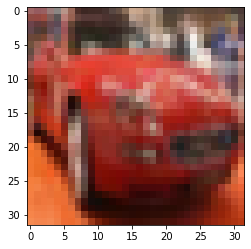

In [7]:
print(f'TRAIN BATCH SHAPE: {X_train.shape}')
plt.imshow(X_train[5])

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

## VGG16
Find any feature extractor for every image and run neural network classifier on it

In [5]:
from keras.applications.vgg16 import VGG16
from keras import Sequential
from keras.layers import Flatten, Dense
from tqdm import tqdm_notebook
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical

Using TensorFlow backend.


In [33]:
vgg_model = VGG16(pooling='avg', weights='imagenet', include_top=False, input_shape=(32,32,3))

In [34]:
# make all top layers non trainable
# we need to use this layers like the feature extractor
for layer in vgg_model.layers:
    layer.trainable = False

for layer in vgg_model.layers:
    print(layer.name, '  ', layer.trainable)

input_3    False
block1_conv1    False
block1_conv2    False
block1_pool    False
block2_conv1    False
block2_conv2    False
block2_pool    False
block3_conv1    False
block3_conv2    False
block3_conv3    False
block3_pool    False
block4_conv1    False
block4_conv2    False
block4_conv3    False
block4_pool    False
block5_conv1    False
block5_conv2    False
block5_conv3    False
block5_pool    False
global_average_pooling2d_1    False


In [37]:
model = Sequential()

model.add(vgg_model)
# model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10250     
Total params: 16,299,850
Trainable params: 1,585,162
Non-trainable params: 14,714,688
_________________________________________________________________


In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          restore_best_weights = True)

checkpoint = ModelCheckpoint(os.path.join(foldername, 'weights_{val_loss:.2f}.hdf5'),
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True)

In [56]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, 
                    callbacks=[earlystop, checkpoint], validation_data=(X_val, y_val), verbose=1)    

Train on 49000 samples, validate on 1000 samples
Epoch 1/20


11776/49000 [======>.......................] - ETA: 7:53 - loss: 0.9551 - accuracy: 0.67 - ETA: 8:11 - loss: 0.9008 - accuracy: 0.71 - ETA: 8:02 - loss: 0.8852 - accuracy: 0.71 - ETA: 7:58 - loss: 0.8834 - accuracy: 0.72 - ETA: 8:01 - loss: 0.8960 - accuracy: 0.71 - ETA: 7:59 - loss: 0.8604 - accuracy: 0.72 - ETA: 8:01 - loss: 0.8392 - accuracy: 0.72 - ETA: 7:59 - loss: 0.8412 - accuracy: 0.72 - ETA: 7:59 - loss: 0.8365 - accuracy: 0.72 - ETA: 7:56 - loss: 0.8324 - accuracy: 0.72 - ETA: 7:53 - loss: 0.8375 - accuracy: 0.72 - ETA: 7:52 - loss: 0.8396 - accuracy: 0.72 - ETA: 7:51 - loss: 0.8626 - accuracy: 0.71 - ETA: 7:49 - loss: 0.8684 - accuracy: 0.70 - ETA: 7:47 - loss: 0.8726 - accuracy: 0.70 - ETA: 7:46 - loss: 0.8632 - accuracy: 0.70 - ETA: 7:45 - loss: 0.8575 - accuracy: 0.70 - ETA: 7:45 - loss: 0.8538 - accuracy: 0.71 - ETA: 7:45 - loss: 0.8640 - accuracy: 0.70 - ETA: 7:44 - loss: 0.8661 - accuracy: 0.70 - ETA: 7:43 - loss: 0.8789 - accuracy: 0.70 - ETA: 7:43 - loss: 0.8801 - ac

35584/49000 [====================>.........] - ETA: 4:47 - loss: 0.9598 - accuracy: 0.66 - ETA: 4:47 - loss: 0.9599 - accuracy: 0.66 - ETA: 4:46 - loss: 0.9602 - accuracy: 0.66 - ETA: 4:45 - loss: 0.9603 - accuracy: 0.66 - ETA: 4:44 - loss: 0.9594 - accuracy: 0.66 - ETA: 4:44 - loss: 0.9600 - accuracy: 0.66 - ETA: 4:43 - loss: 0.9594 - accuracy: 0.66 - ETA: 4:42 - loss: 0.9601 - accuracy: 0.66 - ETA: 4:41 - loss: 0.9595 - accuracy: 0.66 - ETA: 4:41 - loss: 0.9600 - accuracy: 0.66 - ETA: 4:40 - loss: 0.9600 - accuracy: 0.66 - ETA: 4:39 - loss: 0.9605 - accuracy: 0.66 - ETA: 4:38 - loss: 0.9601 - accuracy: 0.66 - ETA: 4:38 - loss: 0.9603 - accuracy: 0.66 - ETA: 4:37 - loss: 0.9605 - accuracy: 0.66 - ETA: 4:36 - loss: 0.9609 - accuracy: 0.66 - ETA: 4:35 - loss: 0.9616 - accuracy: 0.66 - ETA: 4:34 - loss: 0.9621 - accuracy: 0.66 - ETA: 4:34 - loss: 0.9618 - accuracy: 0.66 - ETA: 4:33 - loss: 0.9618 - accuracy: 0.66 - ETA: 4:32 - loss: 0.9618 - accuracy: 0.66 - ETA: 4:31 - loss: 0.9620 - ac

47488/49000 [============================>.] - ETA: 2:32 - loss: 0.9734 - accuracy: 0.66 - ETA: 2:31 - loss: 0.9735 - accuracy: 0.66 - ETA: 2:31 - loss: 0.9733 - accuracy: 0.66 - ETA: 2:30 - loss: 0.9734 - accuracy: 0.66 - ETA: 2:29 - loss: 0.9739 - accuracy: 0.66 - ETA: 2:28 - loss: 0.9741 - accuracy: 0.66 - ETA: 2:28 - loss: 0.9743 - accuracy: 0.66 - ETA: 2:27 - loss: 0.9744 - accuracy: 0.66 - ETA: 2:26 - loss: 0.9743 - accuracy: 0.66 - ETA: 2:25 - loss: 0.9747 - accuracy: 0.66 - ETA: 2:25 - loss: 0.9745 - accuracy: 0.66 - ETA: 2:24 - loss: 0.9740 - accuracy: 0.66 - ETA: 2:23 - loss: 0.9741 - accuracy: 0.66 - ETA: 2:23 - loss: 0.9740 - accuracy: 0.66 - ETA: 2:22 - loss: 0.9739 - accuracy: 0.66 - ETA: 2:21 - loss: 0.9738 - accuracy: 0.66 - ETA: 2:21 - loss: 0.9739 - accuracy: 0.66 - ETA: 2:20 - loss: 0.9737 - accuracy: 0.66 - ETA: 2:19 - loss: 0.9737 - accuracy: 0.66 - ETA: 2:18 - loss: 0.9736 - accuracy: 0.66 - ETA: 2:18 - loss: 0.9734 - accuracy: 0.66 - ETA: 2:17 - loss: 0.9735 - ac

49000/49000 [==============================] - ETA: 16s - loss: 0.9852 - accuracy: 0.659 - ETA: 16s - loss: 0.9851 - accuracy: 0.659 - ETA: 15s - loss: 0.9850 - accuracy: 0.658 - ETA: 14s - loss: 0.9848 - accuracy: 0.659 - ETA: 13s - loss: 0.9848 - accuracy: 0.659 - ETA: 13s - loss: 0.9849 - accuracy: 0.658 - ETA: 12s - loss: 0.9850 - accuracy: 0.658 - ETA: 11s - loss: 0.9850 - accuracy: 0.658 - ETA: 10s - loss: 0.9853 - accuracy: 0.658 - ETA: 10s - loss: 0.9851 - accuracy: 0.659 - ETA: 9s - loss: 0.9855 - accuracy: 0.658 - ETA: 8s - loss: 0.9854 - accuracy: 0.65 - ETA: 7s - loss: 0.9856 - accuracy: 0.65 - ETA: 7s - loss: 0.9857 - accuracy: 0.65 - ETA: 6s - loss: 0.9854 - accuracy: 0.65 - ETA: 5s - loss: 0.9852 - accuracy: 0.65 - ETA: 4s - loss: 0.9849 - accuracy: 0.65 - ETA: 4s - loss: 0.9847 - accuracy: 0.65 - ETA: 3s - loss: 0.9848 - accuracy: 0.65 - ETA: 2s - loss: 0.9848 - accuracy: 0.65 - ETA: 1s - loss: 0.9850 - accuracy: 0.65 - ETA: 1s - loss: 0.9852 - accuracy: 0.65 - ETA: 0s 

11904/49000 [======>.......................] - ETA: 7:37 - loss: 0.6503 - accuracy: 0.70 - ETA: 8:16 - loss: 0.7275 - accuracy: 0.73 - ETA: 8:29 - loss: 0.6870 - accuracy: 0.75 - ETA: 8:38 - loss: 0.6828 - accuracy: 0.74 - ETA: 8:48 - loss: 0.7301 - accuracy: 0.73 - ETA: 9:26 - loss: 0.7240 - accuracy: 0.73 - ETA: 9:25 - loss: 0.7517 - accuracy: 0.73 - ETA: 9:27 - loss: 0.7450 - accuracy: 0.74 - ETA: 9:24 - loss: 0.7534 - accuracy: 0.73 - ETA: 9:22 - loss: 0.7735 - accuracy: 0.72 - ETA: 9:26 - loss: 0.7716 - accuracy: 0.73 - ETA: 9:26 - loss: 0.7515 - accuracy: 0.73 - ETA: 9:26 - loss: 0.7484 - accuracy: 0.73 - ETA: 9:25 - loss: 0.7570 - accuracy: 0.72 - ETA: 9:30 - loss: 0.7600 - accuracy: 0.72 - ETA: 9:30 - loss: 0.7615 - accuracy: 0.72 - ETA: 9:26 - loss: 0.7700 - accuracy: 0.72 - ETA: 9:23 - loss: 0.7814 - accuracy: 0.71 - ETA: 9:22 - loss: 0.7741 - accuracy: 0.72 - ETA: 9:20 - loss: 0.7659 - accuracy: 0.72 - ETA: 9:17 - loss: 0.7621 - accuracy: 0.72 - ETA: 9:15 - loss: 0.7660 - ac

35712/49000 [====================>.........] - ETA: 4:53 - loss: 0.8160 - accuracy: 0.71 - ETA: 4:52 - loss: 0.8164 - accuracy: 0.71 - ETA: 4:52 - loss: 0.8162 - accuracy: 0.71 - ETA: 4:51 - loss: 0.8168 - accuracy: 0.71 - ETA: 4:50 - loss: 0.8166 - accuracy: 0.71 - ETA: 4:49 - loss: 0.8168 - accuracy: 0.71 - ETA: 4:49 - loss: 0.8171 - accuracy: 0.71 - ETA: 4:48 - loss: 0.8175 - accuracy: 0.71 - ETA: 4:47 - loss: 0.8182 - accuracy: 0.71 - ETA: 4:46 - loss: 0.8180 - accuracy: 0.71 - ETA: 4:45 - loss: 0.8181 - accuracy: 0.71 - ETA: 4:45 - loss: 0.8181 - accuracy: 0.71 - ETA: 4:44 - loss: 0.8177 - accuracy: 0.71 - ETA: 4:43 - loss: 0.8183 - accuracy: 0.71 - ETA: 4:42 - loss: 0.8189 - accuracy: 0.71 - ETA: 4:41 - loss: 0.8193 - accuracy: 0.71 - ETA: 4:41 - loss: 0.8192 - accuracy: 0.71 - ETA: 4:40 - loss: 0.8191 - accuracy: 0.71 - ETA: 4:39 - loss: 0.8202 - accuracy: 0.71 - ETA: 4:38 - loss: 0.8204 - accuracy: 0.71 - ETA: 4:37 - loss: 0.8203 - accuracy: 0.71 - ETA: 4:37 - loss: 0.8201 - ac

47616/49000 [============================>.] - ETA: 2:39 - loss: 0.8428 - accuracy: 0.70 - ETA: 2:39 - loss: 0.8426 - accuracy: 0.70 - ETA: 2:38 - loss: 0.8434 - accuracy: 0.70 - ETA: 2:37 - loss: 0.8431 - accuracy: 0.70 - ETA: 2:36 - loss: 0.8429 - accuracy: 0.70 - ETA: 2:35 - loss: 0.8431 - accuracy: 0.70 - ETA: 2:35 - loss: 0.8436 - accuracy: 0.70 - ETA: 2:34 - loss: 0.8436 - accuracy: 0.70 - ETA: 2:33 - loss: 0.8434 - accuracy: 0.70 - ETA: 2:32 - loss: 0.8436 - accuracy: 0.70 - ETA: 2:32 - loss: 0.8438 - accuracy: 0.70 - ETA: 2:31 - loss: 0.8439 - accuracy: 0.70 - ETA: 2:30 - loss: 0.8438 - accuracy: 0.70 - ETA: 2:29 - loss: 0.8437 - accuracy: 0.70 - ETA: 2:28 - loss: 0.8436 - accuracy: 0.70 - ETA: 2:28 - loss: 0.8438 - accuracy: 0.70 - ETA: 2:27 - loss: 0.8436 - accuracy: 0.70 - ETA: 2:26 - loss: 0.8434 - accuracy: 0.70 - ETA: 2:25 - loss: 0.8435 - accuracy: 0.70 - ETA: 2:25 - loss: 0.8434 - accuracy: 0.70 - ETA: 2:24 - loss: 0.8437 - accuracy: 0.70 - ETA: 2:23 - loss: 0.8436 - ac

49000/49000 [==============================] - ETA: 15s - loss: 0.8568 - accuracy: 0.700 - ETA: 15s - loss: 0.8567 - accuracy: 0.700 - ETA: 14s - loss: 0.8564 - accuracy: 0.700 - ETA: 13s - loss: 0.8563 - accuracy: 0.700 - ETA: 12s - loss: 0.8564 - accuracy: 0.700 - ETA: 12s - loss: 0.8570 - accuracy: 0.700 - ETA: 11s - loss: 0.8573 - accuracy: 0.699 - ETA: 10s - loss: 0.8577 - accuracy: 0.699 - ETA: 9s - loss: 0.8580 - accuracy: 0.699 - ETA: 8s - loss: 0.8578 - accuracy: 0.69 - ETA: 8s - loss: 0.8575 - accuracy: 0.69 - ETA: 7s - loss: 0.8576 - accuracy: 0.69 - ETA: 6s - loss: 0.8576 - accuracy: 0.69 - ETA: 5s - loss: 0.8574 - accuracy: 0.69 - ETA: 5s - loss: 0.8575 - accuracy: 0.69 - ETA: 4s - loss: 0.8573 - accuracy: 0.69 - ETA: 3s - loss: 0.8575 - accuracy: 0.69 - ETA: 2s - loss: 0.8575 - accuracy: 0.69 - ETA: 2s - loss: 0.8576 - accuracy: 0.69 - ETA: 1s - loss: 0.8575 - accuracy: 0.69 - ETA: 0s - loss: 0.8575 - accuracy: 0.69 - 598s 12ms/step - loss: 0.8573 - accuracy: 0.6998 - val

11904/49000 [======>.......................] - ETA: 8:05 - loss: 0.7082 - accuracy: 0.78 - ETA: 8:24 - loss: 0.7071 - accuracy: 0.76 - ETA: 8:32 - loss: 0.6754 - accuracy: 0.77 - ETA: 8:35 - loss: 0.6908 - accuracy: 0.76 - ETA: 8:42 - loss: 0.6620 - accuracy: 0.78 - ETA: 8:40 - loss: 0.6987 - accuracy: 0.77 - ETA: 8:53 - loss: 0.6716 - accuracy: 0.78 - ETA: 8:54 - loss: 0.6502 - accuracy: 0.79 - ETA: 8:55 - loss: 0.6391 - accuracy: 0.79 - ETA: 8:54 - loss: 0.6323 - accuracy: 0.79 - ETA: 8:52 - loss: 0.6322 - accuracy: 0.79 - ETA: 8:49 - loss: 0.6397 - accuracy: 0.78 - ETA: 8:48 - loss: 0.6328 - accuracy: 0.78 - ETA: 8:46 - loss: 0.6233 - accuracy: 0.79 - ETA: 8:45 - loss: 0.6215 - accuracy: 0.79 - ETA: 8:44 - loss: 0.6199 - accuracy: 0.79 - ETA: 8:44 - loss: 0.6207 - accuracy: 0.79 - ETA: 8:43 - loss: 0.6306 - accuracy: 0.79 - ETA: 8:42 - loss: 0.6269 - accuracy: 0.79 - ETA: 8:41 - loss: 0.6359 - accuracy: 0.78 - ETA: 8:40 - loss: 0.6368 - accuracy: 0.79 - ETA: 8:39 - loss: 0.6363 - ac

35712/49000 [====================>.........] - ETA: 4:33 - loss: 0.6929 - accuracy: 0.75 - ETA: 4:32 - loss: 0.6930 - accuracy: 0.75 - ETA: 4:31 - loss: 0.6933 - accuracy: 0.75 - ETA: 4:31 - loss: 0.6931 - accuracy: 0.75 - ETA: 4:30 - loss: 0.6934 - accuracy: 0.75 - ETA: 4:29 - loss: 0.6934 - accuracy: 0.75 - ETA: 4:29 - loss: 0.6934 - accuracy: 0.75 - ETA: 4:28 - loss: 0.6931 - accuracy: 0.75 - ETA: 4:27 - loss: 0.6936 - accuracy: 0.75 - ETA: 4:27 - loss: 0.6937 - accuracy: 0.75 - ETA: 4:26 - loss: 0.6941 - accuracy: 0.75 - ETA: 4:25 - loss: 0.6945 - accuracy: 0.75 - ETA: 4:24 - loss: 0.6949 - accuracy: 0.75 - ETA: 4:24 - loss: 0.6947 - accuracy: 0.75 - ETA: 4:23 - loss: 0.6949 - accuracy: 0.75 - ETA: 4:22 - loss: 0.6951 - accuracy: 0.75 - ETA: 4:22 - loss: 0.6958 - accuracy: 0.75 - ETA: 4:21 - loss: 0.6956 - accuracy: 0.75 - ETA: 4:20 - loss: 0.6957 - accuracy: 0.75 - ETA: 4:20 - loss: 0.6957 - accuracy: 0.75 - ETA: 4:19 - loss: 0.6957 - accuracy: 0.75 - ETA: 4:18 - loss: 0.6959 - ac

47616/49000 [============================>.] - ETA: 2:30 - loss: 0.7200 - accuracy: 0.74 - ETA: 2:29 - loss: 0.7203 - accuracy: 0.74 - ETA: 2:29 - loss: 0.7202 - accuracy: 0.74 - ETA: 2:28 - loss: 0.7201 - accuracy: 0.74 - ETA: 2:27 - loss: 0.7202 - accuracy: 0.74 - ETA: 2:27 - loss: 0.7208 - accuracy: 0.74 - ETA: 2:26 - loss: 0.7211 - accuracy: 0.74 - ETA: 2:25 - loss: 0.7214 - accuracy: 0.74 - ETA: 2:24 - loss: 0.7218 - accuracy: 0.74 - ETA: 2:24 - loss: 0.7216 - accuracy: 0.74 - ETA: 2:23 - loss: 0.7215 - accuracy: 0.74 - ETA: 2:22 - loss: 0.7215 - accuracy: 0.74 - ETA: 2:21 - loss: 0.7218 - accuracy: 0.74 - ETA: 2:21 - loss: 0.7217 - accuracy: 0.74 - ETA: 2:20 - loss: 0.7217 - accuracy: 0.74 - ETA: 2:19 - loss: 0.7214 - accuracy: 0.74 - ETA: 2:19 - loss: 0.7212 - accuracy: 0.74 - ETA: 2:18 - loss: 0.7214 - accuracy: 0.74 - ETA: 2:17 - loss: 0.7216 - accuracy: 0.74 - ETA: 2:17 - loss: 0.7216 - accuracy: 0.74 - ETA: 2:16 - loss: 0.7223 - accuracy: 0.74 - ETA: 2:15 - loss: 0.7225 - ac

49000/49000 [==============================] - ETA: 15s - loss: 0.7440 - accuracy: 0.737 - ETA: 14s - loss: 0.7442 - accuracy: 0.737 - ETA: 13s - loss: 0.7445 - accuracy: 0.737 - ETA: 13s - loss: 0.7441 - accuracy: 0.737 - ETA: 12s - loss: 0.7441 - accuracy: 0.737 - ETA: 11s - loss: 0.7440 - accuracy: 0.737 - ETA: 10s - loss: 0.7441 - accuracy: 0.737 - ETA: 10s - loss: 0.7442 - accuracy: 0.737 - ETA: 9s - loss: 0.7444 - accuracy: 0.737 - ETA: 8s - loss: 0.7448 - accuracy: 0.73 - ETA: 7s - loss: 0.7448 - accuracy: 0.73 - ETA: 7s - loss: 0.7448 - accuracy: 0.73 - ETA: 6s - loss: 0.7450 - accuracy: 0.73 - ETA: 5s - loss: 0.7451 - accuracy: 0.73 - ETA: 4s - loss: 0.7453 - accuracy: 0.73 - ETA: 4s - loss: 0.7455 - accuracy: 0.73 - ETA: 3s - loss: 0.7458 - accuracy: 0.73 - ETA: 2s - loss: 0.7457 - accuracy: 0.73 - ETA: 1s - loss: 0.7459 - accuracy: 0.73 - ETA: 1s - loss: 0.7459 - accuracy: 0.73 - ETA: 0s - loss: 0.7458 - accuracy: 0.73 - 586s 12ms/step - loss: 0.7459 - accuracy: 0.7366 - val

11840/49000 [======>.......................] - ETA: 8:31 - loss: 0.7067 - accuracy: 0.75 - ETA: 8:53 - loss: 0.6135 - accuracy: 0.78 - ETA: 9:13 - loss: 0.5698 - accuracy: 0.80 - ETA: 9:19 - loss: 0.6221 - accuracy: 0.78 - ETA: 9:31 - loss: 0.6427 - accuracy: 0.77 - ETA: 9:29 - loss: 0.6392 - accuracy: 0.77 - ETA: 9:25 - loss: 0.6916 - accuracy: 0.77 - ETA: 9:25 - loss: 0.6506 - accuracy: 0.78 - ETA: 9:27 - loss: 0.6398 - accuracy: 0.78 - ETA: 9:25 - loss: 0.6116 - accuracy: 0.80 - ETA: 9:41 - loss: 0.5992 - accuracy: 0.79 - ETA: 9:48 - loss: 0.5940 - accuracy: 0.79 - ETA: 9:44 - loss: 0.5968 - accuracy: 0.79 - ETA: 9:39 - loss: 0.5962 - accuracy: 0.79 - ETA: 9:35 - loss: 0.6001 - accuracy: 0.79 - ETA: 9:32 - loss: 0.5975 - accuracy: 0.79 - ETA: 9:27 - loss: 0.6013 - accuracy: 0.79 - ETA: 9:24 - loss: 0.6003 - accuracy: 0.79 - ETA: 9:22 - loss: 0.5942 - accuracy: 0.79 - ETA: 9:23 - loss: 0.5944 - accuracy: 0.79 - ETA: 9:20 - loss: 0.5826 - accuracy: 0.79 - ETA: 9:18 - loss: 0.5836 - ac

35648/49000 [====================>.........] - ETA: 6:13 - loss: 0.6024 - accuracy: 0.78 - ETA: 6:12 - loss: 0.6026 - accuracy: 0.78 - ETA: 6:11 - loss: 0.6033 - accuracy: 0.78 - ETA: 6:10 - loss: 0.6038 - accuracy: 0.78 - ETA: 6:09 - loss: 0.6038 - accuracy: 0.78 - ETA: 6:08 - loss: 0.6039 - accuracy: 0.78 - ETA: 6:07 - loss: 0.6040 - accuracy: 0.78 - ETA: 6:05 - loss: 0.6039 - accuracy: 0.78 - ETA: 6:04 - loss: 0.6039 - accuracy: 0.78 - ETA: 6:03 - loss: 0.6038 - accuracy: 0.78 - ETA: 6:02 - loss: 0.6040 - accuracy: 0.78 - ETA: 6:01 - loss: 0.6043 - accuracy: 0.78 - ETA: 6:00 - loss: 0.6045 - accuracy: 0.78 - ETA: 5:59 - loss: 0.6046 - accuracy: 0.78 - ETA: 5:58 - loss: 0.6043 - accuracy: 0.78 - ETA: 5:58 - loss: 0.6047 - accuracy: 0.78 - ETA: 5:57 - loss: 0.6049 - accuracy: 0.78 - ETA: 5:56 - loss: 0.6051 - accuracy: 0.78 - ETA: 5:54 - loss: 0.6052 - accuracy: 0.78 - ETA: 5:53 - loss: 0.6058 - accuracy: 0.78 - ETA: 5:52 - loss: 0.6063 - accuracy: 0.78 - ETA: 5:51 - loss: 0.6059 - ac

47552/49000 [============================>.] - ETA: 3:15 - loss: 0.6262 - accuracy: 0.78 - ETA: 3:14 - loss: 0.6264 - accuracy: 0.78 - ETA: 3:13 - loss: 0.6262 - accuracy: 0.78 - ETA: 3:12 - loss: 0.6260 - accuracy: 0.78 - ETA: 3:11 - loss: 0.6259 - accuracy: 0.78 - ETA: 3:10 - loss: 0.6264 - accuracy: 0.78 - ETA: 3:09 - loss: 0.6268 - accuracy: 0.78 - ETA: 3:08 - loss: 0.6273 - accuracy: 0.78 - ETA: 3:07 - loss: 0.6270 - accuracy: 0.78 - ETA: 3:06 - loss: 0.6270 - accuracy: 0.78 - ETA: 3:05 - loss: 0.6269 - accuracy: 0.78 - ETA: 3:04 - loss: 0.6269 - accuracy: 0.78 - ETA: 3:03 - loss: 0.6270 - accuracy: 0.78 - ETA: 3:02 - loss: 0.6272 - accuracy: 0.78 - ETA: 3:02 - loss: 0.6276 - accuracy: 0.78 - ETA: 3:01 - loss: 0.6278 - accuracy: 0.77 - ETA: 3:00 - loss: 0.6281 - accuracy: 0.77 - ETA: 2:59 - loss: 0.6282 - accuracy: 0.77 - ETA: 2:58 - loss: 0.6287 - accuracy: 0.77 - ETA: 2:57 - loss: 0.6284 - accuracy: 0.77 - ETA: 2:56 - loss: 0.6286 - accuracy: 0.77 - ETA: 2:55 - loss: 0.6285 - ac

49000/49000 [==============================] - ETA: 20s - loss: 0.6475 - accuracy: 0.772 - ETA: 19s - loss: 0.6478 - accuracy: 0.772 - ETA: 18s - loss: 0.6481 - accuracy: 0.772 - ETA: 17s - loss: 0.6482 - accuracy: 0.772 - ETA: 16s - loss: 0.6484 - accuracy: 0.772 - ETA: 15s - loss: 0.6482 - accuracy: 0.772 - ETA: 14s - loss: 0.6488 - accuracy: 0.772 - ETA: 13s - loss: 0.6485 - accuracy: 0.772 - ETA: 12s - loss: 0.6483 - accuracy: 0.772 - ETA: 11s - loss: 0.6484 - accuracy: 0.772 - ETA: 11s - loss: 0.6483 - accuracy: 0.772 - ETA: 10s - loss: 0.6479 - accuracy: 0.772 - ETA: 9s - loss: 0.6479 - accuracy: 0.772 - ETA: 8s - loss: 0.6479 - accuracy: 0.77 - ETA: 7s - loss: 0.6479 - accuracy: 0.77 - ETA: 6s - loss: 0.6476 - accuracy: 0.77 - ETA: 5s - loss: 0.6476 - accuracy: 0.77 - ETA: 4s - loss: 0.6475 - accuracy: 0.77 - ETA: 3s - loss: 0.6478 - accuracy: 0.77 - ETA: 2s - loss: 0.6476 - accuracy: 0.77 - ETA: 1s - loss: 0.6478 - accuracy: 0.77 - ETA: 0s - loss: 0.6478 - accuracy: 0.77 - 738s

## Evaluate VGG16

In [57]:
history.history

{'val_loss': [1.1751004962921143,
  1.2222727823257447,
  1.2476747064590454,
  1.4484930477142335],
 'val_accuracy': [0.5950000286102295,
  0.6100000143051147,
  0.5849999785423279,
  0.6010000109672546],
 'loss': [0.9852749762827037,
  0.8573109693527222,
  0.7458984803764187,
  0.6477361950193132],
 'accuracy': [0.6590408, 0.6997959, 0.7365918, 0.7727347]}

In [58]:
loss, acc = model.evaluate(X_test, y_test, verbose = 1)

1000/1000 [==============================] - ETA: 16 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 15 - ETA: 14 - ETA: 13 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 15s 15ms/step


In [59]:
print(f'Test loss: {loss}')
print(f'Test accuracy: {acc*100}')

Test loss: 1.1766686038970948
Test accuracy: 62.199997901916504


In [60]:
model.predict_classes(X_test[:5])

array([3, 8, 8, 0, 6], dtype=int64)

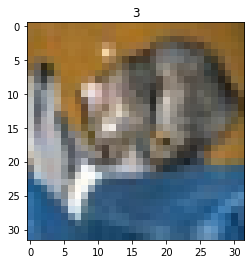

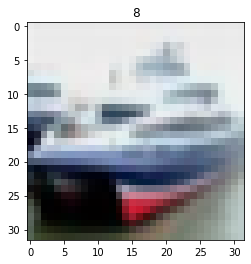

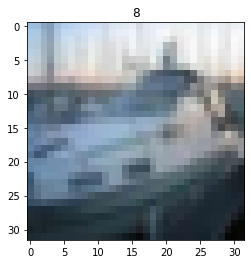

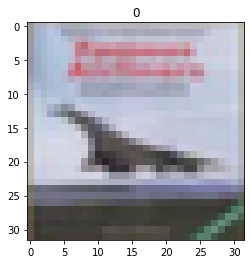

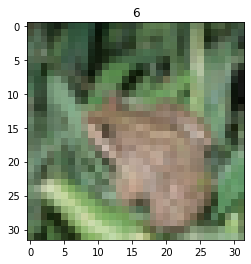

In [61]:
for i in range(5):
    img = X_test[i]
    img_class = np.where(y_test[i] == 1)[0][0]
    plt.imshow(img)
    plt.title(img_class)
    plt.show()

## ResNet 101

In [28]:
from keras.applications.resnet import ResNet101
from keras import Sequential
from keras.layers import Flatten, Dense
from tqdm import tqdm_notebook
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam

In [11]:
resnet_model = ResNet101(include_top=False, input_shape=(32,32,3), weights='imagenet', )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



 84434944/171446536 [=============>................] - ETA: 47:3 - ETA: 18:5 - ETA: 10:4 - ETA: 6:5 - ETA: 5: - ETA: 4: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: 

171450368/171446536 [==============================] - ETA: 56 - ETA: 56 - ETA: 56 - ETA: 56 - ETA: 56 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 55 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 54 - ETA: 

In [16]:
for layer in resnet_model.layers:
    layer.trainable = False
    
for layer in resnet_model.layers:
    print(f'{layer.name}: {layer.trainable}')

input_1: False
conv1_pad: False
conv1_conv: False
conv1_bn: False
conv1_relu: False
pool1_pad: False
pool1_pool: False
conv2_block1_1_conv: False
conv2_block1_1_bn: False
conv2_block1_1_relu: False
conv2_block1_2_conv: False
conv2_block1_2_bn: False
conv2_block1_2_relu: False
conv2_block1_0_conv: False
conv2_block1_3_conv: False
conv2_block1_0_bn: False
conv2_block1_3_bn: False
conv2_block1_add: False
conv2_block1_out: False
conv2_block2_1_conv: False
conv2_block2_1_bn: False
conv2_block2_1_relu: False
conv2_block2_2_conv: False
conv2_block2_2_bn: False
conv2_block2_2_relu: False
conv2_block2_3_conv: False
conv2_block2_3_bn: False
conv2_block2_add: False
conv2_block2_out: False
conv2_block3_1_conv: False
conv2_block3_1_bn: False
conv2_block3_1_relu: False
conv2_block3_2_conv: False
conv2_block3_2_bn: False
conv2_block3_2_relu: False
conv2_block3_3_conv: False
conv2_block3_3_bn: False
conv2_block3_add: False
conv2_block3_out: False
conv3_block1_1_conv: False
conv3_block1_1_bn: False
con

conv5_block1_1_bn: False
conv5_block1_1_relu: False
conv5_block1_2_conv: False
conv5_block1_2_bn: False
conv5_block1_2_relu: False
conv5_block1_0_conv: False
conv5_block1_3_conv: False
conv5_block1_0_bn: False
conv5_block1_3_bn: False
conv5_block1_add: False
conv5_block1_out: False
conv5_block2_1_conv: False
conv5_block2_1_bn: False
conv5_block2_1_relu: False
conv5_block2_2_conv: False
conv5_block2_2_bn: False
conv5_block2_2_relu: False
conv5_block2_3_conv: False
conv5_block2_3_bn: False
conv5_block2_add: False
conv5_block2_out: False
conv5_block3_1_conv: False
conv5_block3_1_bn: False
conv5_block3_1_relu: False
conv5_block3_2_conv: False
conv5_block3_2_bn: False
conv5_block3_2_relu: False
conv5_block3_3_conv: False
conv5_block3_3_bn: False
conv5_block3_add: False
conv5_block3_out: False


In [57]:
lr = 0.04
epochs = 25
decay = lr / epochs
momentum = 0.8

batch_size = 32

In [58]:
model = Sequential()

model.add(resnet_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Model)            (None, 1, 1, 2048)        42658176  
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_13 (Dense)             (None, 10)                10250     
Total params: 45,816,202
Trainable params: 3,158,026
Non-trainable params: 42,658,176
_________________________________________________________________


In [59]:
opt = SGD(learning_rate=lr, momentum=momentum)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
checkpoint = ModelCheckpoint(os.path.join(foldername, 'ResNet_101_weights_{val_loss:.2f}.hdf5'),
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True)

In [62]:
def scheduler(epoch):
    global lr, decay
    if epoch > 0:
        lr = lr * 1/(1 + decay * epoch)
        decay = float(lr / epoch)
    #         model.optimizer.learning_rate = float(lr)
    return lr

change_lr = LearningRateScheduler(scheduler)

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
       callbacks=[change_lr, checkpoint], validation_freq=1, validation_data=(X_val, y_val))

Train on 49000 samples, validate on 1000 samples
Epoch 1/25


 5600/49000 [==>...........................] - ETA: 11:59:05 - loss: 3.0338 - accuracy: 0.09 - ETA: 6:14:34 - loss: 3.1265 - accuracy: 0.1094 - ETA: 4:15:31 - loss: 3.3794 - accuracy: 0.114 - ETA: 3:19:02 - loss: 4.1014 - accuracy: 0.101 - ETA: 2:43:54 - loss: 4.4371 - accuracy: 0.100 - ETA: 2:20:49 - loss: 4.3764 - accuracy: 0.088 - ETA: 2:03:32 - loss: 4.4878 - accuracy: 0.093 - ETA: 1:51:12 - loss: 4.4141 - accuracy: 0.097 - ETA: 1:41:52 - loss: 4.2182 - accuracy: 0.100 - ETA: 1:33:38 - loss: 4.0796 - accuracy: 0.100 - ETA: 1:26:55 - loss: 3.9110 - accuracy: 0.116 - ETA: 1:21:29 - loss: 3.7771 - accuracy: 0.119 - ETA: 1:17:05 - loss: 3.6540 - accuracy: 0.127 - ETA: 1:13:46 - loss: 3.5536 - accuracy: 0.129 - ETA: 1:10:13 - loss: 3.4638 - accuracy: 0.137 - ETA: 1:07:10 - loss: 3.3841 - accuracy: 0.146 - ETA: 1:05:11 - loss: 3.3139 - accuracy: 0.156 - ETA: 1:03:29 - loss: 3.2536 - accuracy: 0.161 - ETA: 1:01:55 - loss: 3.1939 - accuracy: 0.161 - ETA: 1:00:43 - loss: 3.1458 - accuracy: 

11296/49000 [=====>........................] - ETA: 26:23 - loss: 2.0108 - accuracy: 0.318 - ETA: 26:18 - loss: 2.0109 - accuracy: 0.318 - ETA: 26:12 - loss: 2.0086 - accuracy: 0.319 - ETA: 26:09 - loss: 2.0063 - accuracy: 0.319 - ETA: 26:06 - loss: 2.0039 - accuracy: 0.320 - ETA: 26:02 - loss: 2.0032 - accuracy: 0.320 - ETA: 25:58 - loss: 2.0028 - accuracy: 0.320 - ETA: 25:53 - loss: 2.0013 - accuracy: 0.320 - ETA: 25:49 - loss: 1.9989 - accuracy: 0.321 - ETA: 25:46 - loss: 1.9987 - accuracy: 0.322 - ETA: 25:42 - loss: 1.9985 - accuracy: 0.322 - ETA: 25:40 - loss: 1.9969 - accuracy: 0.322 - ETA: 25:36 - loss: 1.9949 - accuracy: 0.322 - ETA: 25:32 - loss: 1.9939 - accuracy: 0.323 - ETA: 25:26 - loss: 1.9949 - accuracy: 0.322 - ETA: 25:22 - loss: 1.9936 - accuracy: 0.323 - ETA: 25:18 - loss: 1.9928 - accuracy: 0.323 - ETA: 25:15 - loss: 1.9913 - accuracy: 0.323 - ETA: 25:11 - loss: 1.9889 - accuracy: 0.323 - ETA: 25:06 - loss: 1.9871 - accuracy: 0.323 - ETA: 25:02 - loss: 1.9849 - accur

16992/49000 [=========>....................] - ETA: 18:38 - loss: 1.8818 - accuracy: 0.348 - ETA: 18:37 - loss: 1.8813 - accuracy: 0.348 - ETA: 18:35 - loss: 1.8809 - accuracy: 0.348 - ETA: 18:33 - loss: 1.8801 - accuracy: 0.348 - ETA: 18:30 - loss: 1.8792 - accuracy: 0.348 - ETA: 18:29 - loss: 1.8784 - accuracy: 0.349 - ETA: 18:27 - loss: 1.8790 - accuracy: 0.348 - ETA: 18:25 - loss: 1.8789 - accuracy: 0.349 - ETA: 18:23 - loss: 1.8790 - accuracy: 0.349 - ETA: 18:22 - loss: 1.8792 - accuracy: 0.349 - ETA: 18:21 - loss: 1.8785 - accuracy: 0.349 - ETA: 18:19 - loss: 1.8785 - accuracy: 0.349 - ETA: 18:18 - loss: 1.8777 - accuracy: 0.349 - ETA: 18:15 - loss: 1.8771 - accuracy: 0.349 - ETA: 18:13 - loss: 1.8765 - accuracy: 0.349 - ETA: 18:11 - loss: 1.8762 - accuracy: 0.350 - ETA: 18:08 - loss: 1.8764 - accuracy: 0.349 - ETA: 18:06 - loss: 1.8762 - accuracy: 0.349 - ETA: 18:04 - loss: 1.8756 - accuracy: 0.349 - ETA: 18:02 - loss: 1.8766 - accuracy: 0.349 - ETA: 18:00 - loss: 1.8760 - accur

22688/49000 [============>.................] - ETA: 14:35 - loss: 1.8273 - accuracy: 0.363 - ETA: 14:34 - loss: 1.8273 - accuracy: 0.363 - ETA: 14:33 - loss: 1.8266 - accuracy: 0.363 - ETA: 14:31 - loss: 1.8264 - accuracy: 0.363 - ETA: 14:30 - loss: 1.8269 - accuracy: 0.363 - ETA: 14:29 - loss: 1.8269 - accuracy: 0.363 - ETA: 14:28 - loss: 1.8266 - accuracy: 0.363 - ETA: 14:26 - loss: 1.8268 - accuracy: 0.363 - ETA: 14:25 - loss: 1.8264 - accuracy: 0.363 - ETA: 14:23 - loss: 1.8254 - accuracy: 0.364 - ETA: 14:22 - loss: 1.8252 - accuracy: 0.363 - ETA: 14:21 - loss: 1.8249 - accuracy: 0.364 - ETA: 14:20 - loss: 1.8243 - accuracy: 0.364 - ETA: 14:18 - loss: 1.8242 - accuracy: 0.364 - ETA: 14:17 - loss: 1.8235 - accuracy: 0.364 - ETA: 14:15 - loss: 1.8237 - accuracy: 0.364 - ETA: 14:14 - loss: 1.8235 - accuracy: 0.364 - ETA: 14:13 - loss: 1.8230 - accuracy: 0.365 - ETA: 14:11 - loss: 1.8232 - accuracy: 0.365 - ETA: 14:10 - loss: 1.8227 - accuracy: 0.365 - ETA: 14:09 - loss: 1.8222 - accur

28480/49000 [================>.............] - ETA: 11:28 - loss: 1.7912 - accuracy: 0.375 - ETA: 11:27 - loss: 1.7917 - accuracy: 0.375 - ETA: 11:26 - loss: 1.7916 - accuracy: 0.375 - ETA: 11:25 - loss: 1.7916 - accuracy: 0.375 - ETA: 11:24 - loss: 1.7909 - accuracy: 0.375 - ETA: 11:23 - loss: 1.7905 - accuracy: 0.375 - ETA: 11:22 - loss: 1.7903 - accuracy: 0.376 - ETA: 11:21 - loss: 1.7900 - accuracy: 0.376 - ETA: 11:20 - loss: 1.7899 - accuracy: 0.376 - ETA: 11:19 - loss: 1.7892 - accuracy: 0.376 - ETA: 11:17 - loss: 1.7890 - accuracy: 0.376 - ETA: 11:16 - loss: 1.7889 - accuracy: 0.376 - ETA: 11:16 - loss: 1.7882 - accuracy: 0.376 - ETA: 11:15 - loss: 1.7886 - accuracy: 0.376 - ETA: 11:13 - loss: 1.7884 - accuracy: 0.376 - ETA: 11:12 - loss: 1.7877 - accuracy: 0.376 - ETA: 11:11 - loss: 1.7874 - accuracy: 0.377 - ETA: 11:10 - loss: 1.7868 - accuracy: 0.377 - ETA: 11:09 - loss: 1.7868 - accuracy: 0.377 - ETA: 11:08 - loss: 1.7867 - accuracy: 0.377 - ETA: 11:08 - loss: 1.7868 - accur

34432/49000 [====================>.........] - ETA: 8:39 - loss: 1.7668 - accuracy: 0.38 - ETA: 8:38 - loss: 1.7665 - accuracy: 0.38 - ETA: 8:37 - loss: 1.7663 - accuracy: 0.38 - ETA: 8:36 - loss: 1.7659 - accuracy: 0.38 - ETA: 8:35 - loss: 1.7654 - accuracy: 0.38 - ETA: 8:34 - loss: 1.7651 - accuracy: 0.38 - ETA: 8:33 - loss: 1.7648 - accuracy: 0.38 - ETA: 8:33 - loss: 1.7647 - accuracy: 0.38 - ETA: 8:32 - loss: 1.7647 - accuracy: 0.38 - ETA: 8:30 - loss: 1.7642 - accuracy: 0.38 - ETA: 8:29 - loss: 1.7639 - accuracy: 0.38 - ETA: 8:28 - loss: 1.7637 - accuracy: 0.38 - ETA: 8:27 - loss: 1.7639 - accuracy: 0.38 - ETA: 8:26 - loss: 1.7643 - accuracy: 0.38 - ETA: 8:25 - loss: 1.7641 - accuracy: 0.38 - ETA: 8:24 - loss: 1.7640 - accuracy: 0.38 - ETA: 8:23 - loss: 1.7640 - accuracy: 0.38 - ETA: 8:22 - loss: 1.7638 - accuracy: 0.38 - ETA: 8:21 - loss: 1.7638 - accuracy: 0.38 - ETA: 8:20 - loss: 1.7638 - accuracy: 0.38 - ETA: 8:20 - loss: 1.7635 - accuracy: 0.38 - ETA: 8:19 - loss: 1.7634 - ac

40384/49000 [=======================>......] - ETA: 6:04 - loss: 1.7457 - accuracy: 0.39 - ETA: 6:03 - loss: 1.7455 - accuracy: 0.39 - ETA: 6:03 - loss: 1.7454 - accuracy: 0.39 - ETA: 6:02 - loss: 1.7453 - accuracy: 0.39 - ETA: 6:01 - loss: 1.7453 - accuracy: 0.39 - ETA: 6:00 - loss: 1.7453 - accuracy: 0.39 - ETA: 5:59 - loss: 1.7453 - accuracy: 0.39 - ETA: 5:58 - loss: 1.7449 - accuracy: 0.39 - ETA: 5:58 - loss: 1.7448 - accuracy: 0.39 - ETA: 5:57 - loss: 1.7445 - accuracy: 0.39 - ETA: 5:56 - loss: 1.7442 - accuracy: 0.39 - ETA: 5:55 - loss: 1.7442 - accuracy: 0.39 - ETA: 5:54 - loss: 1.7439 - accuracy: 0.39 - ETA: 5:53 - loss: 1.7439 - accuracy: 0.39 - ETA: 5:52 - loss: 1.7439 - accuracy: 0.39 - ETA: 5:52 - loss: 1.7438 - accuracy: 0.39 - ETA: 5:51 - loss: 1.7436 - accuracy: 0.39 - ETA: 5:50 - loss: 1.7434 - accuracy: 0.39 - ETA: 5:49 - loss: 1.7432 - accuracy: 0.39 - ETA: 5:48 - loss: 1.7429 - accuracy: 0.39 - ETA: 5:47 - loss: 1.7424 - accuracy: 0.39 - ETA: 5:46 - loss: 1.7424 - ac

46336/49000 [===========================>..] - ETA: 3:32 - loss: 1.7286 - accuracy: 0.39 - ETA: 3:31 - loss: 1.7282 - accuracy: 0.39 - ETA: 3:30 - loss: 1.7281 - accuracy: 0.39 - ETA: 3:29 - loss: 1.7281 - accuracy: 0.39 - ETA: 3:29 - loss: 1.7279 - accuracy: 0.39 - ETA: 3:28 - loss: 1.7276 - accuracy: 0.39 - ETA: 3:27 - loss: 1.7273 - accuracy: 0.39 - ETA: 3:27 - loss: 1.7271 - accuracy: 0.39 - ETA: 3:26 - loss: 1.7271 - accuracy: 0.39 - ETA: 3:25 - loss: 1.7271 - accuracy: 0.39 - ETA: 3:24 - loss: 1.7270 - accuracy: 0.39 - ETA: 3:24 - loss: 1.7270 - accuracy: 0.39 - ETA: 3:23 - loss: 1.7271 - accuracy: 0.39 - ETA: 3:22 - loss: 1.7271 - accuracy: 0.39 - ETA: 3:21 - loss: 1.7268 - accuracy: 0.39 - ETA: 3:21 - loss: 1.7268 - accuracy: 0.39 - ETA: 3:20 - loss: 1.7267 - accuracy: 0.39 - ETA: 3:19 - loss: 1.7266 - accuracy: 0.39 - ETA: 3:18 - loss: 1.7264 - accuracy: 0.39 - ETA: 3:17 - loss: 1.7261 - accuracy: 0.39 - ETA: 3:17 - loss: 1.7261 - accuracy: 0.39 - ETA: 3:16 - loss: 1.7260 - ac

49000/49000 [==============================] - ETA: 1:04 - loss: 1.7164 - accuracy: 0.39 - ETA: 1:03 - loss: 1.7163 - accuracy: 0.39 - ETA: 1:03 - loss: 1.7162 - accuracy: 0.39 - ETA: 1:02 - loss: 1.7166 - accuracy: 0.39 - ETA: 1:01 - loss: 1.7165 - accuracy: 0.39 - ETA: 1:00 - loss: 1.7164 - accuracy: 0.39 - ETA: 1:00 - loss: 1.7166 - accuracy: 0.39 - ETA: 59s - loss: 1.7165 - accuracy: 0.3995 - ETA: 58s - loss: 1.7166 - accuracy: 0.399 - ETA: 57s - loss: 1.7167 - accuracy: 0.399 - ETA: 57s - loss: 1.7166 - accuracy: 0.399 - ETA: 56s - loss: 1.7165 - accuracy: 0.399 - ETA: 55s - loss: 1.7163 - accuracy: 0.399 - ETA: 54s - loss: 1.7161 - accuracy: 0.399 - ETA: 53s - loss: 1.7163 - accuracy: 0.399 - ETA: 53s - loss: 1.7165 - accuracy: 0.399 - ETA: 52s - loss: 1.7163 - accuracy: 0.399 - ETA: 51s - loss: 1.7162 - accuracy: 0.399 - ETA: 50s - loss: 1.7162 - accuracy: 0.399 - ETA: 49s - loss: 1.7161 - accuracy: 0.399 - ETA: 49s - loss: 1.7160 - accuracy: 0.399 - ETA: 48s - loss: 1.7159 - ac

 5696/49000 [==>...........................] - ETA: 18:37 - loss: 1.3780 - accuracy: 0.468 - ETA: 28:23 - loss: 1.4515 - accuracy: 0.531 - ETA: 24:27 - loss: 1.4652 - accuracy: 0.531 - ETA: 24:54 - loss: 1.4628 - accuracy: 0.523 - ETA: 23:47 - loss: 1.5624 - accuracy: 0.487 - ETA: 24:42 - loss: 1.6054 - accuracy: 0.463 - ETA: 24:31 - loss: 1.6220 - accuracy: 0.450 - ETA: 24:25 - loss: 1.6014 - accuracy: 0.453 - ETA: 26:01 - loss: 1.5880 - accuracy: 0.447 - ETA: 26:20 - loss: 1.5779 - accuracy: 0.437 - ETA: 26:15 - loss: 1.5671 - accuracy: 0.448 - ETA: 26:17 - loss: 1.5831 - accuracy: 0.442 - ETA: 26:50 - loss: 1.5889 - accuracy: 0.444 - ETA: 26:52 - loss: 1.6144 - accuracy: 0.435 - ETA: 26:49 - loss: 1.6063 - accuracy: 0.447 - ETA: 26:18 - loss: 1.5867 - accuracy: 0.457 - ETA: 26:30 - loss: 1.5907 - accuracy: 0.455 - ETA: 26:13 - loss: 1.5860 - accuracy: 0.460 - ETA: 25:46 - loss: 1.5888 - accuracy: 0.458 - ETA: 25:57 - loss: 1.5838 - accuracy: 0.453 - ETA: 25:43 - loss: 1.5852 - accur

11392/49000 [=====>........................] - ETA: 17:07 - loss: 1.5352 - accuracy: 0.461 - ETA: 17:11 - loss: 1.5350 - accuracy: 0.461 - ETA: 17:12 - loss: 1.5367 - accuracy: 0.461 - ETA: 17:17 - loss: 1.5368 - accuracy: 0.460 - ETA: 17:14 - loss: 1.5389 - accuracy: 0.460 - ETA: 17:13 - loss: 1.5388 - accuracy: 0.460 - ETA: 17:10 - loss: 1.5406 - accuracy: 0.460 - ETA: 17:11 - loss: 1.5376 - accuracy: 0.461 - ETA: 17:12 - loss: 1.5370 - accuracy: 0.462 - ETA: 17:13 - loss: 1.5358 - accuracy: 0.462 - ETA: 17:16 - loss: 1.5351 - accuracy: 0.462 - ETA: 17:15 - loss: 1.5342 - accuracy: 0.462 - ETA: 17:13 - loss: 1.5359 - accuracy: 0.462 - ETA: 17:15 - loss: 1.5356 - accuracy: 0.461 - ETA: 17:15 - loss: 1.5363 - accuracy: 0.461 - ETA: 17:17 - loss: 1.5371 - accuracy: 0.461 - ETA: 17:19 - loss: 1.5366 - accuracy: 0.461 - ETA: 17:18 - loss: 1.5358 - accuracy: 0.461 - ETA: 17:17 - loss: 1.5359 - accuracy: 0.461 - ETA: 17:20 - loss: 1.5380 - accuracy: 0.461 - ETA: 17:19 - loss: 1.5375 - accur

17088/49000 [=========>....................] - ETA: 15:02 - loss: 1.5474 - accuracy: 0.456 - ETA: 15:01 - loss: 1.5473 - accuracy: 0.456 - ETA: 15:00 - loss: 1.5476 - accuracy: 0.456 - ETA: 14:59 - loss: 1.5473 - accuracy: 0.456 - ETA: 14:58 - loss: 1.5462 - accuracy: 0.456 - ETA: 14:57 - loss: 1.5466 - accuracy: 0.456 - ETA: 14:55 - loss: 1.5466 - accuracy: 0.456 - ETA: 14:54 - loss: 1.5465 - accuracy: 0.456 - ETA: 14:53 - loss: 1.5466 - accuracy: 0.456 - ETA: 14:51 - loss: 1.5483 - accuracy: 0.455 - ETA: 14:50 - loss: 1.5483 - accuracy: 0.455 - ETA: 14:49 - loss: 1.5487 - accuracy: 0.455 - ETA: 14:48 - loss: 1.5479 - accuracy: 0.456 - ETA: 14:48 - loss: 1.5475 - accuracy: 0.456 - ETA: 14:47 - loss: 1.5476 - accuracy: 0.456 - ETA: 14:46 - loss: 1.5479 - accuracy: 0.456 - ETA: 14:45 - loss: 1.5483 - accuracy: 0.456 - ETA: 14:43 - loss: 1.5486 - accuracy: 0.456 - ETA: 14:42 - loss: 1.5486 - accuracy: 0.456 - ETA: 14:41 - loss: 1.5485 - accuracy: 0.456 - ETA: 14:40 - loss: 1.5491 - accur

22784/49000 [============>.................] - ETA: 12:35 - loss: 1.5601 - accuracy: 0.454 - ETA: 12:34 - loss: 1.5599 - accuracy: 0.454 - ETA: 12:33 - loss: 1.5598 - accuracy: 0.454 - ETA: 12:32 - loss: 1.5597 - accuracy: 0.454 - ETA: 12:31 - loss: 1.5598 - accuracy: 0.454 - ETA: 12:30 - loss: 1.5591 - accuracy: 0.454 - ETA: 12:29 - loss: 1.5590 - accuracy: 0.454 - ETA: 12:28 - loss: 1.5589 - accuracy: 0.454 - ETA: 12:27 - loss: 1.5594 - accuracy: 0.454 - ETA: 12:26 - loss: 1.5591 - accuracy: 0.455 - ETA: 12:25 - loss: 1.5592 - accuracy: 0.454 - ETA: 12:24 - loss: 1.5594 - accuracy: 0.454 - ETA: 12:23 - loss: 1.5595 - accuracy: 0.454 - ETA: 12:22 - loss: 1.5598 - accuracy: 0.454 - ETA: 12:22 - loss: 1.5600 - accuracy: 0.454 - ETA: 12:21 - loss: 1.5610 - accuracy: 0.454 - ETA: 12:20 - loss: 1.5611 - accuracy: 0.454 - ETA: 12:19 - loss: 1.5611 - accuracy: 0.453 - ETA: 12:18 - loss: 1.5614 - accuracy: 0.454 - ETA: 12:17 - loss: 1.5618 - accuracy: 0.453 - ETA: 12:16 - loss: 1.5621 - accur

28704/49000 [================>.............] - ETA: 10:11 - loss: 1.5696 - accuracy: 0.450 - ETA: 10:10 - loss: 1.5694 - accuracy: 0.450 - ETA: 10:09 - loss: 1.5695 - accuracy: 0.450 - ETA: 10:08 - loss: 1.5692 - accuracy: 0.450 - ETA: 10:07 - loss: 1.5689 - accuracy: 0.450 - ETA: 10:06 - loss: 1.5689 - accuracy: 0.450 - ETA: 10:05 - loss: 1.5693 - accuracy: 0.450 - ETA: 10:04 - loss: 1.5693 - accuracy: 0.450 - ETA: 10:04 - loss: 1.5692 - accuracy: 0.450 - ETA: 10:03 - loss: 1.5699 - accuracy: 0.450 - ETA: 10:02 - loss: 1.5697 - accuracy: 0.450 - ETA: 10:01 - loss: 1.5696 - accuracy: 0.450 - ETA: 10:00 - loss: 1.5698 - accuracy: 0.450 - ETA: 9:59 - loss: 1.5695 - accuracy: 0.450 - ETA: 9:59 - loss: 1.5696 - accuracy: 0.45 - ETA: 9:58 - loss: 1.5695 - accuracy: 0.45 - ETA: 9:57 - loss: 1.5695 - accuracy: 0.45 - ETA: 9:56 - loss: 1.5696 - accuracy: 0.45 - ETA: 9:55 - loss: 1.5705 - accuracy: 0.45 - ETA: 9:54 - loss: 1.5707 - accuracy: 0.45 - ETA: 9:53 - loss: 1.5707 - accuracy: 0.44 - ET

34656/49000 [====================>.........] - ETA: 7:49 - loss: 1.5735 - accuracy: 0.45 - ETA: 7:49 - loss: 1.5735 - accuracy: 0.45 - ETA: 7:48 - loss: 1.5731 - accuracy: 0.45 - ETA: 7:47 - loss: 1.5728 - accuracy: 0.45 - ETA: 7:47 - loss: 1.5727 - accuracy: 0.45 - ETA: 7:46 - loss: 1.5728 - accuracy: 0.45 - ETA: 7:46 - loss: 1.5725 - accuracy: 0.45 - ETA: 7:45 - loss: 1.5726 - accuracy: 0.45 - ETA: 7:44 - loss: 1.5724 - accuracy: 0.45 - ETA: 7:43 - loss: 1.5727 - accuracy: 0.45 - ETA: 7:42 - loss: 1.5730 - accuracy: 0.45 - ETA: 7:42 - loss: 1.5726 - accuracy: 0.45 - ETA: 7:41 - loss: 1.5722 - accuracy: 0.45 - ETA: 7:40 - loss: 1.5719 - accuracy: 0.45 - ETA: 7:39 - loss: 1.5718 - accuracy: 0.45 - ETA: 7:38 - loss: 1.5719 - accuracy: 0.45 - ETA: 7:38 - loss: 1.5720 - accuracy: 0.45 - ETA: 7:37 - loss: 1.5718 - accuracy: 0.45 - ETA: 7:36 - loss: 1.5717 - accuracy: 0.45 - ETA: 7:35 - loss: 1.5712 - accuracy: 0.45 - ETA: 7:35 - loss: 1.5709 - accuracy: 0.45 - ETA: 7:34 - loss: 1.5710 - ac

40608/49000 [=======================>......] - ETA: 5:33 - loss: 1.5701 - accuracy: 0.45 - ETA: 5:32 - loss: 1.5699 - accuracy: 0.45 - ETA: 5:31 - loss: 1.5697 - accuracy: 0.45 - ETA: 5:31 - loss: 1.5694 - accuracy: 0.45 - ETA: 5:30 - loss: 1.5697 - accuracy: 0.45 - ETA: 5:29 - loss: 1.5696 - accuracy: 0.45 - ETA: 5:28 - loss: 1.5694 - accuracy: 0.45 - ETA: 5:27 - loss: 1.5694 - accuracy: 0.45 - ETA: 5:27 - loss: 1.5692 - accuracy: 0.45 - ETA: 5:26 - loss: 1.5692 - accuracy: 0.45 - ETA: 5:25 - loss: 1.5694 - accuracy: 0.45 - ETA: 5:24 - loss: 1.5696 - accuracy: 0.45 - ETA: 5:24 - loss: 1.5696 - accuracy: 0.45 - ETA: 5:23 - loss: 1.5697 - accuracy: 0.45 - ETA: 5:22 - loss: 1.5698 - accuracy: 0.45 - ETA: 5:21 - loss: 1.5697 - accuracy: 0.45 - ETA: 5:21 - loss: 1.5694 - accuracy: 0.45 - ETA: 5:20 - loss: 1.5701 - accuracy: 0.45 - ETA: 5:19 - loss: 1.5698 - accuracy: 0.45 - ETA: 5:18 - loss: 1.5695 - accuracy: 0.45 - ETA: 5:17 - loss: 1.5696 - accuracy: 0.45 - ETA: 5:17 - loss: 1.5695 - ac

46560/49000 [===========================>..] - ETA: 3:14 - loss: 1.5696 - accuracy: 0.45 - ETA: 3:13 - loss: 1.5697 - accuracy: 0.45 - ETA: 3:13 - loss: 1.5697 - accuracy: 0.45 - ETA: 3:12 - loss: 1.5698 - accuracy: 0.45 - ETA: 3:11 - loss: 1.5699 - accuracy: 0.45 - ETA: 3:10 - loss: 1.5700 - accuracy: 0.45 - ETA: 3:10 - loss: 1.5702 - accuracy: 0.45 - ETA: 3:09 - loss: 1.5703 - accuracy: 0.45 - ETA: 3:08 - loss: 1.5704 - accuracy: 0.45 - ETA: 3:07 - loss: 1.5703 - accuracy: 0.45 - ETA: 3:07 - loss: 1.5705 - accuracy: 0.45 - ETA: 3:06 - loss: 1.5705 - accuracy: 0.45 - ETA: 3:05 - loss: 1.5704 - accuracy: 0.45 - ETA: 3:05 - loss: 1.5705 - accuracy: 0.45 - ETA: 3:04 - loss: 1.5706 - accuracy: 0.45 - ETA: 3:03 - loss: 1.5703 - accuracy: 0.45 - ETA: 3:02 - loss: 1.5702 - accuracy: 0.45 - ETA: 3:02 - loss: 1.5702 - accuracy: 0.45 - ETA: 3:01 - loss: 1.5702 - accuracy: 0.45 - ETA: 3:00 - loss: 1.5701 - accuracy: 0.45 - ETA: 3:00 - loss: 1.5703 - accuracy: 0.45 - ETA: 2:59 - loss: 1.5700 - ac

49000/49000 [==============================] - ETA: 55s - loss: 1.5712 - accuracy: 0.451 - ETA: 55s - loss: 1.5711 - accuracy: 0.451 - ETA: 54s - loss: 1.5710 - accuracy: 0.451 - ETA: 53s - loss: 1.5709 - accuracy: 0.451 - ETA: 52s - loss: 1.5706 - accuracy: 0.451 - ETA: 52s - loss: 1.5704 - accuracy: 0.452 - ETA: 51s - loss: 1.5705 - accuracy: 0.452 - ETA: 50s - loss: 1.5705 - accuracy: 0.452 - ETA: 50s - loss: 1.5704 - accuracy: 0.452 - ETA: 49s - loss: 1.5701 - accuracy: 0.452 - ETA: 48s - loss: 1.5704 - accuracy: 0.452 - ETA: 47s - loss: 1.5704 - accuracy: 0.452 - ETA: 47s - loss: 1.5703 - accuracy: 0.452 - ETA: 46s - loss: 1.5706 - accuracy: 0.451 - ETA: 45s - loss: 1.5706 - accuracy: 0.452 - ETA: 44s - loss: 1.5706 - accuracy: 0.452 - ETA: 44s - loss: 1.5706 - accuracy: 0.452 - ETA: 43s - loss: 1.5707 - accuracy: 0.451 - ETA: 42s - loss: 1.5707 - accuracy: 0.451 - ETA: 41s - loss: 1.5707 - accuracy: 0.451 - ETA: 41s - loss: 1.5706 - accuracy: 0.451 - ETA: 40s - loss: 1.5706 - acc

 5696/49000 [==>...........................] - ETA: 15:08 - loss: 1.4147 - accuracy: 0.500 - ETA: 15:42 - loss: 1.4088 - accuracy: 0.484 - ETA: 16:15 - loss: 1.3678 - accuracy: 0.500 - ETA: 16:27 - loss: 1.4438 - accuracy: 0.484 - ETA: 17:06 - loss: 1.4039 - accuracy: 0.500 - ETA: 16:23 - loss: 1.3901 - accuracy: 0.520 - ETA: 16:59 - loss: 1.4037 - accuracy: 0.522 - ETA: 17:41 - loss: 1.3822 - accuracy: 0.523 - ETA: 17:00 - loss: 1.4306 - accuracy: 0.496 - ETA: 17:15 - loss: 1.4567 - accuracy: 0.481 - ETA: 16:47 - loss: 1.4405 - accuracy: 0.483 - ETA: 16:39 - loss: 1.4491 - accuracy: 0.481 - ETA: 17:14 - loss: 1.4408 - accuracy: 0.478 - ETA: 17:35 - loss: 1.4553 - accuracy: 0.479 - ETA: 17:28 - loss: 1.4909 - accuracy: 0.475 - ETA: 17:21 - loss: 1.4793 - accuracy: 0.482 - ETA: 17:06 - loss: 1.4809 - accuracy: 0.479 - ETA: 17:16 - loss: 1.4841 - accuracy: 0.482 - ETA: 16:59 - loss: 1.4763 - accuracy: 0.481 - ETA: 17:04 - loss: 1.4869 - accuracy: 0.479 - ETA: 16:57 - loss: 1.4833 - accur

11392/49000 [=====>........................] - ETA: 16:02 - loss: 1.4772 - accuracy: 0.478 - ETA: 16:01 - loss: 1.4770 - accuracy: 0.478 - ETA: 15:59 - loss: 1.4767 - accuracy: 0.478 - ETA: 15:57 - loss: 1.4774 - accuracy: 0.477 - ETA: 15:56 - loss: 1.4773 - accuracy: 0.478 - ETA: 15:54 - loss: 1.4770 - accuracy: 0.478 - ETA: 15:53 - loss: 1.4783 - accuracy: 0.477 - ETA: 15:52 - loss: 1.4772 - accuracy: 0.478 - ETA: 15:51 - loss: 1.4780 - accuracy: 0.477 - ETA: 15:54 - loss: 1.4775 - accuracy: 0.477 - ETA: 15:52 - loss: 1.4796 - accuracy: 0.477 - ETA: 15:52 - loss: 1.4820 - accuracy: 0.476 - ETA: 15:52 - loss: 1.4811 - accuracy: 0.476 - ETA: 15:52 - loss: 1.4802 - accuracy: 0.476 - ETA: 15:51 - loss: 1.4791 - accuracy: 0.477 - ETA: 15:50 - loss: 1.4801 - accuracy: 0.476 - ETA: 15:49 - loss: 1.4796 - accuracy: 0.476 - ETA: 15:48 - loss: 1.4801 - accuracy: 0.477 - ETA: 15:47 - loss: 1.4787 - accuracy: 0.477 - ETA: 15:47 - loss: 1.4777 - accuracy: 0.477 - ETA: 15:46 - loss: 1.4798 - accur

17088/49000 [=========>....................] - ETA: 14:20 - loss: 1.4797 - accuracy: 0.479 - ETA: 14:19 - loss: 1.4799 - accuracy: 0.479 - ETA: 14:18 - loss: 1.4794 - accuracy: 0.479 - ETA: 14:17 - loss: 1.4788 - accuracy: 0.479 - ETA: 14:16 - loss: 1.4791 - accuracy: 0.479 - ETA: 14:15 - loss: 1.4785 - accuracy: 0.479 - ETA: 14:14 - loss: 1.4771 - accuracy: 0.479 - ETA: 14:13 - loss: 1.4754 - accuracy: 0.480 - ETA: 14:12 - loss: 1.4754 - accuracy: 0.480 - ETA: 14:11 - loss: 1.4742 - accuracy: 0.480 - ETA: 14:09 - loss: 1.4744 - accuracy: 0.480 - ETA: 14:09 - loss: 1.4734 - accuracy: 0.480 - ETA: 14:08 - loss: 1.4730 - accuracy: 0.480 - ETA: 14:07 - loss: 1.4738 - accuracy: 0.480 - ETA: 14:06 - loss: 1.4738 - accuracy: 0.480 - ETA: 14:05 - loss: 1.4742 - accuracy: 0.480 - ETA: 14:03 - loss: 1.4747 - accuracy: 0.480 - ETA: 14:02 - loss: 1.4744 - accuracy: 0.480 - ETA: 14:03 - loss: 1.4740 - accuracy: 0.480 - ETA: 14:02 - loss: 1.4749 - accuracy: 0.480 - ETA: 14:02 - loss: 1.4751 - accur

22784/49000 [============>.................] - ETA: 12:08 - loss: 1.4780 - accuracy: 0.480 - ETA: 12:07 - loss: 1.4781 - accuracy: 0.479 - ETA: 12:07 - loss: 1.4788 - accuracy: 0.479 - ETA: 12:08 - loss: 1.4784 - accuracy: 0.479 - ETA: 12:08 - loss: 1.4786 - accuracy: 0.479 - ETA: 12:08 - loss: 1.4787 - accuracy: 0.479 - ETA: 12:09 - loss: 1.4790 - accuracy: 0.479 - ETA: 12:09 - loss: 1.4796 - accuracy: 0.479 - ETA: 12:08 - loss: 1.4802 - accuracy: 0.479 - ETA: 12:08 - loss: 1.4802 - accuracy: 0.478 - ETA: 12:08 - loss: 1.4794 - accuracy: 0.479 - ETA: 12:07 - loss: 1.4798 - accuracy: 0.478 - ETA: 12:07 - loss: 1.4801 - accuracy: 0.478 - ETA: 12:06 - loss: 1.4796 - accuracy: 0.479 - ETA: 12:06 - loss: 1.4797 - accuracy: 0.479 - ETA: 12:05 - loss: 1.4796 - accuracy: 0.479 - ETA: 12:04 - loss: 1.4798 - accuracy: 0.479 - ETA: 12:05 - loss: 1.4800 - accuracy: 0.478 - ETA: 12:04 - loss: 1.4802 - accuracy: 0.478 - ETA: 12:03 - loss: 1.4801 - accuracy: 0.479 - ETA: 12:03 - loss: 1.4798 - accur

28704/49000 [================>.............] - ETA: 10:03 - loss: 1.4933 - accuracy: 0.475 - ETA: 10:02 - loss: 1.4934 - accuracy: 0.475 - ETA: 10:02 - loss: 1.4933 - accuracy: 0.476 - ETA: 10:02 - loss: 1.4933 - accuracy: 0.475 - ETA: 10:01 - loss: 1.4930 - accuracy: 0.476 - ETA: 10:01 - loss: 1.4930 - accuracy: 0.476 - ETA: 10:00 - loss: 1.4933 - accuracy: 0.476 - ETA: 10:00 - loss: 1.4932 - accuracy: 0.476 - ETA: 10:00 - loss: 1.4939 - accuracy: 0.475 - ETA: 9:59 - loss: 1.4939 - accuracy: 0.475 - ETA: 9:58 - loss: 1.4939 - accuracy: 0.47 - ETA: 9:58 - loss: 1.4935 - accuracy: 0.47 - ETA: 9:57 - loss: 1.4934 - accuracy: 0.47 - ETA: 9:56 - loss: 1.4937 - accuracy: 0.47 - ETA: 9:55 - loss: 1.4935 - accuracy: 0.47 - ETA: 9:54 - loss: 1.4934 - accuracy: 0.47 - ETA: 9:54 - loss: 1.4930 - accuracy: 0.47 - ETA: 9:53 - loss: 1.4928 - accuracy: 0.47 - ETA: 9:53 - loss: 1.4929 - accuracy: 0.47 - ETA: 9:52 - loss: 1.4931 - accuracy: 0.47 - ETA: 9:52 - loss: 1.4933 - accuracy: 0.47 - ETA: 9:51 

34656/49000 [====================>.........] - ETA: 7:49 - loss: 1.4966 - accuracy: 0.47 - ETA: 7:49 - loss: 1.4963 - accuracy: 0.47 - ETA: 7:48 - loss: 1.4961 - accuracy: 0.47 - ETA: 7:47 - loss: 1.4961 - accuracy: 0.47 - ETA: 7:46 - loss: 1.4961 - accuracy: 0.47 - ETA: 7:45 - loss: 1.4964 - accuracy: 0.47 - ETA: 7:45 - loss: 1.4959 - accuracy: 0.47 - ETA: 7:44 - loss: 1.4960 - accuracy: 0.47 - ETA: 7:43 - loss: 1.4963 - accuracy: 0.47 - ETA: 7:42 - loss: 1.4964 - accuracy: 0.47 - ETA: 7:41 - loss: 1.4965 - accuracy: 0.47 - ETA: 7:40 - loss: 1.4962 - accuracy: 0.47 - ETA: 7:39 - loss: 1.4960 - accuracy: 0.47 - ETA: 7:39 - loss: 1.4955 - accuracy: 0.47 - ETA: 7:38 - loss: 1.4954 - accuracy: 0.47 - ETA: 7:37 - loss: 1.4955 - accuracy: 0.47 - ETA: 7:37 - loss: 1.4955 - accuracy: 0.47 - ETA: 7:36 - loss: 1.4952 - accuracy: 0.47 - ETA: 7:35 - loss: 1.4949 - accuracy: 0.47 - ETA: 7:34 - loss: 1.4947 - accuracy: 0.47 - ETA: 7:33 - loss: 1.4945 - accuracy: 0.47 - ETA: 7:33 - loss: 1.4949 - ac

40608/49000 [=======================>......] - ETA: 5:32 - loss: 1.4994 - accuracy: 0.47 - ETA: 5:32 - loss: 1.4992 - accuracy: 0.47 - ETA: 5:31 - loss: 1.4991 - accuracy: 0.47 - ETA: 5:30 - loss: 1.4990 - accuracy: 0.47 - ETA: 5:29 - loss: 1.4992 - accuracy: 0.47 - ETA: 5:28 - loss: 1.4988 - accuracy: 0.47 - ETA: 5:28 - loss: 1.4985 - accuracy: 0.47 - ETA: 5:27 - loss: 1.4985 - accuracy: 0.47 - ETA: 5:26 - loss: 1.4985 - accuracy: 0.47 - ETA: 5:25 - loss: 1.4986 - accuracy: 0.47 - ETA: 5:24 - loss: 1.4988 - accuracy: 0.47 - ETA: 5:24 - loss: 1.4990 - accuracy: 0.47 - ETA: 5:23 - loss: 1.4991 - accuracy: 0.47 - ETA: 5:22 - loss: 1.4991 - accuracy: 0.47 - ETA: 5:21 - loss: 1.4993 - accuracy: 0.47 - ETA: 5:20 - loss: 1.4996 - accuracy: 0.47 - ETA: 5:20 - loss: 1.4999 - accuracy: 0.47 - ETA: 5:19 - loss: 1.4997 - accuracy: 0.47 - ETA: 5:18 - loss: 1.4995 - accuracy: 0.47 - ETA: 5:17 - loss: 1.4994 - accuracy: 0.47 - ETA: 5:17 - loss: 1.4996 - accuracy: 0.47 - ETA: 5:16 - loss: 1.4995 - ac

46560/49000 [===========================>..] - ETA: 3:13 - loss: 1.5008 - accuracy: 0.47 - ETA: 3:13 - loss: 1.5006 - accuracy: 0.47 - ETA: 3:12 - loss: 1.5006 - accuracy: 0.47 - ETA: 3:11 - loss: 1.5006 - accuracy: 0.47 - ETA: 3:10 - loss: 1.5007 - accuracy: 0.47 - ETA: 3:10 - loss: 1.5007 - accuracy: 0.47 - ETA: 3:09 - loss: 1.5009 - accuracy: 0.47 - ETA: 3:08 - loss: 1.5008 - accuracy: 0.47 - ETA: 3:07 - loss: 1.5007 - accuracy: 0.47 - ETA: 3:06 - loss: 1.5007 - accuracy: 0.47 - ETA: 3:06 - loss: 1.5006 - accuracy: 0.47 - ETA: 3:05 - loss: 1.5009 - accuracy: 0.47 - ETA: 3:04 - loss: 1.5007 - accuracy: 0.47 - ETA: 3:03 - loss: 1.5005 - accuracy: 0.47 - ETA: 3:03 - loss: 1.5008 - accuracy: 0.47 - ETA: 3:02 - loss: 1.5005 - accuracy: 0.47 - ETA: 3:01 - loss: 1.5002 - accuracy: 0.47 - ETA: 3:01 - loss: 1.4999 - accuracy: 0.47 - ETA: 3:00 - loss: 1.4998 - accuracy: 0.47 - ETA: 2:59 - loss: 1.4998 - accuracy: 0.47 - ETA: 2:58 - loss: 1.4999 - accuracy: 0.47 - ETA: 2:58 - loss: 1.5005 - ac

49000/49000 [==============================] - ETA: 55s - loss: 1.5061 - accuracy: 0.473 - ETA: 55s - loss: 1.5065 - accuracy: 0.473 - ETA: 54s - loss: 1.5063 - accuracy: 0.473 - ETA: 53s - loss: 1.5060 - accuracy: 0.473 - ETA: 52s - loss: 1.5062 - accuracy: 0.473 - ETA: 52s - loss: 1.5062 - accuracy: 0.473 - ETA: 51s - loss: 1.5062 - accuracy: 0.473 - ETA: 50s - loss: 1.5063 - accuracy: 0.473 - ETA: 49s - loss: 1.5064 - accuracy: 0.473 - ETA: 49s - loss: 1.5063 - accuracy: 0.473 - ETA: 48s - loss: 1.5064 - accuracy: 0.473 - ETA: 47s - loss: 1.5063 - accuracy: 0.473 - ETA: 46s - loss: 1.5064 - accuracy: 0.473 - ETA: 46s - loss: 1.5063 - accuracy: 0.473 - ETA: 45s - loss: 1.5066 - accuracy: 0.473 - ETA: 44s - loss: 1.5064 - accuracy: 0.472 - ETA: 43s - loss: 1.5065 - accuracy: 0.472 - ETA: 43s - loss: 1.5066 - accuracy: 0.472 - ETA: 42s - loss: 1.5068 - accuracy: 0.472 - ETA: 41s - loss: 1.5067 - accuracy: 0.472 - ETA: 40s - loss: 1.5066 - accuracy: 0.472 - ETA: 40s - loss: 1.5065 - acc

 5696/49000 [==>...........................] - ETA: 17:34 - loss: 1.4049 - accuracy: 0.468 - ETA: 19:05 - loss: 1.4373 - accuracy: 0.437 - ETA: 19:42 - loss: 1.7140 - accuracy: 0.416 - ETA: 19:15 - loss: 1.7044 - accuracy: 0.421 - ETA: 19:33 - loss: 1.6144 - accuracy: 0.450 - ETA: 19:03 - loss: 1.6069 - accuracy: 0.442 - ETA: 17:49 - loss: 1.5967 - accuracy: 0.450 - ETA: 17:22 - loss: 1.5917 - accuracy: 0.441 - ETA: 17:28 - loss: 1.6147 - accuracy: 0.434 - ETA: 17:24 - loss: 1.5743 - accuracy: 0.446 - ETA: 17:19 - loss: 1.5547 - accuracy: 0.460 - ETA: 17:21 - loss: 1.5139 - accuracy: 0.476 - ETA: 17:09 - loss: 1.5296 - accuracy: 0.473 - ETA: 16:58 - loss: 1.5309 - accuracy: 0.477 - ETA: 16:47 - loss: 1.5052 - accuracy: 0.491 - ETA: 16:52 - loss: 1.5201 - accuracy: 0.484 - ETA: 17:25 - loss: 1.5174 - accuracy: 0.481 - ETA: 17:48 - loss: 1.5159 - accuracy: 0.480 - ETA: 17:51 - loss: 1.5135 - accuracy: 0.480 - ETA: 17:44 - loss: 1.5055 - accuracy: 0.481 - ETA: 17:42 - loss: 1.5000 - accur

11392/49000 [=====>........................] - ETA: 16:18 - loss: 1.4412 - accuracy: 0.495 - ETA: 16:27 - loss: 1.4424 - accuracy: 0.494 - ETA: 16:25 - loss: 1.4412 - accuracy: 0.495 - ETA: 16:24 - loss: 1.4412 - accuracy: 0.494 - ETA: 16:24 - loss: 1.4424 - accuracy: 0.494 - ETA: 16:23 - loss: 1.4416 - accuracy: 0.494 - ETA: 16:23 - loss: 1.4434 - accuracy: 0.494 - ETA: 16:25 - loss: 1.4416 - accuracy: 0.495 - ETA: 16:26 - loss: 1.4405 - accuracy: 0.495 - ETA: 16:25 - loss: 1.4409 - accuracy: 0.495 - ETA: 16:26 - loss: 1.4423 - accuracy: 0.494 - ETA: 16:26 - loss: 1.4451 - accuracy: 0.494 - ETA: 16:25 - loss: 1.4450 - accuracy: 0.493 - ETA: 16:24 - loss: 1.4455 - accuracy: 0.493 - ETA: 16:24 - loss: 1.4455 - accuracy: 0.493 - ETA: 16:23 - loss: 1.4462 - accuracy: 0.493 - ETA: 16:23 - loss: 1.4463 - accuracy: 0.493 - ETA: 16:22 - loss: 1.4459 - accuracy: 0.492 - ETA: 16:20 - loss: 1.4469 - accuracy: 0.492 - ETA: 16:20 - loss: 1.4478 - accuracy: 0.492 - ETA: 16:19 - loss: 1.4471 - accur

17088/49000 [=========>....................] - ETA: 15:36 - loss: 1.4512 - accuracy: 0.488 - ETA: 15:35 - loss: 1.4512 - accuracy: 0.488 - ETA: 15:33 - loss: 1.4509 - accuracy: 0.488 - ETA: 15:32 - loss: 1.4507 - accuracy: 0.488 - ETA: 15:30 - loss: 1.4503 - accuracy: 0.488 - ETA: 15:29 - loss: 1.4501 - accuracy: 0.488 - ETA: 15:28 - loss: 1.4501 - accuracy: 0.488 - ETA: 15:27 - loss: 1.4506 - accuracy: 0.488 - ETA: 15:25 - loss: 1.4508 - accuracy: 0.488 - ETA: 15:23 - loss: 1.4518 - accuracy: 0.488 - ETA: 15:21 - loss: 1.4518 - accuracy: 0.487 - ETA: 15:20 - loss: 1.4519 - accuracy: 0.487 - ETA: 15:20 - loss: 1.4514 - accuracy: 0.488 - ETA: 15:19 - loss: 1.4513 - accuracy: 0.488 - ETA: 15:19 - loss: 1.4514 - accuracy: 0.488 - ETA: 15:18 - loss: 1.4509 - accuracy: 0.488 - ETA: 15:16 - loss: 1.4520 - accuracy: 0.487 - ETA: 15:15 - loss: 1.4519 - accuracy: 0.487 - ETA: 15:14 - loss: 1.4516 - accuracy: 0.487 - ETA: 15:13 - loss: 1.4514 - accuracy: 0.487 - ETA: 15:12 - loss: 1.4513 - accur

22784/49000 [============>.................] - ETA: 12:46 - loss: 1.4553 - accuracy: 0.487 - ETA: 12:46 - loss: 1.4551 - accuracy: 0.488 - ETA: 12:44 - loss: 1.4546 - accuracy: 0.488 - ETA: 12:44 - loss: 1.4545 - accuracy: 0.487 - ETA: 12:43 - loss: 1.4549 - accuracy: 0.487 - ETA: 12:41 - loss: 1.4551 - accuracy: 0.487 - ETA: 12:40 - loss: 1.4555 - accuracy: 0.487 - ETA: 12:39 - loss: 1.4552 - accuracy: 0.487 - ETA: 12:39 - loss: 1.4554 - accuracy: 0.487 - ETA: 12:38 - loss: 1.4552 - accuracy: 0.487 - ETA: 12:37 - loss: 1.4547 - accuracy: 0.487 - ETA: 12:36 - loss: 1.4548 - accuracy: 0.487 - ETA: 12:35 - loss: 1.4544 - accuracy: 0.487 - ETA: 12:34 - loss: 1.4553 - accuracy: 0.487 - ETA: 12:33 - loss: 1.4556 - accuracy: 0.487 - ETA: 12:33 - loss: 1.4555 - accuracy: 0.487 - ETA: 12:32 - loss: 1.4565 - accuracy: 0.487 - ETA: 12:31 - loss: 1.4567 - accuracy: 0.487 - ETA: 12:30 - loss: 1.4563 - accuracy: 0.487 - ETA: 12:29 - loss: 1.4563 - accuracy: 0.487 - ETA: 12:27 - loss: 1.4561 - accur

28672/49000 [================>.............] - ETA: 10:20 - loss: 1.4608 - accuracy: 0.487 - ETA: 10:19 - loss: 1.4607 - accuracy: 0.487 - ETA: 10:18 - loss: 1.4610 - accuracy: 0.487 - ETA: 10:17 - loss: 1.4614 - accuracy: 0.487 - ETA: 10:17 - loss: 1.4617 - accuracy: 0.487 - ETA: 10:17 - loss: 1.4613 - accuracy: 0.487 - ETA: 10:16 - loss: 1.4607 - accuracy: 0.487 - ETA: 10:16 - loss: 1.4609 - accuracy: 0.487 - ETA: 10:15 - loss: 1.4609 - accuracy: 0.487 - ETA: 10:15 - loss: 1.4611 - accuracy: 0.487 - ETA: 10:14 - loss: 1.4606 - accuracy: 0.487 - ETA: 10:13 - loss: 1.4610 - accuracy: 0.487 - ETA: 10:12 - loss: 1.4611 - accuracy: 0.487 - ETA: 10:11 - loss: 1.4610 - accuracy: 0.487 - ETA: 10:11 - loss: 1.4608 - accuracy: 0.487 - ETA: 10:10 - loss: 1.4604 - accuracy: 0.488 - ETA: 10:09 - loss: 1.4600 - accuracy: 0.488 - ETA: 10:08 - loss: 1.4602 - accuracy: 0.488 - ETA: 10:07 - loss: 1.4603 - accuracy: 0.487 - ETA: 10:08 - loss: 1.4609 - accuracy: 0.487 - ETA: 10:07 - loss: 1.4613 - accur

34624/49000 [====================>.........] - ETA: 7:59 - loss: 1.4586 - accuracy: 0.48 - ETA: 7:58 - loss: 1.4586 - accuracy: 0.48 - ETA: 7:57 - loss: 1.4585 - accuracy: 0.48 - ETA: 7:57 - loss: 1.4583 - accuracy: 0.48 - ETA: 7:56 - loss: 1.4588 - accuracy: 0.48 - ETA: 7:56 - loss: 1.4590 - accuracy: 0.48 - ETA: 7:55 - loss: 1.4592 - accuracy: 0.48 - ETA: 7:55 - loss: 1.4591 - accuracy: 0.48 - ETA: 7:54 - loss: 1.4589 - accuracy: 0.48 - ETA: 7:53 - loss: 1.4587 - accuracy: 0.48 - ETA: 7:53 - loss: 1.4586 - accuracy: 0.48 - ETA: 7:52 - loss: 1.4585 - accuracy: 0.48 - ETA: 7:52 - loss: 1.4587 - accuracy: 0.48 - ETA: 7:51 - loss: 1.4587 - accuracy: 0.48 - ETA: 7:51 - loss: 1.4584 - accuracy: 0.49 - ETA: 7:50 - loss: 1.4583 - accuracy: 0.49 - ETA: 7:50 - loss: 1.4584 - accuracy: 0.49 - ETA: 7:49 - loss: 1.4590 - accuracy: 0.48 - ETA: 7:48 - loss: 1.4588 - accuracy: 0.48 - ETA: 7:47 - loss: 1.4585 - accuracy: 0.49 - ETA: 7:47 - loss: 1.4585 - accuracy: 0.49 - ETA: 7:46 - loss: 1.4589 - ac

40576/49000 [=======================>......] - ETA: 5:39 - loss: 1.4578 - accuracy: 0.48 - ETA: 5:39 - loss: 1.4575 - accuracy: 0.48 - ETA: 5:38 - loss: 1.4573 - accuracy: 0.48 - ETA: 5:38 - loss: 1.4569 - accuracy: 0.48 - ETA: 5:37 - loss: 1.4573 - accuracy: 0.48 - ETA: 5:36 - loss: 1.4573 - accuracy: 0.48 - ETA: 5:35 - loss: 1.4574 - accuracy: 0.48 - ETA: 5:35 - loss: 1.4573 - accuracy: 0.48 - ETA: 5:34 - loss: 1.4576 - accuracy: 0.48 - ETA: 5:33 - loss: 1.4578 - accuracy: 0.48 - ETA: 5:33 - loss: 1.4579 - accuracy: 0.48 - ETA: 5:32 - loss: 1.4578 - accuracy: 0.48 - ETA: 5:31 - loss: 1.4576 - accuracy: 0.48 - ETA: 5:31 - loss: 1.4577 - accuracy: 0.48 - ETA: 5:30 - loss: 1.4577 - accuracy: 0.48 - ETA: 5:29 - loss: 1.4574 - accuracy: 0.48 - ETA: 5:28 - loss: 1.4577 - accuracy: 0.48 - ETA: 5:27 - loss: 1.4576 - accuracy: 0.48 - ETA: 5:27 - loss: 1.4577 - accuracy: 0.48 - ETA: 5:26 - loss: 1.4578 - accuracy: 0.48 - ETA: 5:25 - loss: 1.4578 - accuracy: 0.48 - ETA: 5:24 - loss: 1.4576 - ac

46528/49000 [===========================>..] - ETA: 3:18 - loss: 1.4598 - accuracy: 0.48 - ETA: 3:18 - loss: 1.4598 - accuracy: 0.48 - ETA: 3:17 - loss: 1.4598 - accuracy: 0.48 - ETA: 3:16 - loss: 1.4598 - accuracy: 0.48 - ETA: 3:15 - loss: 1.4598 - accuracy: 0.48 - ETA: 3:15 - loss: 1.4597 - accuracy: 0.48 - ETA: 3:14 - loss: 1.4596 - accuracy: 0.48 - ETA: 3:13 - loss: 1.4597 - accuracy: 0.48 - ETA: 3:12 - loss: 1.4598 - accuracy: 0.48 - ETA: 3:12 - loss: 1.4597 - accuracy: 0.48 - ETA: 3:11 - loss: 1.4598 - accuracy: 0.48 - ETA: 3:10 - loss: 1.4599 - accuracy: 0.48 - ETA: 3:09 - loss: 1.4602 - accuracy: 0.48 - ETA: 3:09 - loss: 1.4600 - accuracy: 0.48 - ETA: 3:08 - loss: 1.4602 - accuracy: 0.48 - ETA: 3:07 - loss: 1.4599 - accuracy: 0.48 - ETA: 3:06 - loss: 1.4598 - accuracy: 0.48 - ETA: 3:05 - loss: 1.4599 - accuracy: 0.48 - ETA: 3:05 - loss: 1.4599 - accuracy: 0.48 - ETA: 3:04 - loss: 1.4600 - accuracy: 0.48 - ETA: 3:03 - loss: 1.4599 - accuracy: 0.48 - ETA: 3:02 - loss: 1.4599 - ac

49000/49000 [==============================] - ETA: 57s - loss: 1.4593 - accuracy: 0.489 - ETA: 56s - loss: 1.4595 - accuracy: 0.489 - ETA: 56s - loss: 1.4597 - accuracy: 0.489 - ETA: 55s - loss: 1.4595 - accuracy: 0.489 - ETA: 54s - loss: 1.4596 - accuracy: 0.489 - ETA: 53s - loss: 1.4595 - accuracy: 0.489 - ETA: 53s - loss: 1.4595 - accuracy: 0.489 - ETA: 52s - loss: 1.4599 - accuracy: 0.489 - ETA: 51s - loss: 1.4599 - accuracy: 0.489 - ETA: 50s - loss: 1.4598 - accuracy: 0.489 - ETA: 50s - loss: 1.4599 - accuracy: 0.489 - ETA: 49s - loss: 1.4600 - accuracy: 0.489 - ETA: 48s - loss: 1.4600 - accuracy: 0.489 - ETA: 47s - loss: 1.4604 - accuracy: 0.489 - ETA: 46s - loss: 1.4603 - accuracy: 0.489 - ETA: 46s - loss: 1.4606 - accuracy: 0.489 - ETA: 45s - loss: 1.4605 - accuracy: 0.489 - ETA: 44s - loss: 1.4606 - accuracy: 0.489 - ETA: 43s - loss: 1.4607 - accuracy: 0.489 - ETA: 43s - loss: 1.4608 - accuracy: 0.489 - ETA: 42s - loss: 1.4607 - accuracy: 0.489 - ETA: 41s - loss: 1.4610 - acc

 5696/49000 [==>...........................] - ETA: 23:28 - loss: 1.0987 - accuracy: 0.625 - ETA: 26:04 - loss: 1.2364 - accuracy: 0.593 - ETA: 24:06 - loss: 1.2362 - accuracy: 0.593 - ETA: 25:04 - loss: 1.2517 - accuracy: 0.601 - ETA: 23:50 - loss: 1.2755 - accuracy: 0.593 - ETA: 24:23 - loss: 1.3036 - accuracy: 0.578 - ETA: 24:07 - loss: 1.3402 - accuracy: 0.562 - ETA: 24:19 - loss: 1.3460 - accuracy: 0.566 - ETA: 23:37 - loss: 1.3511 - accuracy: 0.566 - ETA: 24:16 - loss: 1.3650 - accuracy: 0.559 - ETA: 24:04 - loss: 1.3529 - accuracy: 0.565 - ETA: 24:04 - loss: 1.3912 - accuracy: 0.544 - ETA: 23:26 - loss: 1.3956 - accuracy: 0.538 - ETA: 22:56 - loss: 1.4086 - accuracy: 0.535 - ETA: 22:24 - loss: 1.3966 - accuracy: 0.541 - ETA: 21:57 - loss: 1.4084 - accuracy: 0.535 - ETA: 21:33 - loss: 1.4029 - accuracy: 0.529 - ETA: 21:20 - loss: 1.4059 - accuracy: 0.526 - ETA: 21:22 - loss: 1.4110 - accuracy: 0.529 - ETA: 20:56 - loss: 1.4348 - accuracy: 0.517 - ETA: 20:55 - loss: 1.4369 - accur

11392/49000 [=====>........................] - ETA: 16:34 - loss: 1.4001 - accuracy: 0.509 - ETA: 16:34 - loss: 1.4030 - accuracy: 0.508 - ETA: 16:34 - loss: 1.4046 - accuracy: 0.507 - ETA: 16:32 - loss: 1.4049 - accuracy: 0.507 - ETA: 16:31 - loss: 1.4064 - accuracy: 0.506 - ETA: 16:30 - loss: 1.4054 - accuracy: 0.507 - ETA: 16:28 - loss: 1.4048 - accuracy: 0.507 - ETA: 16:26 - loss: 1.4049 - accuracy: 0.507 - ETA: 16:23 - loss: 1.4039 - accuracy: 0.507 - ETA: 16:24 - loss: 1.4029 - accuracy: 0.507 - ETA: 16:21 - loss: 1.4017 - accuracy: 0.507 - ETA: 16:19 - loss: 1.4009 - accuracy: 0.508 - ETA: 16:18 - loss: 1.3996 - accuracy: 0.508 - ETA: 16:16 - loss: 1.3989 - accuracy: 0.508 - ETA: 16:14 - loss: 1.3979 - accuracy: 0.508 - ETA: 16:13 - loss: 1.3988 - accuracy: 0.508 - ETA: 16:12 - loss: 1.3984 - accuracy: 0.508 - ETA: 16:11 - loss: 1.3991 - accuracy: 0.508 - ETA: 16:14 - loss: 1.4000 - accuracy: 0.507 - ETA: 16:12 - loss: 1.3999 - accuracy: 0.508 - ETA: 16:10 - loss: 1.3999 - accur

17088/49000 [=========>....................] - ETA: 14:47 - loss: 1.4087 - accuracy: 0.504 - ETA: 14:46 - loss: 1.4085 - accuracy: 0.504 - ETA: 14:45 - loss: 1.4085 - accuracy: 0.504 - ETA: 14:44 - loss: 1.4093 - accuracy: 0.503 - ETA: 14:42 - loss: 1.4098 - accuracy: 0.503 - ETA: 14:41 - loss: 1.4091 - accuracy: 0.504 - ETA: 14:40 - loss: 1.4090 - accuracy: 0.504 - ETA: 14:39 - loss: 1.4088 - accuracy: 0.503 - ETA: 14:38 - loss: 1.4090 - accuracy: 0.503 - ETA: 14:37 - loss: 1.4100 - accuracy: 0.503 - ETA: 14:36 - loss: 1.4100 - accuracy: 0.503 - ETA: 14:36 - loss: 1.4104 - accuracy: 0.503 - ETA: 14:35 - loss: 1.4102 - accuracy: 0.503 - ETA: 14:33 - loss: 1.4100 - accuracy: 0.503 - ETA: 14:32 - loss: 1.4100 - accuracy: 0.503 - ETA: 14:31 - loss: 1.4103 - accuracy: 0.502 - ETA: 14:30 - loss: 1.4103 - accuracy: 0.503 - ETA: 14:28 - loss: 1.4105 - accuracy: 0.503 - ETA: 14:27 - loss: 1.4106 - accuracy: 0.503 - ETA: 14:27 - loss: 1.4115 - accuracy: 0.503 - ETA: 14:26 - loss: 1.4117 - accur

22784/49000 [============>.................] - ETA: 12:26 - loss: 1.4047 - accuracy: 0.504 - ETA: 12:25 - loss: 1.4053 - accuracy: 0.504 - ETA: 12:24 - loss: 1.4051 - accuracy: 0.504 - ETA: 12:23 - loss: 1.4050 - accuracy: 0.504 - ETA: 12:22 - loss: 1.4047 - accuracy: 0.504 - ETA: 12:21 - loss: 1.4048 - accuracy: 0.503 - ETA: 12:20 - loss: 1.4048 - accuracy: 0.503 - ETA: 12:19 - loss: 1.4050 - accuracy: 0.503 - ETA: 12:19 - loss: 1.4052 - accuracy: 0.503 - ETA: 12:19 - loss: 1.4055 - accuracy: 0.503 - ETA: 12:18 - loss: 1.4054 - accuracy: 0.503 - ETA: 12:17 - loss: 1.4054 - accuracy: 0.503 - ETA: 12:16 - loss: 1.4060 - accuracy: 0.503 - ETA: 12:15 - loss: 1.4062 - accuracy: 0.503 - ETA: 12:15 - loss: 1.4059 - accuracy: 0.503 - ETA: 12:14 - loss: 1.4053 - accuracy: 0.503 - ETA: 12:12 - loss: 1.4050 - accuracy: 0.503 - ETA: 12:11 - loss: 1.4053 - accuracy: 0.503 - ETA: 12:10 - loss: 1.4057 - accuracy: 0.503 - ETA: 12:09 - loss: 1.4061 - accuracy: 0.503 - ETA: 12:09 - loss: 1.4064 - accur

28704/49000 [================>.............] - ETA: 10:08 - loss: 1.4063 - accuracy: 0.505 - ETA: 10:07 - loss: 1.4060 - accuracy: 0.505 - ETA: 10:06 - loss: 1.4053 - accuracy: 0.505 - ETA: 10:05 - loss: 1.4049 - accuracy: 0.505 - ETA: 10:04 - loss: 1.4045 - accuracy: 0.505 - ETA: 10:03 - loss: 1.4047 - accuracy: 0.505 - ETA: 10:02 - loss: 1.4046 - accuracy: 0.505 - ETA: 10:01 - loss: 1.4045 - accuracy: 0.505 - ETA: 10:00 - loss: 1.4047 - accuracy: 0.505 - ETA: 9:59 - loss: 1.4046 - accuracy: 0.505 - ETA: 9:59 - loss: 1.4042 - accuracy: 0.50 - ETA: 9:58 - loss: 1.4046 - accuracy: 0.50 - ETA: 9:57 - loss: 1.4056 - accuracy: 0.50 - ETA: 9:56 - loss: 1.4053 - accuracy: 0.50 - ETA: 9:55 - loss: 1.4055 - accuracy: 0.50 - ETA: 9:54 - loss: 1.4052 - accuracy: 0.50 - ETA: 9:53 - loss: 1.4050 - accuracy: 0.50 - ETA: 9:53 - loss: 1.4047 - accuracy: 0.50 - ETA: 9:52 - loss: 1.4044 - accuracy: 0.50 - ETA: 9:51 - loss: 1.4049 - accuracy: 0.50 - ETA: 9:51 - loss: 1.4055 - accuracy: 0.50 - ETA: 9:50 

34656/49000 [====================>.........] - ETA: 7:48 - loss: 1.4088 - accuracy: 0.50 - ETA: 7:47 - loss: 1.4088 - accuracy: 0.50 - ETA: 7:46 - loss: 1.4091 - accuracy: 0.50 - ETA: 7:45 - loss: 1.4092 - accuracy: 0.50 - ETA: 7:45 - loss: 1.4098 - accuracy: 0.50 - ETA: 7:44 - loss: 1.4098 - accuracy: 0.50 - ETA: 7:43 - loss: 1.4096 - accuracy: 0.50 - ETA: 7:42 - loss: 1.4092 - accuracy: 0.50 - ETA: 7:41 - loss: 1.4093 - accuracy: 0.50 - ETA: 7:40 - loss: 1.4091 - accuracy: 0.50 - ETA: 7:40 - loss: 1.4094 - accuracy: 0.50 - ETA: 7:39 - loss: 1.4096 - accuracy: 0.50 - ETA: 7:38 - loss: 1.4098 - accuracy: 0.50 - ETA: 7:37 - loss: 1.4095 - accuracy: 0.50 - ETA: 7:37 - loss: 1.4096 - accuracy: 0.50 - ETA: 7:36 - loss: 1.4094 - accuracy: 0.50 - ETA: 7:35 - loss: 1.4093 - accuracy: 0.50 - ETA: 7:34 - loss: 1.4096 - accuracy: 0.50 - ETA: 7:33 - loss: 1.4095 - accuracy: 0.50 - ETA: 7:33 - loss: 1.4090 - accuracy: 0.50 - ETA: 7:32 - loss: 1.4090 - accuracy: 0.50 - ETA: 7:31 - loss: 1.4086 - ac

40608/49000 [=======================>......] - ETA: 5:30 - loss: 1.4111 - accuracy: 0.50 - ETA: 5:29 - loss: 1.4113 - accuracy: 0.50 - ETA: 5:28 - loss: 1.4116 - accuracy: 0.50 - ETA: 5:27 - loss: 1.4115 - accuracy: 0.50 - ETA: 5:26 - loss: 1.4116 - accuracy: 0.50 - ETA: 5:26 - loss: 1.4120 - accuracy: 0.50 - ETA: 5:25 - loss: 1.4118 - accuracy: 0.50 - ETA: 5:24 - loss: 1.4120 - accuracy: 0.50 - ETA: 5:23 - loss: 1.4124 - accuracy: 0.50 - ETA: 5:23 - loss: 1.4124 - accuracy: 0.50 - ETA: 5:22 - loss: 1.4126 - accuracy: 0.50 - ETA: 5:21 - loss: 1.4125 - accuracy: 0.50 - ETA: 5:20 - loss: 1.4125 - accuracy: 0.50 - ETA: 5:20 - loss: 1.4127 - accuracy: 0.50 - ETA: 5:19 - loss: 1.4128 - accuracy: 0.50 - ETA: 5:18 - loss: 1.4127 - accuracy: 0.50 - ETA: 5:17 - loss: 1.4128 - accuracy: 0.50 - ETA: 5:16 - loss: 1.4127 - accuracy: 0.50 - ETA: 5:16 - loss: 1.4130 - accuracy: 0.50 - ETA: 5:15 - loss: 1.4130 - accuracy: 0.50 - ETA: 5:14 - loss: 1.4131 - accuracy: 0.50 - ETA: 5:13 - loss: 1.4129 - ac

46560/49000 [===========================>..] - ETA: 3:13 - loss: 1.4123 - accuracy: 0.50 - ETA: 3:13 - loss: 1.4123 - accuracy: 0.50 - ETA: 3:12 - loss: 1.4124 - accuracy: 0.50 - ETA: 3:11 - loss: 1.4123 - accuracy: 0.50 - ETA: 3:11 - loss: 1.4125 - accuracy: 0.50 - ETA: 3:10 - loss: 1.4124 - accuracy: 0.50 - ETA: 3:09 - loss: 1.4124 - accuracy: 0.50 - ETA: 3:09 - loss: 1.4123 - accuracy: 0.50 - ETA: 3:08 - loss: 1.4125 - accuracy: 0.50 - ETA: 3:07 - loss: 1.4123 - accuracy: 0.50 - ETA: 3:07 - loss: 1.4124 - accuracy: 0.50 - ETA: 3:06 - loss: 1.4125 - accuracy: 0.50 - ETA: 3:05 - loss: 1.4124 - accuracy: 0.50 - ETA: 3:04 - loss: 1.4125 - accuracy: 0.50 - ETA: 3:04 - loss: 1.4120 - accuracy: 0.50 - ETA: 3:03 - loss: 1.4119 - accuracy: 0.50 - ETA: 3:02 - loss: 1.4121 - accuracy: 0.50 - ETA: 3:02 - loss: 1.4118 - accuracy: 0.50 - ETA: 3:01 - loss: 1.4118 - accuracy: 0.50 - ETA: 3:00 - loss: 1.4119 - accuracy: 0.50 - ETA: 2:59 - loss: 1.4118 - accuracy: 0.50 - ETA: 2:59 - loss: 1.4118 - ac

49000/49000 [==============================] - ETA: 55s - loss: 1.4147 - accuracy: 0.503 - ETA: 54s - loss: 1.4147 - accuracy: 0.503 - ETA: 54s - loss: 1.4147 - accuracy: 0.503 - ETA: 53s - loss: 1.4147 - accuracy: 0.503 - ETA: 52s - loss: 1.4146 - accuracy: 0.503 - ETA: 51s - loss: 1.4146 - accuracy: 0.503 - ETA: 51s - loss: 1.4147 - accuracy: 0.503 - ETA: 50s - loss: 1.4145 - accuracy: 0.503 - ETA: 49s - loss: 1.4146 - accuracy: 0.503 - ETA: 48s - loss: 1.4147 - accuracy: 0.503 - ETA: 48s - loss: 1.4146 - accuracy: 0.503 - ETA: 47s - loss: 1.4145 - accuracy: 0.503 - ETA: 46s - loss: 1.4144 - accuracy: 0.503 - ETA: 46s - loss: 1.4143 - accuracy: 0.503 - ETA: 45s - loss: 1.4143 - accuracy: 0.503 - ETA: 44s - loss: 1.4142 - accuracy: 0.503 - ETA: 43s - loss: 1.4141 - accuracy: 0.503 - ETA: 43s - loss: 1.4141 - accuracy: 0.503 - ETA: 42s - loss: 1.4140 - accuracy: 0.503 - ETA: 41s - loss: 1.4139 - accuracy: 0.503 - ETA: 40s - loss: 1.4140 - accuracy: 0.503 - ETA: 40s - loss: 1.4140 - acc

 5696/49000 [==>...........................] - ETA: 18:05 - loss: 1.1559 - accuracy: 0.593 - ETA: 18:37 - loss: 1.2945 - accuracy: 0.562 - ETA: 19:32 - loss: 1.2661 - accuracy: 0.562 - ETA: 18:48 - loss: 1.2506 - accuracy: 0.562 - ETA: 17:57 - loss: 1.2185 - accuracy: 0.581 - ETA: 17:09 - loss: 1.2438 - accuracy: 0.562 - ETA: 17:23 - loss: 1.2581 - accuracy: 0.575 - ETA: 16:55 - loss: 1.2489 - accuracy: 0.574 - ETA: 16:24 - loss: 1.2941 - accuracy: 0.559 - ETA: 16:20 - loss: 1.3184 - accuracy: 0.546 - ETA: 16:33 - loss: 1.3415 - accuracy: 0.531 - ETA: 16:45 - loss: 1.3618 - accuracy: 0.531 - ETA: 16:59 - loss: 1.3575 - accuracy: 0.526 - ETA: 16:52 - loss: 1.3602 - accuracy: 0.524 - ETA: 16:47 - loss: 1.3453 - accuracy: 0.525 - ETA: 16:40 - loss: 1.3342 - accuracy: 0.527 - ETA: 16:45 - loss: 1.3266 - accuracy: 0.529 - ETA: 16:45 - loss: 1.3388 - accuracy: 0.526 - ETA: 16:34 - loss: 1.3283 - accuracy: 0.526 - ETA: 16:38 - loss: 1.3391 - accuracy: 0.526 - ETA: 16:34 - loss: 1.3259 - accur

11392/49000 [=====>........................] - ETA: 16:30 - loss: 1.3527 - accuracy: 0.523 - ETA: 16:26 - loss: 1.3538 - accuracy: 0.522 - ETA: 16:26 - loss: 1.3542 - accuracy: 0.522 - ETA: 16:23 - loss: 1.3552 - accuracy: 0.522 - ETA: 16:22 - loss: 1.3570 - accuracy: 0.522 - ETA: 16:21 - loss: 1.3574 - accuracy: 0.521 - ETA: 16:22 - loss: 1.3571 - accuracy: 0.522 - ETA: 16:20 - loss: 1.3572 - accuracy: 0.522 - ETA: 16:19 - loss: 1.3576 - accuracy: 0.522 - ETA: 16:18 - loss: 1.3568 - accuracy: 0.522 - ETA: 16:17 - loss: 1.3580 - accuracy: 0.522 - ETA: 16:15 - loss: 1.3572 - accuracy: 0.523 - ETA: 16:14 - loss: 1.3566 - accuracy: 0.523 - ETA: 16:14 - loss: 1.3594 - accuracy: 0.522 - ETA: 16:14 - loss: 1.3596 - accuracy: 0.522 - ETA: 16:13 - loss: 1.3595 - accuracy: 0.522 - ETA: 16:11 - loss: 1.3578 - accuracy: 0.523 - ETA: 16:08 - loss: 1.3576 - accuracy: 0.523 - ETA: 16:07 - loss: 1.3580 - accuracy: 0.523 - ETA: 16:05 - loss: 1.3575 - accuracy: 0.522 - ETA: 16:06 - loss: 1.3588 - accur

17088/49000 [=========>....................] - ETA: 14:33 - loss: 1.3662 - accuracy: 0.523 - ETA: 14:32 - loss: 1.3664 - accuracy: 0.523 - ETA: 14:32 - loss: 1.3664 - accuracy: 0.523 - ETA: 14:31 - loss: 1.3666 - accuracy: 0.523 - ETA: 14:30 - loss: 1.3666 - accuracy: 0.523 - ETA: 14:29 - loss: 1.3660 - accuracy: 0.523 - ETA: 14:31 - loss: 1.3667 - accuracy: 0.523 - ETA: 14:36 - loss: 1.3680 - accuracy: 0.522 - ETA: 14:35 - loss: 1.3671 - accuracy: 0.523 - ETA: 14:35 - loss: 1.3664 - accuracy: 0.523 - ETA: 14:37 - loss: 1.3666 - accuracy: 0.523 - ETA: 14:39 - loss: 1.3658 - accuracy: 0.523 - ETA: 14:40 - loss: 1.3651 - accuracy: 0.523 - ETA: 14:42 - loss: 1.3660 - accuracy: 0.523 - ETA: 14:45 - loss: 1.3667 - accuracy: 0.522 - ETA: 14:47 - loss: 1.3673 - accuracy: 0.522 - ETA: 14:47 - loss: 1.3676 - accuracy: 0.522 - ETA: 14:50 - loss: 1.3674 - accuracy: 0.522 - ETA: 14:51 - loss: 1.3668 - accuracy: 0.522 - ETA: 14:51 - loss: 1.3667 - accuracy: 0.522 - ETA: 14:52 - loss: 1.3665 - accur

22784/49000 [============>.................] - ETA: 12:51 - loss: 1.3756 - accuracy: 0.520 - ETA: 12:50 - loss: 1.3752 - accuracy: 0.520 - ETA: 12:50 - loss: 1.3752 - accuracy: 0.520 - ETA: 12:50 - loss: 1.3749 - accuracy: 0.521 - ETA: 12:49 - loss: 1.3750 - accuracy: 0.520 - ETA: 12:49 - loss: 1.3751 - accuracy: 0.520 - ETA: 12:48 - loss: 1.3761 - accuracy: 0.520 - ETA: 12:47 - loss: 1.3758 - accuracy: 0.520 - ETA: 12:46 - loss: 1.3759 - accuracy: 0.520 - ETA: 12:45 - loss: 1.3763 - accuracy: 0.520 - ETA: 12:44 - loss: 1.3761 - accuracy: 0.520 - ETA: 12:43 - loss: 1.3756 - accuracy: 0.520 - ETA: 12:41 - loss: 1.3756 - accuracy: 0.520 - ETA: 12:40 - loss: 1.3760 - accuracy: 0.520 - ETA: 12:39 - loss: 1.3759 - accuracy: 0.520 - ETA: 12:38 - loss: 1.3763 - accuracy: 0.520 - ETA: 12:37 - loss: 1.3761 - accuracy: 0.520 - ETA: 12:36 - loss: 1.3756 - accuracy: 0.520 - ETA: 12:36 - loss: 1.3755 - accuracy: 0.520 - ETA: 12:36 - loss: 1.3755 - accuracy: 0.520 - ETA: 12:35 - loss: 1.3760 - accur

28672/49000 [================>.............] - ETA: 10:27 - loss: 1.3801 - accuracy: 0.519 - ETA: 10:26 - loss: 1.3801 - accuracy: 0.519 - ETA: 10:26 - loss: 1.3801 - accuracy: 0.519 - ETA: 10:25 - loss: 1.3803 - accuracy: 0.519 - ETA: 10:24 - loss: 1.3802 - accuracy: 0.519 - ETA: 10:23 - loss: 1.3803 - accuracy: 0.519 - ETA: 10:22 - loss: 1.3800 - accuracy: 0.519 - ETA: 10:21 - loss: 1.3796 - accuracy: 0.519 - ETA: 10:21 - loss: 1.3794 - accuracy: 0.519 - ETA: 10:20 - loss: 1.3802 - accuracy: 0.519 - ETA: 10:19 - loss: 1.3806 - accuracy: 0.519 - ETA: 10:18 - loss: 1.3808 - accuracy: 0.519 - ETA: 10:17 - loss: 1.3808 - accuracy: 0.519 - ETA: 10:17 - loss: 1.3807 - accuracy: 0.519 - ETA: 10:16 - loss: 1.3805 - accuracy: 0.519 - ETA: 10:15 - loss: 1.3803 - accuracy: 0.519 - ETA: 10:14 - loss: 1.3801 - accuracy: 0.519 - ETA: 10:13 - loss: 1.3805 - accuracy: 0.519 - ETA: 10:12 - loss: 1.3805 - accuracy: 0.519 - ETA: 10:12 - loss: 1.3803 - accuracy: 0.519 - ETA: 10:11 - loss: 1.3799 - accur

34624/49000 [====================>.........] - ETA: 8:03 - loss: 1.3818 - accuracy: 0.51 - ETA: 8:02 - loss: 1.3817 - accuracy: 0.51 - ETA: 8:01 - loss: 1.3820 - accuracy: 0.51 - ETA: 8:00 - loss: 1.3822 - accuracy: 0.51 - ETA: 8:00 - loss: 1.3823 - accuracy: 0.51 - ETA: 7:59 - loss: 1.3824 - accuracy: 0.51 - ETA: 7:58 - loss: 1.3821 - accuracy: 0.51 - ETA: 7:57 - loss: 1.3822 - accuracy: 0.51 - ETA: 7:56 - loss: 1.3823 - accuracy: 0.51 - ETA: 7:55 - loss: 1.3823 - accuracy: 0.51 - ETA: 7:54 - loss: 1.3826 - accuracy: 0.51 - ETA: 7:54 - loss: 1.3822 - accuracy: 0.51 - ETA: 7:53 - loss: 1.3825 - accuracy: 0.51 - ETA: 7:52 - loss: 1.3824 - accuracy: 0.51 - ETA: 7:51 - loss: 1.3826 - accuracy: 0.51 - ETA: 7:50 - loss: 1.3820 - accuracy: 0.51 - ETA: 7:49 - loss: 1.3819 - accuracy: 0.51 - ETA: 7:48 - loss: 1.3823 - accuracy: 0.51 - ETA: 7:47 - loss: 1.3823 - accuracy: 0.51 - ETA: 7:47 - loss: 1.3822 - accuracy: 0.51 - ETA: 7:46 - loss: 1.3822 - accuracy: 0.51 - ETA: 7:45 - loss: 1.3819 - ac

40576/49000 [=======================>......] - ETA: 5:38 - loss: 1.3834 - accuracy: 0.51 - ETA: 5:37 - loss: 1.3831 - accuracy: 0.51 - ETA: 5:36 - loss: 1.3829 - accuracy: 0.51 - ETA: 5:35 - loss: 1.3829 - accuracy: 0.51 - ETA: 5:35 - loss: 1.3829 - accuracy: 0.51 - ETA: 5:34 - loss: 1.3833 - accuracy: 0.51 - ETA: 5:33 - loss: 1.3832 - accuracy: 0.51 - ETA: 5:32 - loss: 1.3832 - accuracy: 0.51 - ETA: 5:31 - loss: 1.3835 - accuracy: 0.51 - ETA: 5:30 - loss: 1.3833 - accuracy: 0.51 - ETA: 5:30 - loss: 1.3832 - accuracy: 0.51 - ETA: 5:29 - loss: 1.3836 - accuracy: 0.51 - ETA: 5:28 - loss: 1.3836 - accuracy: 0.51 - ETA: 5:28 - loss: 1.3838 - accuracy: 0.51 - ETA: 5:27 - loss: 1.3837 - accuracy: 0.51 - ETA: 5:26 - loss: 1.3838 - accuracy: 0.51 - ETA: 5:25 - loss: 1.3836 - accuracy: 0.51 - ETA: 5:25 - loss: 1.3836 - accuracy: 0.51 - ETA: 5:24 - loss: 1.3837 - accuracy: 0.51 - ETA: 5:23 - loss: 1.3836 - accuracy: 0.51 - ETA: 5:22 - loss: 1.3837 - accuracy: 0.51 - ETA: 5:21 - loss: 1.3836 - ac

46528/49000 [===========================>..] - ETA: 3:19 - loss: 1.3843 - accuracy: 0.51 - ETA: 3:18 - loss: 1.3841 - accuracy: 0.51 - ETA: 3:17 - loss: 1.3841 - accuracy: 0.51 - ETA: 3:16 - loss: 1.3844 - accuracy: 0.51 - ETA: 3:16 - loss: 1.3843 - accuracy: 0.51 - ETA: 3:15 - loss: 1.3842 - accuracy: 0.51 - ETA: 3:14 - loss: 1.3843 - accuracy: 0.51 - ETA: 3:13 - loss: 1.3842 - accuracy: 0.51 - ETA: 3:13 - loss: 1.3841 - accuracy: 0.51 - ETA: 3:12 - loss: 1.3839 - accuracy: 0.51 - ETA: 3:11 - loss: 1.3841 - accuracy: 0.51 - ETA: 3:10 - loss: 1.3842 - accuracy: 0.51 - ETA: 3:09 - loss: 1.3848 - accuracy: 0.51 - ETA: 3:09 - loss: 1.3846 - accuracy: 0.51 - ETA: 3:08 - loss: 1.3845 - accuracy: 0.51 - ETA: 3:07 - loss: 1.3844 - accuracy: 0.51 - ETA: 3:06 - loss: 1.3847 - accuracy: 0.51 - ETA: 3:05 - loss: 1.3846 - accuracy: 0.51 - ETA: 3:05 - loss: 1.3848 - accuracy: 0.51 - ETA: 3:04 - loss: 1.3848 - accuracy: 0.51 - ETA: 3:03 - loss: 1.3847 - accuracy: 0.51 - ETA: 3:02 - loss: 1.3846 - ac

49000/49000 [==============================] - ETA: 57s - loss: 1.3877 - accuracy: 0.516 - ETA: 57s - loss: 1.3875 - accuracy: 0.516 - ETA: 56s - loss: 1.3877 - accuracy: 0.516 - ETA: 55s - loss: 1.3876 - accuracy: 0.516 - ETA: 54s - loss: 1.3876 - accuracy: 0.516 - ETA: 54s - loss: 1.3874 - accuracy: 0.516 - ETA: 53s - loss: 1.3877 - accuracy: 0.516 - ETA: 52s - loss: 1.3878 - accuracy: 0.516 - ETA: 51s - loss: 1.3876 - accuracy: 0.516 - ETA: 51s - loss: 1.3876 - accuracy: 0.516 - ETA: 50s - loss: 1.3875 - accuracy: 0.516 - ETA: 49s - loss: 1.3874 - accuracy: 0.516 - ETA: 48s - loss: 1.3875 - accuracy: 0.516 - ETA: 48s - loss: 1.3872 - accuracy: 0.516 - ETA: 47s - loss: 1.3872 - accuracy: 0.516 - ETA: 46s - loss: 1.3872 - accuracy: 0.516 - ETA: 45s - loss: 1.3875 - accuracy: 0.516 - ETA: 45s - loss: 1.3874 - accuracy: 0.516 - ETA: 44s - loss: 1.3877 - accuracy: 0.516 - ETA: 43s - loss: 1.3880 - accuracy: 0.516 - ETA: 42s - loss: 1.3880 - accuracy: 0.516 - ETA: 42s - loss: 1.3882 - acc

 5696/49000 [==>...........................] - ETA: 17:23 - loss: 1.3596 - accuracy: 0.531 - ETA: 15:46 - loss: 1.5958 - accuracy: 0.484 - ETA: 15:01 - loss: 1.5700 - accuracy: 0.468 - ETA: 17:02 - loss: 1.4466 - accuracy: 0.515 - ETA: 16:42 - loss: 1.4083 - accuracy: 0.531 - ETA: 17:08 - loss: 1.4020 - accuracy: 0.536 - ETA: 16:19 - loss: 1.4485 - accuracy: 0.513 - ETA: 15:45 - loss: 1.4260 - accuracy: 0.507 - ETA: 16:05 - loss: 1.4237 - accuracy: 0.510 - ETA: 15:47 - loss: 1.4403 - accuracy: 0.506 - ETA: 15:39 - loss: 1.4424 - accuracy: 0.508 - ETA: 15:28 - loss: 1.4522 - accuracy: 0.502 - ETA: 15:44 - loss: 1.4300 - accuracy: 0.507 - ETA: 15:48 - loss: 1.4248 - accuracy: 0.506 - ETA: 15:54 - loss: 1.4157 - accuracy: 0.510 - ETA: 16:00 - loss: 1.4070 - accuracy: 0.511 - ETA: 15:55 - loss: 1.3944 - accuracy: 0.518 - ETA: 16:07 - loss: 1.3800 - accuracy: 0.522 - ETA: 16:20 - loss: 1.3853 - accuracy: 0.521 - ETA: 16:25 - loss: 1.3784 - accuracy: 0.523 - ETA: 16:17 - loss: 1.3886 - accur

11392/49000 [=====>........................] - ETA: 16:50 - loss: 1.3293 - accuracy: 0.534 - ETA: 16:49 - loss: 1.3307 - accuracy: 0.533 - ETA: 16:47 - loss: 1.3307 - accuracy: 0.533 - ETA: 16:45 - loss: 1.3306 - accuracy: 0.534 - ETA: 16:43 - loss: 1.3317 - accuracy: 0.533 - ETA: 16:43 - loss: 1.3302 - accuracy: 0.534 - ETA: 16:41 - loss: 1.3314 - accuracy: 0.533 - ETA: 16:39 - loss: 1.3304 - accuracy: 0.533 - ETA: 16:37 - loss: 1.3306 - accuracy: 0.534 - ETA: 16:36 - loss: 1.3282 - accuracy: 0.535 - ETA: 16:35 - loss: 1.3279 - accuracy: 0.535 - ETA: 16:35 - loss: 1.3273 - accuracy: 0.534 - ETA: 16:33 - loss: 1.3273 - accuracy: 0.535 - ETA: 16:31 - loss: 1.3265 - accuracy: 0.535 - ETA: 16:30 - loss: 1.3275 - accuracy: 0.534 - ETA: 16:28 - loss: 1.3284 - accuracy: 0.534 - ETA: 16:28 - loss: 1.3301 - accuracy: 0.534 - ETA: 16:28 - loss: 1.3308 - accuracy: 0.533 - ETA: 16:27 - loss: 1.3302 - accuracy: 0.533 - ETA: 16:26 - loss: 1.3282 - accuracy: 0.534 - ETA: 16:26 - loss: 1.3291 - accur

17088/49000 [=========>....................] - ETA: 14:28 - loss: 1.3219 - accuracy: 0.536 - ETA: 14:27 - loss: 1.3223 - accuracy: 0.536 - ETA: 14:25 - loss: 1.3224 - accuracy: 0.536 - ETA: 14:24 - loss: 1.3224 - accuracy: 0.537 - ETA: 14:23 - loss: 1.3228 - accuracy: 0.536 - ETA: 14:22 - loss: 1.3222 - accuracy: 0.536 - ETA: 14:21 - loss: 1.3227 - accuracy: 0.536 - ETA: 14:20 - loss: 1.3236 - accuracy: 0.536 - ETA: 14:19 - loss: 1.3238 - accuracy: 0.536 - ETA: 14:19 - loss: 1.3242 - accuracy: 0.535 - ETA: 14:18 - loss: 1.3243 - accuracy: 0.535 - ETA: 14:17 - loss: 1.3240 - accuracy: 0.535 - ETA: 14:17 - loss: 1.3237 - accuracy: 0.535 - ETA: 14:16 - loss: 1.3221 - accuracy: 0.536 - ETA: 14:15 - loss: 1.3222 - accuracy: 0.536 - ETA: 14:13 - loss: 1.3226 - accuracy: 0.535 - ETA: 14:12 - loss: 1.3229 - accuracy: 0.535 - ETA: 14:11 - loss: 1.3230 - accuracy: 0.535 - ETA: 14:10 - loss: 1.3235 - accuracy: 0.535 - ETA: 14:10 - loss: 1.3240 - accuracy: 0.535 - ETA: 14:09 - loss: 1.3240 - accur

22784/49000 [============>.................] - ETA: 12:28 - loss: 1.3273 - accuracy: 0.533 - ETA: 12:27 - loss: 1.3277 - accuracy: 0.533 - ETA: 12:28 - loss: 1.3281 - accuracy: 0.533 - ETA: 12:28 - loss: 1.3282 - accuracy: 0.533 - ETA: 12:29 - loss: 1.3283 - accuracy: 0.533 - ETA: 12:29 - loss: 1.3283 - accuracy: 0.533 - ETA: 12:28 - loss: 1.3282 - accuracy: 0.533 - ETA: 12:27 - loss: 1.3283 - accuracy: 0.533 - ETA: 12:28 - loss: 1.3286 - accuracy: 0.533 - ETA: 12:27 - loss: 1.3286 - accuracy: 0.533 - ETA: 12:26 - loss: 1.3282 - accuracy: 0.533 - ETA: 12:26 - loss: 1.3282 - accuracy: 0.533 - ETA: 12:25 - loss: 1.3288 - accuracy: 0.533 - ETA: 12:24 - loss: 1.3284 - accuracy: 0.534 - ETA: 12:24 - loss: 1.3293 - accuracy: 0.534 - ETA: 12:24 - loss: 1.3303 - accuracy: 0.533 - ETA: 12:23 - loss: 1.3300 - accuracy: 0.534 - ETA: 12:23 - loss: 1.3302 - accuracy: 0.533 - ETA: 12:23 - loss: 1.3303 - accuracy: 0.533 - ETA: 12:23 - loss: 1.3298 - accuracy: 0.533 - ETA: 12:22 - loss: 1.3297 - accur

28672/49000 [================>.............] - ETA: 10:15 - loss: 1.3331 - accuracy: 0.532 - ETA: 10:14 - loss: 1.3331 - accuracy: 0.532 - ETA: 10:14 - loss: 1.3334 - accuracy: 0.532 - ETA: 10:14 - loss: 1.3332 - accuracy: 0.532 - ETA: 10:13 - loss: 1.3331 - accuracy: 0.532 - ETA: 10:13 - loss: 1.3327 - accuracy: 0.532 - ETA: 10:12 - loss: 1.3330 - accuracy: 0.532 - ETA: 10:12 - loss: 1.3331 - accuracy: 0.532 - ETA: 10:11 - loss: 1.3342 - accuracy: 0.532 - ETA: 10:11 - loss: 1.3344 - accuracy: 0.532 - ETA: 10:10 - loss: 1.3342 - accuracy: 0.532 - ETA: 10:09 - loss: 1.3349 - accuracy: 0.531 - ETA: 10:08 - loss: 1.3346 - accuracy: 0.531 - ETA: 10:08 - loss: 1.3342 - accuracy: 0.531 - ETA: 10:07 - loss: 1.3345 - accuracy: 0.531 - ETA: 10:07 - loss: 1.3346 - accuracy: 0.531 - ETA: 10:06 - loss: 1.3347 - accuracy: 0.531 - ETA: 10:06 - loss: 1.3349 - accuracy: 0.531 - ETA: 10:06 - loss: 1.3348 - accuracy: 0.531 - ETA: 10:05 - loss: 1.3346 - accuracy: 0.531 - ETA: 10:05 - loss: 1.3346 - accur

34624/49000 [====================>.........] - ETA: 7:57 - loss: 1.3348 - accuracy: 0.53 - ETA: 7:57 - loss: 1.3347 - accuracy: 0.53 - ETA: 7:56 - loss: 1.3348 - accuracy: 0.53 - ETA: 7:55 - loss: 1.3346 - accuracy: 0.53 - ETA: 7:55 - loss: 1.3352 - accuracy: 0.53 - ETA: 7:54 - loss: 1.3352 - accuracy: 0.53 - ETA: 7:53 - loss: 1.3351 - accuracy: 0.53 - ETA: 7:52 - loss: 1.3352 - accuracy: 0.53 - ETA: 7:51 - loss: 1.3353 - accuracy: 0.53 - ETA: 7:51 - loss: 1.3351 - accuracy: 0.53 - ETA: 7:50 - loss: 1.3352 - accuracy: 0.53 - ETA: 7:49 - loss: 1.3354 - accuracy: 0.53 - ETA: 7:48 - loss: 1.3352 - accuracy: 0.53 - ETA: 7:47 - loss: 1.3356 - accuracy: 0.53 - ETA: 7:47 - loss: 1.3354 - accuracy: 0.53 - ETA: 7:46 - loss: 1.3355 - accuracy: 0.53 - ETA: 7:45 - loss: 1.3352 - accuracy: 0.53 - ETA: 7:44 - loss: 1.3350 - accuracy: 0.53 - ETA: 7:43 - loss: 1.3348 - accuracy: 0.53 - ETA: 7:42 - loss: 1.3347 - accuracy: 0.53 - ETA: 7:41 - loss: 1.3344 - accuracy: 0.53 - ETA: 7:41 - loss: 1.3342 - ac

40576/49000 [=======================>......] - ETA: 5:34 - loss: 1.3367 - accuracy: 0.53 - ETA: 5:33 - loss: 1.3371 - accuracy: 0.53 - ETA: 5:32 - loss: 1.3369 - accuracy: 0.53 - ETA: 5:32 - loss: 1.3371 - accuracy: 0.53 - ETA: 5:31 - loss: 1.3368 - accuracy: 0.53 - ETA: 5:30 - loss: 1.3369 - accuracy: 0.53 - ETA: 5:29 - loss: 1.3367 - accuracy: 0.53 - ETA: 5:28 - loss: 1.3366 - accuracy: 0.53 - ETA: 5:28 - loss: 1.3369 - accuracy: 0.53 - ETA: 5:27 - loss: 1.3366 - accuracy: 0.53 - ETA: 5:26 - loss: 1.3370 - accuracy: 0.53 - ETA: 5:25 - loss: 1.3367 - accuracy: 0.53 - ETA: 5:25 - loss: 1.3369 - accuracy: 0.53 - ETA: 5:24 - loss: 1.3369 - accuracy: 0.53 - ETA: 5:23 - loss: 1.3370 - accuracy: 0.53 - ETA: 5:22 - loss: 1.3367 - accuracy: 0.53 - ETA: 5:21 - loss: 1.3368 - accuracy: 0.53 - ETA: 5:21 - loss: 1.3366 - accuracy: 0.53 - ETA: 5:20 - loss: 1.3365 - accuracy: 0.53 - ETA: 5:19 - loss: 1.3365 - accuracy: 0.53 - ETA: 5:19 - loss: 1.3366 - accuracy: 0.53 - ETA: 5:18 - loss: 1.3367 - ac

46528/49000 [===========================>..] - ETA: 3:16 - loss: 1.3423 - accuracy: 0.52 - ETA: 3:15 - loss: 1.3424 - accuracy: 0.52 - ETA: 3:14 - loss: 1.3425 - accuracy: 0.52 - ETA: 3:14 - loss: 1.3424 - accuracy: 0.53 - ETA: 3:13 - loss: 1.3422 - accuracy: 0.53 - ETA: 3:12 - loss: 1.3425 - accuracy: 0.53 - ETA: 3:11 - loss: 1.3426 - accuracy: 0.53 - ETA: 3:11 - loss: 1.3426 - accuracy: 0.53 - ETA: 3:10 - loss: 1.3427 - accuracy: 0.53 - ETA: 3:09 - loss: 1.3428 - accuracy: 0.53 - ETA: 3:08 - loss: 1.3429 - accuracy: 0.52 - ETA: 3:08 - loss: 1.3430 - accuracy: 0.52 - ETA: 3:07 - loss: 1.3430 - accuracy: 0.52 - ETA: 3:06 - loss: 1.3428 - accuracy: 0.52 - ETA: 3:05 - loss: 1.3427 - accuracy: 0.52 - ETA: 3:05 - loss: 1.3432 - accuracy: 0.52 - ETA: 3:04 - loss: 1.3432 - accuracy: 0.52 - ETA: 3:03 - loss: 1.3430 - accuracy: 0.52 - ETA: 3:02 - loss: 1.3432 - accuracy: 0.52 - ETA: 3:02 - loss: 1.3430 - accuracy: 0.52 - ETA: 3:01 - loss: 1.3429 - accuracy: 0.52 - ETA: 3:00 - loss: 1.3428 - ac

49000/49000 [==============================] - ETA: 56s - loss: 1.3470 - accuracy: 0.528 - ETA: 56s - loss: 1.3469 - accuracy: 0.528 - ETA: 55s - loss: 1.3471 - accuracy: 0.528 - ETA: 54s - loss: 1.3472 - accuracy: 0.528 - ETA: 53s - loss: 1.3472 - accuracy: 0.528 - ETA: 53s - loss: 1.3473 - accuracy: 0.528 - ETA: 52s - loss: 1.3471 - accuracy: 0.528 - ETA: 51s - loss: 1.3472 - accuracy: 0.528 - ETA: 50s - loss: 1.3470 - accuracy: 0.528 - ETA: 50s - loss: 1.3468 - accuracy: 0.528 - ETA: 49s - loss: 1.3467 - accuracy: 0.528 - ETA: 48s - loss: 1.3467 - accuracy: 0.528 - ETA: 47s - loss: 1.3468 - accuracy: 0.528 - ETA: 47s - loss: 1.3465 - accuracy: 0.528 - ETA: 46s - loss: 1.3463 - accuracy: 0.528 - ETA: 45s - loss: 1.3462 - accuracy: 0.528 - ETA: 44s - loss: 1.3462 - accuracy: 0.528 - ETA: 44s - loss: 1.3462 - accuracy: 0.528 - ETA: 43s - loss: 1.3462 - accuracy: 0.528 - ETA: 42s - loss: 1.3463 - accuracy: 0.528 - ETA: 41s - loss: 1.3464 - accuracy: 0.528 - ETA: 41s - loss: 1.3463 - acc

 5696/49000 [==>...........................] - ETA: 17:14 - loss: 1.3638 - accuracy: 0.406 - ETA: 18:32 - loss: 1.3812 - accuracy: 0.421 - ETA: 18:25 - loss: 1.2546 - accuracy: 0.489 - ETA: 18:38 - loss: 1.1812 - accuracy: 0.539 - ETA: 18:09 - loss: 1.2055 - accuracy: 0.550 - ETA: 18:34 - loss: 1.2276 - accuracy: 0.557 - ETA: 18:29 - loss: 1.2158 - accuracy: 0.562 - ETA: 18:23 - loss: 1.2189 - accuracy: 0.570 - ETA: 17:55 - loss: 1.2590 - accuracy: 0.552 - ETA: 18:00 - loss: 1.2668 - accuracy: 0.553 - ETA: 18:01 - loss: 1.2794 - accuracy: 0.548 - ETA: 18:17 - loss: 1.2398 - accuracy: 0.565 - ETA: 18:16 - loss: 1.2287 - accuracy: 0.567 - ETA: 17:54 - loss: 1.2194 - accuracy: 0.569 - ETA: 17:52 - loss: 1.2415 - accuracy: 0.556 - ETA: 17:33 - loss: 1.2573 - accuracy: 0.554 - ETA: 17:15 - loss: 1.2576 - accuracy: 0.551 - ETA: 17:10 - loss: 1.2550 - accuracy: 0.550 - ETA: 17:12 - loss: 1.2457 - accuracy: 0.559 - ETA: 17:02 - loss: 1.2463 - accuracy: 0.551 - ETA: 16:45 - loss: 1.2394 - accur

11392/49000 [=====>........................] - ETA: 16:20 - loss: 1.2884 - accuracy: 0.549 - ETA: 16:23 - loss: 1.2879 - accuracy: 0.549 - ETA: 16:23 - loss: 1.2867 - accuracy: 0.549 - ETA: 16:25 - loss: 1.2879 - accuracy: 0.549 - ETA: 16:23 - loss: 1.2883 - accuracy: 0.549 - ETA: 16:23 - loss: 1.2899 - accuracy: 0.549 - ETA: 16:22 - loss: 1.2886 - accuracy: 0.549 - ETA: 16:20 - loss: 1.2886 - accuracy: 0.549 - ETA: 16:18 - loss: 1.2869 - accuracy: 0.550 - ETA: 16:16 - loss: 1.2870 - accuracy: 0.549 - ETA: 16:14 - loss: 1.2874 - accuracy: 0.550 - ETA: 16:12 - loss: 1.2882 - accuracy: 0.550 - ETA: 16:12 - loss: 1.2884 - accuracy: 0.549 - ETA: 16:09 - loss: 1.2895 - accuracy: 0.549 - ETA: 16:09 - loss: 1.2881 - accuracy: 0.550 - ETA: 16:08 - loss: 1.2880 - accuracy: 0.550 - ETA: 16:08 - loss: 1.2882 - accuracy: 0.550 - ETA: 16:10 - loss: 1.2874 - accuracy: 0.550 - ETA: 16:09 - loss: 1.2889 - accuracy: 0.549 - ETA: 16:09 - loss: 1.2906 - accuracy: 0.548 - ETA: 16:09 - loss: 1.2923 - accur

17088/49000 [=========>....................] - ETA: 14:28 - loss: 1.2988 - accuracy: 0.543 - ETA: 14:27 - loss: 1.2991 - accuracy: 0.542 - ETA: 14:26 - loss: 1.2988 - accuracy: 0.543 - ETA: 14:25 - loss: 1.2988 - accuracy: 0.543 - ETA: 14:24 - loss: 1.2985 - accuracy: 0.543 - ETA: 14:24 - loss: 1.2982 - accuracy: 0.543 - ETA: 14:23 - loss: 1.2989 - accuracy: 0.543 - ETA: 14:23 - loss: 1.2984 - accuracy: 0.543 - ETA: 14:22 - loss: 1.2999 - accuracy: 0.542 - ETA: 14:21 - loss: 1.2999 - accuracy: 0.542 - ETA: 14:20 - loss: 1.3013 - accuracy: 0.542 - ETA: 14:20 - loss: 1.3005 - accuracy: 0.543 - ETA: 14:20 - loss: 1.3013 - accuracy: 0.543 - ETA: 14:18 - loss: 1.3006 - accuracy: 0.543 - ETA: 14:17 - loss: 1.3004 - accuracy: 0.543 - ETA: 14:16 - loss: 1.3007 - accuracy: 0.543 - ETA: 14:15 - loss: 1.3008 - accuracy: 0.543 - ETA: 14:14 - loss: 1.3009 - accuracy: 0.543 - ETA: 14:13 - loss: 1.3009 - accuracy: 0.543 - ETA: 14:12 - loss: 1.3009 - accuracy: 0.543 - ETA: 14:11 - loss: 1.3006 - accur

22784/49000 [============>.................] - ETA: 12:21 - loss: 1.3061 - accuracy: 0.541 - ETA: 12:19 - loss: 1.3062 - accuracy: 0.541 - ETA: 12:19 - loss: 1.3059 - accuracy: 0.541 - ETA: 12:17 - loss: 1.3059 - accuracy: 0.541 - ETA: 12:16 - loss: 1.3065 - accuracy: 0.541 - ETA: 12:15 - loss: 1.3066 - accuracy: 0.541 - ETA: 12:15 - loss: 1.3066 - accuracy: 0.541 - ETA: 12:13 - loss: 1.3067 - accuracy: 0.541 - ETA: 12:12 - loss: 1.3066 - accuracy: 0.541 - ETA: 12:11 - loss: 1.3062 - accuracy: 0.541 - ETA: 12:10 - loss: 1.3063 - accuracy: 0.541 - ETA: 12:09 - loss: 1.3066 - accuracy: 0.541 - ETA: 12:08 - loss: 1.3062 - accuracy: 0.541 - ETA: 12:06 - loss: 1.3064 - accuracy: 0.541 - ETA: 12:06 - loss: 1.3073 - accuracy: 0.541 - ETA: 12:06 - loss: 1.3074 - accuracy: 0.541 - ETA: 12:05 - loss: 1.3067 - accuracy: 0.541 - ETA: 12:04 - loss: 1.3064 - accuracy: 0.541 - ETA: 12:03 - loss: 1.3058 - accuracy: 0.541 - ETA: 12:01 - loss: 1.3061 - accuracy: 0.542 - ETA: 12:00 - loss: 1.3060 - accur

28704/49000 [================>.............] - ETA: 10:04 - loss: 1.3050 - accuracy: 0.543 - ETA: 10:04 - loss: 1.3042 - accuracy: 0.543 - ETA: 10:03 - loss: 1.3048 - accuracy: 0.543 - ETA: 10:02 - loss: 1.3051 - accuracy: 0.543 - ETA: 10:01 - loss: 1.3050 - accuracy: 0.543 - ETA: 10:01 - loss: 1.3051 - accuracy: 0.543 - ETA: 10:00 - loss: 1.3050 - accuracy: 0.543 - ETA: 9:59 - loss: 1.3051 - accuracy: 0.543 - ETA: 9:58 - loss: 1.3050 - accuracy: 0.54 - ETA: 9:57 - loss: 1.3049 - accuracy: 0.54 - ETA: 9:56 - loss: 1.3048 - accuracy: 0.54 - ETA: 9:55 - loss: 1.3047 - accuracy: 0.54 - ETA: 9:55 - loss: 1.3048 - accuracy: 0.54 - ETA: 9:54 - loss: 1.3054 - accuracy: 0.54 - ETA: 9:53 - loss: 1.3052 - accuracy: 0.54 - ETA: 9:52 - loss: 1.3047 - accuracy: 0.54 - ETA: 9:52 - loss: 1.3048 - accuracy: 0.54 - ETA: 9:51 - loss: 1.3048 - accuracy: 0.54 - ETA: 9:50 - loss: 1.3050 - accuracy: 0.54 - ETA: 9:49 - loss: 1.3050 - accuracy: 0.54 - ETA: 9:48 - loss: 1.3055 - accuracy: 0.54 - ETA: 9:48 - lo

34656/49000 [====================>.........] - ETA: 7:44 - loss: 1.3080 - accuracy: 0.54 - ETA: 7:43 - loss: 1.3082 - accuracy: 0.54 - ETA: 7:43 - loss: 1.3081 - accuracy: 0.54 - ETA: 7:42 - loss: 1.3080 - accuracy: 0.54 - ETA: 7:41 - loss: 1.3078 - accuracy: 0.54 - ETA: 7:40 - loss: 1.3076 - accuracy: 0.54 - ETA: 7:40 - loss: 1.3074 - accuracy: 0.54 - ETA: 7:39 - loss: 1.3075 - accuracy: 0.54 - ETA: 7:38 - loss: 1.3074 - accuracy: 0.54 - ETA: 7:37 - loss: 1.3070 - accuracy: 0.54 - ETA: 7:37 - loss: 1.3071 - accuracy: 0.54 - ETA: 7:36 - loss: 1.3072 - accuracy: 0.54 - ETA: 7:35 - loss: 1.3069 - accuracy: 0.54 - ETA: 7:34 - loss: 1.3067 - accuracy: 0.54 - ETA: 7:33 - loss: 1.3068 - accuracy: 0.54 - ETA: 7:33 - loss: 1.3069 - accuracy: 0.54 - ETA: 7:32 - loss: 1.3072 - accuracy: 0.54 - ETA: 7:31 - loss: 1.3069 - accuracy: 0.54 - ETA: 7:30 - loss: 1.3068 - accuracy: 0.54 - ETA: 7:30 - loss: 1.3070 - accuracy: 0.54 - ETA: 7:29 - loss: 1.3071 - accuracy: 0.54 - ETA: 7:28 - loss: 1.3072 - ac

40608/49000 [=======================>......] - ETA: 5:26 - loss: 1.3131 - accuracy: 0.54 - ETA: 5:25 - loss: 1.3133 - accuracy: 0.54 - ETA: 5:25 - loss: 1.3135 - accuracy: 0.54 - ETA: 5:24 - loss: 1.3134 - accuracy: 0.54 - ETA: 5:23 - loss: 1.3136 - accuracy: 0.54 - ETA: 5:22 - loss: 1.3136 - accuracy: 0.54 - ETA: 5:22 - loss: 1.3142 - accuracy: 0.54 - ETA: 5:21 - loss: 1.3142 - accuracy: 0.54 - ETA: 5:20 - loss: 1.3140 - accuracy: 0.54 - ETA: 5:19 - loss: 1.3140 - accuracy: 0.54 - ETA: 5:19 - loss: 1.3141 - accuracy: 0.54 - ETA: 5:18 - loss: 1.3140 - accuracy: 0.54 - ETA: 5:17 - loss: 1.3141 - accuracy: 0.53 - ETA: 5:16 - loss: 1.3140 - accuracy: 0.54 - ETA: 5:15 - loss: 1.3138 - accuracy: 0.54 - ETA: 5:15 - loss: 1.3138 - accuracy: 0.54 - ETA: 5:14 - loss: 1.3140 - accuracy: 0.54 - ETA: 5:14 - loss: 1.3138 - accuracy: 0.54 - ETA: 5:13 - loss: 1.3138 - accuracy: 0.54 - ETA: 5:12 - loss: 1.3136 - accuracy: 0.54 - ETA: 5:12 - loss: 1.3140 - accuracy: 0.54 - ETA: 5:11 - loss: 1.3144 - ac

46560/49000 [===========================>..] - ETA: 3:10 - loss: 1.3168 - accuracy: 0.53 - ETA: 3:09 - loss: 1.3171 - accuracy: 0.53 - ETA: 3:09 - loss: 1.3171 - accuracy: 0.53 - ETA: 3:08 - loss: 1.3172 - accuracy: 0.53 - ETA: 3:07 - loss: 1.3172 - accuracy: 0.53 - ETA: 3:07 - loss: 1.3170 - accuracy: 0.53 - ETA: 3:06 - loss: 1.3171 - accuracy: 0.53 - ETA: 3:06 - loss: 1.3172 - accuracy: 0.53 - ETA: 3:05 - loss: 1.3170 - accuracy: 0.53 - ETA: 3:04 - loss: 1.3169 - accuracy: 0.53 - ETA: 3:04 - loss: 1.3169 - accuracy: 0.53 - ETA: 3:03 - loss: 1.3167 - accuracy: 0.53 - ETA: 3:02 - loss: 1.3167 - accuracy: 0.53 - ETA: 3:02 - loss: 1.3165 - accuracy: 0.53 - ETA: 3:01 - loss: 1.3165 - accuracy: 0.53 - ETA: 3:00 - loss: 1.3170 - accuracy: 0.53 - ETA: 3:00 - loss: 1.3169 - accuracy: 0.53 - ETA: 2:59 - loss: 1.3168 - accuracy: 0.53 - ETA: 2:58 - loss: 1.3166 - accuracy: 0.53 - ETA: 2:57 - loss: 1.3164 - accuracy: 0.53 - ETA: 2:57 - loss: 1.3164 - accuracy: 0.53 - ETA: 2:56 - loss: 1.3161 - ac

49000/49000 [==============================] - ETA: 55s - loss: 1.3196 - accuracy: 0.537 - ETA: 54s - loss: 1.3195 - accuracy: 0.537 - ETA: 53s - loss: 1.3195 - accuracy: 0.537 - ETA: 53s - loss: 1.3197 - accuracy: 0.537 - ETA: 52s - loss: 1.3197 - accuracy: 0.537 - ETA: 51s - loss: 1.3197 - accuracy: 0.537 - ETA: 50s - loss: 1.3198 - accuracy: 0.537 - ETA: 50s - loss: 1.3198 - accuracy: 0.537 - ETA: 49s - loss: 1.3197 - accuracy: 0.537 - ETA: 48s - loss: 1.3198 - accuracy: 0.537 - ETA: 47s - loss: 1.3199 - accuracy: 0.537 - ETA: 47s - loss: 1.3200 - accuracy: 0.537 - ETA: 46s - loss: 1.3202 - accuracy: 0.536 - ETA: 45s - loss: 1.3201 - accuracy: 0.537 - ETA: 45s - loss: 1.3198 - accuracy: 0.537 - ETA: 44s - loss: 1.3196 - accuracy: 0.537 - ETA: 43s - loss: 1.3196 - accuracy: 0.537 - ETA: 42s - loss: 1.3193 - accuracy: 0.537 - ETA: 42s - loss: 1.3192 - accuracy: 0.537 - ETA: 41s - loss: 1.3192 - accuracy: 0.537 - ETA: 40s - loss: 1.3195 - accuracy: 0.537 - ETA: 39s - loss: 1.3196 - acc

 5696/49000 [==>...........................] - ETA: 15:09 - loss: 0.9513 - accuracy: 0.656 - ETA: 15:54 - loss: 1.2145 - accuracy: 0.593 - ETA: 16:43 - loss: 1.0820 - accuracy: 0.645 - ETA: 17:20 - loss: 1.0869 - accuracy: 0.617 - ETA: 18:36 - loss: 1.0925 - accuracy: 0.612 - ETA: 17:52 - loss: 1.1443 - accuracy: 0.604 - ETA: 17:44 - loss: 1.1273 - accuracy: 0.602 - ETA: 18:28 - loss: 1.1182 - accuracy: 0.601 - ETA: 18:30 - loss: 1.1119 - accuracy: 0.611 - ETA: 18:06 - loss: 1.1511 - accuracy: 0.609 - ETA: 18:05 - loss: 1.1980 - accuracy: 0.599 - ETA: 17:43 - loss: 1.2090 - accuracy: 0.591 - ETA: 17:50 - loss: 1.2253 - accuracy: 0.586 - ETA: 17:39 - loss: 1.2339 - accuracy: 0.584 - ETA: 17:20 - loss: 1.2569 - accuracy: 0.577 - ETA: 17:06 - loss: 1.2571 - accuracy: 0.574 - ETA: 17:00 - loss: 1.2915 - accuracy: 0.564 - ETA: 17:02 - loss: 1.2830 - accuracy: 0.562 - ETA: 16:46 - loss: 1.2742 - accuracy: 0.565 - ETA: 16:41 - loss: 1.2695 - accuracy: 0.570 - ETA: 16:47 - loss: 1.2671 - accur

11392/49000 [=====>........................] - ETA: 16:41 - loss: 1.2689 - accuracy: 0.556 - ETA: 16:37 - loss: 1.2679 - accuracy: 0.556 - ETA: 16:35 - loss: 1.2684 - accuracy: 0.556 - ETA: 16:32 - loss: 1.2684 - accuracy: 0.556 - ETA: 16:30 - loss: 1.2684 - accuracy: 0.556 - ETA: 16:28 - loss: 1.2661 - accuracy: 0.557 - ETA: 16:26 - loss: 1.2655 - accuracy: 0.557 - ETA: 16:23 - loss: 1.2642 - accuracy: 0.558 - ETA: 16:22 - loss: 1.2636 - accuracy: 0.558 - ETA: 16:22 - loss: 1.2642 - accuracy: 0.558 - ETA: 16:21 - loss: 1.2636 - accuracy: 0.558 - ETA: 16:20 - loss: 1.2630 - accuracy: 0.559 - ETA: 16:20 - loss: 1.2635 - accuracy: 0.559 - ETA: 16:27 - loss: 1.2641 - accuracy: 0.558 - ETA: 16:30 - loss: 1.2630 - accuracy: 0.558 - ETA: 16:32 - loss: 1.2645 - accuracy: 0.558 - ETA: 16:33 - loss: 1.2651 - accuracy: 0.558 - ETA: 16:34 - loss: 1.2652 - accuracy: 0.558 - ETA: 16:33 - loss: 1.2659 - accuracy: 0.558 - ETA: 16:33 - loss: 1.2663 - accuracy: 0.558 - ETA: 16:35 - loss: 1.2678 - accur

17088/49000 [=========>....................] - ETA: 18:28 - loss: 1.2664 - accuracy: 0.557 - ETA: 18:28 - loss: 1.2661 - accuracy: 0.558 - ETA: 18:28 - loss: 1.2663 - accuracy: 0.557 - ETA: 18:28 - loss: 1.2674 - accuracy: 0.557 - ETA: 18:27 - loss: 1.2679 - accuracy: 0.557 - ETA: 18:28 - loss: 1.2673 - accuracy: 0.557 - ETA: 18:29 - loss: 1.2673 - accuracy: 0.557 - ETA: 18:28 - loss: 1.2671 - accuracy: 0.558 - ETA: 18:29 - loss: 1.2667 - accuracy: 0.558 - ETA: 18:27 - loss: 1.2672 - accuracy: 0.558 - ETA: 18:25 - loss: 1.2665 - accuracy: 0.558 - ETA: 18:24 - loss: 1.2659 - accuracy: 0.558 - ETA: 18:23 - loss: 1.2665 - accuracy: 0.558 - ETA: 18:22 - loss: 1.2670 - accuracy: 0.558 - ETA: 18:21 - loss: 1.2671 - accuracy: 0.558 - ETA: 18:21 - loss: 1.2673 - accuracy: 0.558 - ETA: 18:19 - loss: 1.2671 - accuracy: 0.558 - ETA: 18:19 - loss: 1.2667 - accuracy: 0.558 - ETA: 18:18 - loss: 1.2672 - accuracy: 0.558 - ETA: 18:18 - loss: 1.2664 - accuracy: 0.558 - ETA: 18:19 - loss: 1.2663 - accur

22784/49000 [============>.................] - ETA: 18:01 - loss: 1.2655 - accuracy: 0.559 - ETA: 18:00 - loss: 1.2653 - accuracy: 0.559 - ETA: 17:59 - loss: 1.2658 - accuracy: 0.559 - ETA: 17:58 - loss: 1.2655 - accuracy: 0.559 - ETA: 17:56 - loss: 1.2655 - accuracy: 0.559 - ETA: 17:55 - loss: 1.2654 - accuracy: 0.559 - ETA: 17:54 - loss: 1.2653 - accuracy: 0.559 - ETA: 17:53 - loss: 1.2651 - accuracy: 0.559 - ETA: 17:53 - loss: 1.2646 - accuracy: 0.559 - ETA: 17:52 - loss: 1.2651 - accuracy: 0.559 - ETA: 17:51 - loss: 1.2651 - accuracy: 0.559 - ETA: 17:51 - loss: 1.2650 - accuracy: 0.559 - ETA: 17:50 - loss: 1.2649 - accuracy: 0.559 - ETA: 17:48 - loss: 1.2648 - accuracy: 0.559 - ETA: 17:47 - loss: 1.2649 - accuracy: 0.559 - ETA: 17:46 - loss: 1.2651 - accuracy: 0.559 - ETA: 17:47 - loss: 1.2661 - accuracy: 0.559 - ETA: 17:47 - loss: 1.2664 - accuracy: 0.559 - ETA: 17:47 - loss: 1.2667 - accuracy: 0.559 - ETA: 17:48 - loss: 1.2668 - accuracy: 0.559 - ETA: 17:48 - loss: 1.2667 - accur

28480/49000 [================>.............] - ETA: 16:05 - loss: 1.2699 - accuracy: 0.556 - ETA: 16:04 - loss: 1.2703 - accuracy: 0.556 - ETA: 16:04 - loss: 1.2705 - accuracy: 0.555 - ETA: 16:04 - loss: 1.2707 - accuracy: 0.556 - ETA: 16:02 - loss: 1.2707 - accuracy: 0.555 - ETA: 16:01 - loss: 1.2707 - accuracy: 0.556 - ETA: 16:00 - loss: 1.2705 - accuracy: 0.556 - ETA: 15:59 - loss: 1.2706 - accuracy: 0.556 - ETA: 15:58 - loss: 1.2702 - accuracy: 0.556 - ETA: 15:57 - loss: 1.2705 - accuracy: 0.556 - ETA: 15:57 - loss: 1.2702 - accuracy: 0.556 - ETA: 15:56 - loss: 1.2703 - accuracy: 0.556 - ETA: 15:57 - loss: 1.2699 - accuracy: 0.556 - ETA: 15:58 - loss: 1.2699 - accuracy: 0.556 - ETA: 15:57 - loss: 1.2700 - accuracy: 0.556 - ETA: 15:56 - loss: 1.2700 - accuracy: 0.556 - ETA: 15:56 - loss: 1.2697 - accuracy: 0.556 - ETA: 15:55 - loss: 1.2695 - accuracy: 0.556 - ETA: 15:54 - loss: 1.2698 - accuracy: 0.556 - ETA: 15:54 - loss: 1.2693 - accuracy: 0.556 - ETA: 15:54 - loss: 1.2694 - accur

34176/49000 [===================>..........] - ETA: 13:04 - loss: 1.2787 - accuracy: 0.554 - ETA: 13:03 - loss: 1.2786 - accuracy: 0.554 - ETA: 13:02 - loss: 1.2789 - accuracy: 0.554 - ETA: 13:00 - loss: 1.2791 - accuracy: 0.554 - ETA: 12:59 - loss: 1.2791 - accuracy: 0.554 - ETA: 12:58 - loss: 1.2792 - accuracy: 0.554 - ETA: 12:57 - loss: 1.2795 - accuracy: 0.554 - ETA: 12:58 - loss: 1.2793 - accuracy: 0.554 - ETA: 12:57 - loss: 1.2791 - accuracy: 0.554 - ETA: 12:55 - loss: 1.2790 - accuracy: 0.554 - ETA: 12:55 - loss: 1.2787 - accuracy: 0.554 - ETA: 12:54 - loss: 1.2785 - accuracy: 0.554 - ETA: 12:53 - loss: 1.2784 - accuracy: 0.554 - ETA: 12:52 - loss: 1.2782 - accuracy: 0.554 - ETA: 12:51 - loss: 1.2780 - accuracy: 0.554 - ETA: 12:50 - loss: 1.2783 - accuracy: 0.554 - ETA: 12:49 - loss: 1.2785 - accuracy: 0.554 - ETA: 12:48 - loss: 1.2783 - accuracy: 0.554 - ETA: 12:47 - loss: 1.2782 - accuracy: 0.554 - ETA: 12:46 - loss: 1.2780 - accuracy: 0.554 - ETA: 12:45 - loss: 1.2781 - accur

40128/49000 [=======================>......] - ETA: 9:38 - loss: 1.2836 - accuracy: 0.55 - ETA: 9:38 - loss: 1.2835 - accuracy: 0.55 - ETA: 9:37 - loss: 1.2838 - accuracy: 0.55 - ETA: 9:35 - loss: 1.2834 - accuracy: 0.55 - ETA: 9:34 - loss: 1.2836 - accuracy: 0.55 - ETA: 9:33 - loss: 1.2835 - accuracy: 0.55 - ETA: 9:32 - loss: 1.2834 - accuracy: 0.55 - ETA: 9:31 - loss: 1.2835 - accuracy: 0.55 - ETA: 9:29 - loss: 1.2835 - accuracy: 0.55 - ETA: 9:28 - loss: 1.2835 - accuracy: 0.55 - ETA: 9:27 - loss: 1.2840 - accuracy: 0.55 - ETA: 9:26 - loss: 1.2840 - accuracy: 0.55 - ETA: 9:25 - loss: 1.2836 - accuracy: 0.55 - ETA: 9:24 - loss: 1.2836 - accuracy: 0.55 - ETA: 9:23 - loss: 1.2837 - accuracy: 0.55 - ETA: 9:22 - loss: 1.2835 - accuracy: 0.55 - ETA: 9:21 - loss: 1.2837 - accuracy: 0.55 - ETA: 9:20 - loss: 1.2835 - accuracy: 0.55 - ETA: 9:18 - loss: 1.2835 - accuracy: 0.55 - ETA: 9:17 - loss: 1.2836 - accuracy: 0.55 - ETA: 9:16 - loss: 1.2836 - accuracy: 0.55 - ETA: 9:15 - loss: 1.2835 - ac

46080/49000 [===========================>..] - ETA: 5:49 - loss: 1.2853 - accuracy: 0.55 - ETA: 5:48 - loss: 1.2855 - accuracy: 0.55 - ETA: 5:47 - loss: 1.2854 - accuracy: 0.55 - ETA: 5:46 - loss: 1.2853 - accuracy: 0.55 - ETA: 5:45 - loss: 1.2856 - accuracy: 0.55 - ETA: 5:43 - loss: 1.2854 - accuracy: 0.55 - ETA: 5:42 - loss: 1.2853 - accuracy: 0.55 - ETA: 5:41 - loss: 1.2852 - accuracy: 0.55 - ETA: 5:40 - loss: 1.2855 - accuracy: 0.55 - ETA: 5:39 - loss: 1.2856 - accuracy: 0.55 - ETA: 5:37 - loss: 1.2856 - accuracy: 0.55 - ETA: 5:36 - loss: 1.2855 - accuracy: 0.55 - ETA: 5:35 - loss: 1.2855 - accuracy: 0.55 - ETA: 5:34 - loss: 1.2855 - accuracy: 0.55 - ETA: 5:33 - loss: 1.2855 - accuracy: 0.55 - ETA: 5:32 - loss: 1.2854 - accuracy: 0.55 - ETA: 5:31 - loss: 1.2855 - accuracy: 0.55 - ETA: 5:30 - loss: 1.2856 - accuracy: 0.55 - ETA: 5:29 - loss: 1.2855 - accuracy: 0.55 - ETA: 5:27 - loss: 1.2854 - accuracy: 0.55 - ETA: 5:26 - loss: 1.2855 - accuracy: 0.55 - ETA: 5:25 - loss: 1.2853 - ac

49000/49000 [==============================] - ETA: 1:56 - loss: 1.2889 - accuracy: 0.55 - ETA: 1:54 - loss: 1.2890 - accuracy: 0.55 - ETA: 1:53 - loss: 1.2891 - accuracy: 0.55 - ETA: 1:52 - loss: 1.2889 - accuracy: 0.55 - ETA: 1:51 - loss: 1.2890 - accuracy: 0.55 - ETA: 1:49 - loss: 1.2889 - accuracy: 0.55 - ETA: 1:48 - loss: 1.2889 - accuracy: 0.55 - ETA: 1:47 - loss: 1.2893 - accuracy: 0.55 - ETA: 1:46 - loss: 1.2897 - accuracy: 0.55 - ETA: 1:44 - loss: 1.2896 - accuracy: 0.55 - ETA: 1:43 - loss: 1.2899 - accuracy: 0.55 - ETA: 1:42 - loss: 1.2899 - accuracy: 0.55 - ETA: 1:40 - loss: 1.2898 - accuracy: 0.55 - ETA: 1:39 - loss: 1.2896 - accuracy: 0.55 - ETA: 1:38 - loss: 1.2894 - accuracy: 0.55 - ETA: 1:36 - loss: 1.2892 - accuracy: 0.55 - ETA: 1:35 - loss: 1.2892 - accuracy: 0.55 - ETA: 1:34 - loss: 1.2894 - accuracy: 0.55 - ETA: 1:33 - loss: 1.2894 - accuracy: 0.55 - ETA: 1:31 - loss: 1.2897 - accuracy: 0.55 - ETA: 1:30 - loss: 1.2899 - accuracy: 0.55 - ETA: 1:29 - loss: 1.2899 - ac

 5696/49000 [==>...........................] - ETA: 28:27 - loss: 1.0560 - accuracy: 0.687 - ETA: 33:56 - loss: 1.1299 - accuracy: 0.671 - ETA: 32:03 - loss: 1.0985 - accuracy: 0.666 - ETA: 30:43 - loss: 1.0874 - accuracy: 0.640 - ETA: 29:57 - loss: 1.1923 - accuracy: 0.618 - ETA: 30:11 - loss: 1.1745 - accuracy: 0.609 - ETA: 31:34 - loss: 1.1944 - accuracy: 0.593 - ETA: 30:35 - loss: 1.1620 - accuracy: 0.597 - ETA: 30:50 - loss: 1.1674 - accuracy: 0.593 - ETA: 32:03 - loss: 1.1845 - accuracy: 0.593 - ETA: 32:27 - loss: 1.1847 - accuracy: 0.593 - ETA: 32:17 - loss: 1.1763 - accuracy: 0.599 - ETA: 32:22 - loss: 1.1625 - accuracy: 0.610 - ETA: 32:53 - loss: 1.1753 - accuracy: 0.611 - ETA: 32:07 - loss: 1.1855 - accuracy: 0.602 - ETA: 31:41 - loss: 1.1776 - accuracy: 0.607 - ETA: 31:02 - loss: 1.1860 - accuracy: 0.599 - ETA: 30:24 - loss: 1.1751 - accuracy: 0.602 - ETA: 30:41 - loss: 1.1818 - accuracy: 0.598 - ETA: 30:32 - loss: 1.1922 - accuracy: 0.593 - ETA: 30:23 - loss: 1.1949 - accur

11392/49000 [=====>........................] - ETA: 32:29 - loss: 1.2464 - accuracy: 0.569 - ETA: 32:24 - loss: 1.2463 - accuracy: 0.568 - ETA: 32:19 - loss: 1.2460 - accuracy: 0.568 - ETA: 32:16 - loss: 1.2466 - accuracy: 0.568 - ETA: 32:12 - loss: 1.2475 - accuracy: 0.568 - ETA: 32:08 - loss: 1.2471 - accuracy: 0.567 - ETA: 32:03 - loss: 1.2466 - accuracy: 0.567 - ETA: 31:59 - loss: 1.2452 - accuracy: 0.568 - ETA: 31:57 - loss: 1.2462 - accuracy: 0.567 - ETA: 31:54 - loss: 1.2452 - accuracy: 0.568 - ETA: 31:50 - loss: 1.2458 - accuracy: 0.567 - ETA: 31:47 - loss: 1.2456 - accuracy: 0.567 - ETA: 31:43 - loss: 1.2460 - accuracy: 0.566 - ETA: 31:41 - loss: 1.2457 - accuracy: 0.566 - ETA: 31:39 - loss: 1.2452 - accuracy: 0.566 - ETA: 31:35 - loss: 1.2442 - accuracy: 0.567 - ETA: 31:32 - loss: 1.2467 - accuracy: 0.566 - ETA: 31:29 - loss: 1.2444 - accuracy: 0.567 - ETA: 31:25 - loss: 1.2442 - accuracy: 0.567 - ETA: 31:24 - loss: 1.2447 - accuracy: 0.568 - ETA: 31:25 - loss: 1.2486 - accur

17088/49000 [=========>....................] - ETA: 27:21 - loss: 1.2408 - accuracy: 0.568 - ETA: 27:19 - loss: 1.2405 - accuracy: 0.568 - ETA: 27:17 - loss: 1.2409 - accuracy: 0.568 - ETA: 27:15 - loss: 1.2416 - accuracy: 0.568 - ETA: 27:13 - loss: 1.2421 - accuracy: 0.567 - ETA: 27:10 - loss: 1.2419 - accuracy: 0.567 - ETA: 27:09 - loss: 1.2415 - accuracy: 0.567 - ETA: 27:07 - loss: 1.2414 - accuracy: 0.567 - ETA: 27:05 - loss: 1.2411 - accuracy: 0.567 - ETA: 27:03 - loss: 1.2419 - accuracy: 0.566 - ETA: 27:01 - loss: 1.2416 - accuracy: 0.567 - ETA: 26:58 - loss: 1.2420 - accuracy: 0.567 - ETA: 26:56 - loss: 1.2410 - accuracy: 0.567 - ETA: 26:53 - loss: 1.2415 - accuracy: 0.567 - ETA: 26:50 - loss: 1.2404 - accuracy: 0.568 - ETA: 26:47 - loss: 1.2407 - accuracy: 0.568 - ETA: 26:44 - loss: 1.2401 - accuracy: 0.568 - ETA: 26:45 - loss: 1.2398 - accuracy: 0.568 - ETA: 26:44 - loss: 1.2390 - accuracy: 0.568 - ETA: 26:45 - loss: 1.2392 - accuracy: 0.568 - ETA: 26:46 - loss: 1.2393 - accur

22784/49000 [============>.................] - ETA: 23:08 - loss: 1.2473 - accuracy: 0.563 - ETA: 23:06 - loss: 1.2470 - accuracy: 0.563 - ETA: 23:05 - loss: 1.2472 - accuracy: 0.563 - ETA: 23:03 - loss: 1.2473 - accuracy: 0.563 - ETA: 23:01 - loss: 1.2471 - accuracy: 0.563 - ETA: 22:59 - loss: 1.2472 - accuracy: 0.563 - ETA: 22:58 - loss: 1.2468 - accuracy: 0.563 - ETA: 22:56 - loss: 1.2465 - accuracy: 0.563 - ETA: 22:55 - loss: 1.2459 - accuracy: 0.563 - ETA: 22:54 - loss: 1.2458 - accuracy: 0.563 - ETA: 22:52 - loss: 1.2458 - accuracy: 0.564 - ETA: 22:50 - loss: 1.2458 - accuracy: 0.564 - ETA: 22:48 - loss: 1.2463 - accuracy: 0.564 - ETA: 22:50 - loss: 1.2465 - accuracy: 0.564 - ETA: 22:50 - loss: 1.2475 - accuracy: 0.563 - ETA: 22:49 - loss: 1.2476 - accuracy: 0.563 - ETA: 22:48 - loss: 1.2479 - accuracy: 0.563 - ETA: 22:47 - loss: 1.2470 - accuracy: 0.564 - ETA: 22:46 - loss: 1.2464 - accuracy: 0.564 - ETA: 22:45 - loss: 1.2458 - accuracy: 0.564 - ETA: 22:44 - loss: 1.2453 - accur

28480/49000 [================>.............] - ETA: 19:05 - loss: 1.2447 - accuracy: 0.566 - ETA: 19:03 - loss: 1.2446 - accuracy: 0.566 - ETA: 19:02 - loss: 1.2444 - accuracy: 0.566 - ETA: 19:02 - loss: 1.2446 - accuracy: 0.566 - ETA: 19:01 - loss: 1.2447 - accuracy: 0.565 - ETA: 19:00 - loss: 1.2451 - accuracy: 0.565 - ETA: 18:59 - loss: 1.2455 - accuracy: 0.565 - ETA: 18:58 - loss: 1.2455 - accuracy: 0.565 - ETA: 18:57 - loss: 1.2456 - accuracy: 0.565 - ETA: 18:56 - loss: 1.2456 - accuracy: 0.565 - ETA: 18:55 - loss: 1.2454 - accuracy: 0.565 - ETA: 18:54 - loss: 1.2456 - accuracy: 0.565 - ETA: 18:53 - loss: 1.2458 - accuracy: 0.565 - ETA: 18:51 - loss: 1.2458 - accuracy: 0.565 - ETA: 18:50 - loss: 1.2457 - accuracy: 0.565 - ETA: 18:49 - loss: 1.2460 - accuracy: 0.565 - ETA: 18:47 - loss: 1.2461 - accuracy: 0.565 - ETA: 18:46 - loss: 1.2463 - accuracy: 0.565 - ETA: 18:45 - loss: 1.2458 - accuracy: 0.565 - ETA: 18:43 - loss: 1.2462 - accuracy: 0.565 - ETA: 18:41 - loss: 1.2460 - accur

34176/49000 [===================>..........] - ETA: 15:06 - loss: 1.2496 - accuracy: 0.564 - ETA: 15:04 - loss: 1.2496 - accuracy: 0.564 - ETA: 15:03 - loss: 1.2498 - accuracy: 0.564 - ETA: 15:01 - loss: 1.2499 - accuracy: 0.564 - ETA: 15:00 - loss: 1.2498 - accuracy: 0.564 - ETA: 14:59 - loss: 1.2501 - accuracy: 0.563 - ETA: 14:57 - loss: 1.2497 - accuracy: 0.564 - ETA: 14:56 - loss: 1.2498 - accuracy: 0.564 - ETA: 14:55 - loss: 1.2497 - accuracy: 0.563 - ETA: 14:53 - loss: 1.2495 - accuracy: 0.563 - ETA: 14:52 - loss: 1.2498 - accuracy: 0.563 - ETA: 14:51 - loss: 1.2498 - accuracy: 0.563 - ETA: 14:49 - loss: 1.2500 - accuracy: 0.563 - ETA: 14:48 - loss: 1.2500 - accuracy: 0.563 - ETA: 14:47 - loss: 1.2501 - accuracy: 0.563 - ETA: 14:46 - loss: 1.2500 - accuracy: 0.563 - ETA: 14:45 - loss: 1.2500 - accuracy: 0.563 - ETA: 14:44 - loss: 1.2499 - accuracy: 0.563 - ETA: 14:43 - loss: 1.2503 - accuracy: 0.563 - ETA: 14:42 - loss: 1.2507 - accuracy: 0.563 - ETA: 14:41 - loss: 1.2507 - accur

40064/49000 [=======================>......] - ETA: 10:59 - loss: 1.2536 - accuracy: 0.562 - ETA: 10:58 - loss: 1.2532 - accuracy: 0.562 - ETA: 10:58 - loss: 1.2537 - accuracy: 0.562 - ETA: 10:56 - loss: 1.2536 - accuracy: 0.562 - ETA: 10:55 - loss: 1.2532 - accuracy: 0.562 - ETA: 10:53 - loss: 1.2534 - accuracy: 0.562 - ETA: 10:52 - loss: 1.2537 - accuracy: 0.562 - ETA: 10:51 - loss: 1.2541 - accuracy: 0.562 - ETA: 10:50 - loss: 1.2541 - accuracy: 0.562 - ETA: 10:48 - loss: 1.2538 - accuracy: 0.562 - ETA: 10:47 - loss: 1.2539 - accuracy: 0.562 - ETA: 10:45 - loss: 1.2538 - accuracy: 0.562 - ETA: 10:44 - loss: 1.2539 - accuracy: 0.562 - ETA: 10:43 - loss: 1.2538 - accuracy: 0.562 - ETA: 10:42 - loss: 1.2539 - accuracy: 0.562 - ETA: 10:40 - loss: 1.2538 - accuracy: 0.562 - ETA: 10:39 - loss: 1.2536 - accuracy: 0.562 - ETA: 10:37 - loss: 1.2539 - accuracy: 0.562 - ETA: 10:36 - loss: 1.2538 - accuracy: 0.562 - ETA: 10:34 - loss: 1.2541 - accuracy: 0.562 - ETA: 10:33 - loss: 1.2541 - accur

46016/49000 [===========================>..] - ETA: 6:39 - loss: 1.2574 - accuracy: 0.55 - ETA: 6:37 - loss: 1.2575 - accuracy: 0.55 - ETA: 6:36 - loss: 1.2574 - accuracy: 0.55 - ETA: 6:34 - loss: 1.2573 - accuracy: 0.55 - ETA: 6:33 - loss: 1.2574 - accuracy: 0.55 - ETA: 6:31 - loss: 1.2575 - accuracy: 0.55 - ETA: 6:30 - loss: 1.2576 - accuracy: 0.55 - ETA: 6:28 - loss: 1.2576 - accuracy: 0.55 - ETA: 6:27 - loss: 1.2577 - accuracy: 0.55 - ETA: 6:26 - loss: 1.2575 - accuracy: 0.55 - ETA: 6:24 - loss: 1.2575 - accuracy: 0.55 - ETA: 6:23 - loss: 1.2573 - accuracy: 0.55 - ETA: 6:21 - loss: 1.2570 - accuracy: 0.55 - ETA: 6:20 - loss: 1.2571 - accuracy: 0.55 - ETA: 6:18 - loss: 1.2573 - accuracy: 0.55 - ETA: 6:17 - loss: 1.2571 - accuracy: 0.55 - ETA: 6:16 - loss: 1.2574 - accuracy: 0.55 - ETA: 6:14 - loss: 1.2573 - accuracy: 0.55 - ETA: 6:13 - loss: 1.2576 - accuracy: 0.55 - ETA: 6:11 - loss: 1.2577 - accuracy: 0.55 - ETA: 6:10 - loss: 1.2576 - accuracy: 0.55 - ETA: 6:08 - loss: 1.2576 - ac

49000/49000 [==============================] - ETA: 2:12 - loss: 1.2607 - accuracy: 0.55 - ETA: 2:11 - loss: 1.2605 - accuracy: 0.55 - ETA: 2:09 - loss: 1.2606 - accuracy: 0.55 - ETA: 2:08 - loss: 1.2606 - accuracy: 0.55 - ETA: 2:06 - loss: 1.2605 - accuracy: 0.55 - ETA: 2:05 - loss: 1.2608 - accuracy: 0.55 - ETA: 2:03 - loss: 1.2607 - accuracy: 0.55 - ETA: 2:02 - loss: 1.2606 - accuracy: 0.55 - ETA: 2:01 - loss: 1.2606 - accuracy: 0.55 - ETA: 1:59 - loss: 1.2607 - accuracy: 0.55 - ETA: 1:58 - loss: 1.2609 - accuracy: 0.55 - ETA: 1:56 - loss: 1.2610 - accuracy: 0.55 - ETA: 1:55 - loss: 1.2611 - accuracy: 0.55 - ETA: 1:53 - loss: 1.2613 - accuracy: 0.55 - ETA: 1:52 - loss: 1.2616 - accuracy: 0.55 - ETA: 1:51 - loss: 1.2616 - accuracy: 0.55 - ETA: 1:49 - loss: 1.2619 - accuracy: 0.55 - ETA: 1:48 - loss: 1.2620 - accuracy: 0.55 - ETA: 1:46 - loss: 1.2622 - accuracy: 0.55 - ETA: 1:45 - loss: 1.2622 - accuracy: 0.55 - ETA: 1:43 - loss: 1.2622 - accuracy: 0.55 - ETA: 1:42 - loss: 1.2622 - ac

 5696/49000 [==>...........................] - ETA: 40:47 - loss: 1.2477 - accuracy: 0.531 - ETA: 50:05 - loss: 1.2467 - accuracy: 0.484 - ETA: 53:31 - loss: 1.2696 - accuracy: 0.500 - ETA: 54:38 - loss: 1.2206 - accuracy: 0.539 - ETA: 52:50 - loss: 1.1677 - accuracy: 0.568 - ETA: 50:09 - loss: 1.1235 - accuracy: 0.593 - ETA: 47:25 - loss: 1.1391 - accuracy: 0.584 - ETA: 44:46 - loss: 1.1589 - accuracy: 0.578 - ETA: 45:37 - loss: 1.1646 - accuracy: 0.572 - ETA: 44:38 - loss: 1.1712 - accuracy: 0.565 - ETA: 45:05 - loss: 1.1494 - accuracy: 0.573 - ETA: 45:39 - loss: 1.1533 - accuracy: 0.572 - ETA: 44:24 - loss: 1.1466 - accuracy: 0.569 - ETA: 43:07 - loss: 1.1381 - accuracy: 0.571 - ETA: 42:34 - loss: 1.1372 - accuracy: 0.575 - ETA: 41:30 - loss: 1.1635 - accuracy: 0.576 - ETA: 40:39 - loss: 1.1419 - accuracy: 0.586 - ETA: 39:45 - loss: 1.1442 - accuracy: 0.586 - ETA: 39:27 - loss: 1.1348 - accuracy: 0.587 - ETA: 38:40 - loss: 1.1302 - accuracy: 0.589 - ETA: 37:55 - loss: 1.1295 - accur

11392/49000 [=====>........................] - ETA: 31:50 - loss: 1.2120 - accuracy: 0.571 - ETA: 31:48 - loss: 1.2130 - accuracy: 0.571 - ETA: 31:45 - loss: 1.2139 - accuracy: 0.571 - ETA: 31:42 - loss: 1.2157 - accuracy: 0.570 - ETA: 31:39 - loss: 1.2164 - accuracy: 0.570 - ETA: 31:34 - loss: 1.2170 - accuracy: 0.570 - ETA: 31:32 - loss: 1.2175 - accuracy: 0.569 - ETA: 31:29 - loss: 1.2172 - accuracy: 0.569 - ETA: 31:23 - loss: 1.2180 - accuracy: 0.569 - ETA: 31:17 - loss: 1.2174 - accuracy: 0.569 - ETA: 31:14 - loss: 1.2170 - accuracy: 0.569 - ETA: 31:19 - loss: 1.2189 - accuracy: 0.568 - ETA: 31:27 - loss: 1.2219 - accuracy: 0.568 - ETA: 31:31 - loss: 1.2213 - accuracy: 0.569 - ETA: 31:28 - loss: 1.2221 - accuracy: 0.568 - ETA: 31:30 - loss: 1.2231 - accuracy: 0.567 - ETA: 31:27 - loss: 1.2253 - accuracy: 0.567 - ETA: 31:22 - loss: 1.2248 - accuracy: 0.567 - ETA: 31:21 - loss: 1.2270 - accuracy: 0.567 - ETA: 31:18 - loss: 1.2266 - accuracy: 0.567 - ETA: 31:16 - loss: 1.2257 - accur

17088/49000 [=========>....................] - ETA: 27:48 - loss: 1.2304 - accuracy: 0.566 - ETA: 27:46 - loss: 1.2298 - accuracy: 0.566 - ETA: 27:43 - loss: 1.2295 - accuracy: 0.566 - ETA: 27:41 - loss: 1.2294 - accuracy: 0.566 - ETA: 27:38 - loss: 1.2295 - accuracy: 0.567 - ETA: 27:35 - loss: 1.2297 - accuracy: 0.566 - ETA: 27:32 - loss: 1.2290 - accuracy: 0.567 - ETA: 27:30 - loss: 1.2285 - accuracy: 0.567 - ETA: 27:32 - loss: 1.2276 - accuracy: 0.567 - ETA: 27:32 - loss: 1.2271 - accuracy: 0.567 - ETA: 27:31 - loss: 1.2267 - accuracy: 0.567 - ETA: 27:31 - loss: 1.2256 - accuracy: 0.568 - ETA: 27:27 - loss: 1.2264 - accuracy: 0.567 - ETA: 27:25 - loss: 1.2271 - accuracy: 0.567 - ETA: 27:24 - loss: 1.2273 - accuracy: 0.567 - ETA: 27:23 - loss: 1.2268 - accuracy: 0.567 - ETA: 27:20 - loss: 1.2272 - accuracy: 0.567 - ETA: 27:18 - loss: 1.2276 - accuracy: 0.566 - ETA: 27:18 - loss: 1.2284 - accuracy: 0.566 - ETA: 27:16 - loss: 1.2280 - accuracy: 0.566 - ETA: 27:14 - loss: 1.2287 - accur

22784/49000 [============>.................] - ETA: 23:21 - loss: 1.2348 - accuracy: 0.566 - ETA: 23:19 - loss: 1.2346 - accuracy: 0.566 - ETA: 23:17 - loss: 1.2345 - accuracy: 0.566 - ETA: 23:16 - loss: 1.2342 - accuracy: 0.566 - ETA: 23:14 - loss: 1.2333 - accuracy: 0.566 - ETA: 23:12 - loss: 1.2335 - accuracy: 0.566 - ETA: 23:10 - loss: 1.2342 - accuracy: 0.566 - ETA: 23:08 - loss: 1.2342 - accuracy: 0.566 - ETA: 23:06 - loss: 1.2341 - accuracy: 0.566 - ETA: 23:04 - loss: 1.2339 - accuracy: 0.566 - ETA: 23:02 - loss: 1.2339 - accuracy: 0.566 - ETA: 23:00 - loss: 1.2336 - accuracy: 0.566 - ETA: 22:59 - loss: 1.2336 - accuracy: 0.566 - ETA: 22:58 - loss: 1.2336 - accuracy: 0.566 - ETA: 22:56 - loss: 1.2336 - accuracy: 0.566 - ETA: 22:54 - loss: 1.2331 - accuracy: 0.567 - ETA: 22:52 - loss: 1.2330 - accuracy: 0.566 - ETA: 22:50 - loss: 1.2327 - accuracy: 0.567 - ETA: 22:49 - loss: 1.2326 - accuracy: 0.567 - ETA: 22:46 - loss: 1.2327 - accuracy: 0.567 - ETA: 22:45 - loss: 1.2328 - accur

28480/49000 [================>.............] - ETA: 19:03 - loss: 1.2292 - accuracy: 0.570 - ETA: 19:01 - loss: 1.2292 - accuracy: 0.570 - ETA: 19:00 - loss: 1.2291 - accuracy: 0.570 - ETA: 18:58 - loss: 1.2288 - accuracy: 0.570 - ETA: 18:56 - loss: 1.2287 - accuracy: 0.570 - ETA: 18:55 - loss: 1.2283 - accuracy: 0.570 - ETA: 18:53 - loss: 1.2281 - accuracy: 0.570 - ETA: 18:51 - loss: 1.2278 - accuracy: 0.570 - ETA: 18:49 - loss: 1.2283 - accuracy: 0.570 - ETA: 18:48 - loss: 1.2282 - accuracy: 0.570 - ETA: 18:46 - loss: 1.2283 - accuracy: 0.570 - ETA: 18:44 - loss: 1.2283 - accuracy: 0.570 - ETA: 18:43 - loss: 1.2281 - accuracy: 0.570 - ETA: 18:42 - loss: 1.2280 - accuracy: 0.570 - ETA: 18:40 - loss: 1.2277 - accuracy: 0.570 - ETA: 18:38 - loss: 1.2285 - accuracy: 0.570 - ETA: 18:36 - loss: 1.2285 - accuracy: 0.569 - ETA: 18:35 - loss: 1.2285 - accuracy: 0.570 - ETA: 18:33 - loss: 1.2283 - accuracy: 0.570 - ETA: 18:31 - loss: 1.2279 - accuracy: 0.570 - ETA: 18:30 - loss: 1.2278 - accur

34176/49000 [===================>..........] - ETA: 14:53 - loss: 1.2326 - accuracy: 0.568 - ETA: 14:52 - loss: 1.2325 - accuracy: 0.568 - ETA: 14:50 - loss: 1.2326 - accuracy: 0.568 - ETA: 14:49 - loss: 1.2326 - accuracy: 0.568 - ETA: 14:47 - loss: 1.2326 - accuracy: 0.568 - ETA: 14:46 - loss: 1.2330 - accuracy: 0.568 - ETA: 14:44 - loss: 1.2333 - accuracy: 0.568 - ETA: 14:43 - loss: 1.2334 - accuracy: 0.568 - ETA: 14:41 - loss: 1.2332 - accuracy: 0.568 - ETA: 14:40 - loss: 1.2331 - accuracy: 0.568 - ETA: 14:38 - loss: 1.2328 - accuracy: 0.568 - ETA: 14:37 - loss: 1.2330 - accuracy: 0.568 - ETA: 14:35 - loss: 1.2328 - accuracy: 0.568 - ETA: 14:33 - loss: 1.2332 - accuracy: 0.568 - ETA: 14:32 - loss: 1.2330 - accuracy: 0.568 - ETA: 14:30 - loss: 1.2330 - accuracy: 0.568 - ETA: 14:28 - loss: 1.2332 - accuracy: 0.568 - ETA: 14:27 - loss: 1.2331 - accuracy: 0.568 - ETA: 14:25 - loss: 1.2332 - accuracy: 0.568 - ETA: 14:24 - loss: 1.2334 - accuracy: 0.568 - ETA: 14:23 - loss: 1.2332 - accur

40064/49000 [=======================>......] - ETA: 10:43 - loss: 1.2393 - accuracy: 0.567 - ETA: 10:41 - loss: 1.2392 - accuracy: 0.567 - ETA: 10:40 - loss: 1.2393 - accuracy: 0.567 - ETA: 10:38 - loss: 1.2393 - accuracy: 0.567 - ETA: 10:37 - loss: 1.2395 - accuracy: 0.566 - ETA: 10:35 - loss: 1.2392 - accuracy: 0.567 - ETA: 10:34 - loss: 1.2394 - accuracy: 0.566 - ETA: 10:32 - loss: 1.2396 - accuracy: 0.566 - ETA: 10:31 - loss: 1.2393 - accuracy: 0.566 - ETA: 10:30 - loss: 1.2394 - accuracy: 0.566 - ETA: 10:29 - loss: 1.2395 - accuracy: 0.566 - ETA: 10:28 - loss: 1.2394 - accuracy: 0.566 - ETA: 10:26 - loss: 1.2394 - accuracy: 0.566 - ETA: 10:25 - loss: 1.2399 - accuracy: 0.566 - ETA: 10:24 - loss: 1.2396 - accuracy: 0.566 - ETA: 10:22 - loss: 1.2394 - accuracy: 0.566 - ETA: 10:21 - loss: 1.2391 - accuracy: 0.567 - ETA: 10:20 - loss: 1.2390 - accuracy: 0.567 - ETA: 10:18 - loss: 1.2390 - accuracy: 0.567 - ETA: 10:17 - loss: 1.2391 - accuracy: 0.566 - ETA: 10:15 - loss: 1.2391 - accur

46016/49000 [===========================>..] - ETA: 6:15 - loss: 1.2442 - accuracy: 0.56 - ETA: 6:14 - loss: 1.2440 - accuracy: 0.56 - ETA: 6:12 - loss: 1.2439 - accuracy: 0.56 - ETA: 6:11 - loss: 1.2438 - accuracy: 0.56 - ETA: 6:09 - loss: 1.2438 - accuracy: 0.56 - ETA: 6:08 - loss: 1.2436 - accuracy: 0.56 - ETA: 6:06 - loss: 1.2437 - accuracy: 0.56 - ETA: 6:05 - loss: 1.2437 - accuracy: 0.56 - ETA: 6:03 - loss: 1.2437 - accuracy: 0.56 - ETA: 6:02 - loss: 1.2436 - accuracy: 0.56 - ETA: 6:00 - loss: 1.2434 - accuracy: 0.56 - ETA: 5:59 - loss: 1.2430 - accuracy: 0.56 - ETA: 5:57 - loss: 1.2431 - accuracy: 0.56 - ETA: 5:56 - loss: 1.2433 - accuracy: 0.56 - ETA: 5:54 - loss: 1.2435 - accuracy: 0.56 - ETA: 5:53 - loss: 1.2437 - accuracy: 0.56 - ETA: 5:51 - loss: 1.2435 - accuracy: 0.56 - ETA: 5:50 - loss: 1.2431 - accuracy: 0.56 - ETA: 5:48 - loss: 1.2434 - accuracy: 0.56 - ETA: 5:47 - loss: 1.2436 - accuracy: 0.56 - ETA: 5:46 - loss: 1.2435 - accuracy: 0.56 - ETA: 5:44 - loss: 1.2433 - ac

49000/49000 [==============================] - ETA: 1:56 - loss: 1.2423 - accuracy: 0.56 - ETA: 1:54 - loss: 1.2425 - accuracy: 0.56 - ETA: 1:53 - loss: 1.2422 - accuracy: 0.56 - ETA: 1:52 - loss: 1.2422 - accuracy: 0.56 - ETA: 1:51 - loss: 1.2423 - accuracy: 0.56 - ETA: 1:49 - loss: 1.2424 - accuracy: 0.56 - ETA: 1:48 - loss: 1.2425 - accuracy: 0.56 - ETA: 1:47 - loss: 1.2427 - accuracy: 0.56 - ETA: 1:45 - loss: 1.2432 - accuracy: 0.56 - ETA: 1:44 - loss: 1.2431 - accuracy: 0.56 - ETA: 1:43 - loss: 1.2430 - accuracy: 0.56 - ETA: 1:42 - loss: 1.2428 - accuracy: 0.56 - ETA: 1:40 - loss: 1.2426 - accuracy: 0.56 - ETA: 1:39 - loss: 1.2427 - accuracy: 0.56 - ETA: 1:38 - loss: 1.2427 - accuracy: 0.56 - ETA: 1:36 - loss: 1.2427 - accuracy: 0.56 - ETA: 1:35 - loss: 1.2426 - accuracy: 0.56 - ETA: 1:34 - loss: 1.2425 - accuracy: 0.56 - ETA: 1:33 - loss: 1.2425 - accuracy: 0.56 - ETA: 1:31 - loss: 1.2427 - accuracy: 0.56 - ETA: 1:30 - loss: 1.2428 - accuracy: 0.56 - ETA: 1:29 - loss: 1.2429 - ac

 5696/49000 [==>...........................] - ETA: 17:46 - loss: 1.0516 - accuracy: 0.656 - ETA: 16:22 - loss: 1.2208 - accuracy: 0.625 - ETA: 15:50 - loss: 1.3322 - accuracy: 0.562 - ETA: 16:02 - loss: 1.3045 - accuracy: 0.570 - ETA: 15:51 - loss: 1.2402 - accuracy: 0.593 - ETA: 15:55 - loss: 1.2449 - accuracy: 0.583 - ETA: 16:10 - loss: 1.2536 - accuracy: 0.571 - ETA: 16:19 - loss: 1.2622 - accuracy: 0.574 - ETA: 16:17 - loss: 1.2630 - accuracy: 0.579 - ETA: 16:15 - loss: 1.2202 - accuracy: 0.600 - ETA: 16:10 - loss: 1.2376 - accuracy: 0.588 - ETA: 16:09 - loss: 1.2228 - accuracy: 0.588 - ETA: 16:13 - loss: 1.2056 - accuracy: 0.593 - ETA: 16:16 - loss: 1.2021 - accuracy: 0.591 - ETA: 16:15 - loss: 1.1996 - accuracy: 0.593 - ETA: 16:16 - loss: 1.1846 - accuracy: 0.599 - ETA: 16:18 - loss: 1.2157 - accuracy: 0.586 - ETA: 16:16 - loss: 1.2337 - accuracy: 0.579 - ETA: 16:18 - loss: 1.2353 - accuracy: 0.577 - ETA: 16:15 - loss: 1.2176 - accuracy: 0.579 - ETA: 16:10 - loss: 1.2092 - accur

11392/49000 [=====>........................] - ETA: 14:35 - loss: 1.1629 - accuracy: 0.587 - ETA: 14:35 - loss: 1.1608 - accuracy: 0.588 - ETA: 14:34 - loss: 1.1620 - accuracy: 0.588 - ETA: 14:33 - loss: 1.1625 - accuracy: 0.588 - ETA: 14:33 - loss: 1.1631 - accuracy: 0.588 - ETA: 14:32 - loss: 1.1623 - accuracy: 0.588 - ETA: 14:31 - loss: 1.1632 - accuracy: 0.588 - ETA: 14:31 - loss: 1.1644 - accuracy: 0.587 - ETA: 14:30 - loss: 1.1655 - accuracy: 0.587 - ETA: 14:29 - loss: 1.1652 - accuracy: 0.587 - ETA: 14:29 - loss: 1.1667 - accuracy: 0.587 - ETA: 14:29 - loss: 1.1696 - accuracy: 0.587 - ETA: 14:28 - loss: 1.1688 - accuracy: 0.587 - ETA: 14:28 - loss: 1.1681 - accuracy: 0.588 - ETA: 14:27 - loss: 1.1678 - accuracy: 0.587 - ETA: 14:26 - loss: 1.1683 - accuracy: 0.588 - ETA: 14:26 - loss: 1.1683 - accuracy: 0.588 - ETA: 14:25 - loss: 1.1685 - accuracy: 0.588 - ETA: 14:25 - loss: 1.1683 - accuracy: 0.588 - ETA: 14:24 - loss: 1.1682 - accuracy: 0.588 - ETA: 14:23 - loss: 1.1680 - accur

17088/49000 [=========>....................] - ETA: 12:41 - loss: 1.1746 - accuracy: 0.585 - ETA: 12:41 - loss: 1.1736 - accuracy: 0.585 - ETA: 12:40 - loss: 1.1726 - accuracy: 0.585 - ETA: 12:40 - loss: 1.1728 - accuracy: 0.585 - ETA: 12:39 - loss: 1.1729 - accuracy: 0.585 - ETA: 12:38 - loss: 1.1730 - accuracy: 0.585 - ETA: 12:37 - loss: 1.1734 - accuracy: 0.585 - ETA: 12:37 - loss: 1.1734 - accuracy: 0.585 - ETA: 12:36 - loss: 1.1731 - accuracy: 0.586 - ETA: 12:36 - loss: 1.1736 - accuracy: 0.586 - ETA: 12:35 - loss: 1.1737 - accuracy: 0.586 - ETA: 12:34 - loss: 1.1739 - accuracy: 0.586 - ETA: 12:33 - loss: 1.1747 - accuracy: 0.585 - ETA: 12:33 - loss: 1.1760 - accuracy: 0.585 - ETA: 12:32 - loss: 1.1769 - accuracy: 0.585 - ETA: 12:31 - loss: 1.1775 - accuracy: 0.584 - ETA: 12:30 - loss: 1.1769 - accuracy: 0.585 - ETA: 12:30 - loss: 1.1776 - accuracy: 0.584 - ETA: 12:29 - loss: 1.1768 - accuracy: 0.585 - ETA: 12:28 - loss: 1.1765 - accuracy: 0.585 - ETA: 12:28 - loss: 1.1762 - accur

22912/49000 [=============>................] - ETA: 10:47 - loss: 1.1821 - accuracy: 0.583 - ETA: 10:46 - loss: 1.1828 - accuracy: 0.583 - ETA: 10:45 - loss: 1.1823 - accuracy: 0.583 - ETA: 10:45 - loss: 1.1822 - accuracy: 0.583 - ETA: 10:44 - loss: 1.1826 - accuracy: 0.583 - ETA: 10:43 - loss: 1.1824 - accuracy: 0.583 - ETA: 10:43 - loss: 1.1826 - accuracy: 0.583 - ETA: 10:42 - loss: 1.1826 - accuracy: 0.583 - ETA: 10:41 - loss: 1.1829 - accuracy: 0.583 - ETA: 10:41 - loss: 1.1829 - accuracy: 0.583 - ETA: 10:40 - loss: 1.1828 - accuracy: 0.583 - ETA: 10:39 - loss: 1.1825 - accuracy: 0.583 - ETA: 10:39 - loss: 1.1822 - accuracy: 0.583 - ETA: 10:38 - loss: 1.1829 - accuracy: 0.583 - ETA: 10:37 - loss: 1.1822 - accuracy: 0.583 - ETA: 10:37 - loss: 1.1814 - accuracy: 0.583 - ETA: 10:36 - loss: 1.1810 - accuracy: 0.583 - ETA: 10:35 - loss: 1.1808 - accuracy: 0.583 - ETA: 10:35 - loss: 1.1810 - accuracy: 0.583 - ETA: 10:34 - loss: 1.1808 - accuracy: 0.583 - ETA: 10:33 - loss: 1.1808 - accur

28864/49000 [================>.............] - ETA: 8:46 - loss: 1.1906 - accuracy: 0.58 - ETA: 8:45 - loss: 1.1904 - accuracy: 0.58 - ETA: 8:45 - loss: 1.1904 - accuracy: 0.58 - ETA: 8:44 - loss: 1.1905 - accuracy: 0.58 - ETA: 8:43 - loss: 1.1906 - accuracy: 0.58 - ETA: 8:43 - loss: 1.1909 - accuracy: 0.58 - ETA: 8:42 - loss: 1.1906 - accuracy: 0.58 - ETA: 8:41 - loss: 1.1905 - accuracy: 0.58 - ETA: 8:41 - loss: 1.1910 - accuracy: 0.58 - ETA: 8:40 - loss: 1.1905 - accuracy: 0.58 - ETA: 8:40 - loss: 1.1902 - accuracy: 0.58 - ETA: 8:39 - loss: 1.1899 - accuracy: 0.58 - ETA: 8:38 - loss: 1.1900 - accuracy: 0.58 - ETA: 8:38 - loss: 1.1900 - accuracy: 0.58 - ETA: 8:37 - loss: 1.1904 - accuracy: 0.58 - ETA: 8:36 - loss: 1.1910 - accuracy: 0.58 - ETA: 8:36 - loss: 1.1912 - accuracy: 0.58 - ETA: 8:35 - loss: 1.1911 - accuracy: 0.58 - ETA: 8:34 - loss: 1.1909 - accuracy: 0.58 - ETA: 8:34 - loss: 1.1908 - accuracy: 0.58 - ETA: 8:33 - loss: 1.1905 - accuracy: 0.58 - ETA: 8:32 - loss: 1.1906 - ac

34816/49000 [====================>.........] - ETA: 6:46 - loss: 1.1940 - accuracy: 0.58 - ETA: 6:45 - loss: 1.1939 - accuracy: 0.58 - ETA: 6:44 - loss: 1.1944 - accuracy: 0.58 - ETA: 6:44 - loss: 1.1945 - accuracy: 0.58 - ETA: 6:43 - loss: 1.1950 - accuracy: 0.58 - ETA: 6:42 - loss: 1.1951 - accuracy: 0.58 - ETA: 6:42 - loss: 1.1950 - accuracy: 0.58 - ETA: 6:41 - loss: 1.1946 - accuracy: 0.58 - ETA: 6:40 - loss: 1.1948 - accuracy: 0.58 - ETA: 6:40 - loss: 1.1945 - accuracy: 0.58 - ETA: 6:39 - loss: 1.1943 - accuracy: 0.58 - ETA: 6:39 - loss: 1.1949 - accuracy: 0.58 - ETA: 6:38 - loss: 1.1952 - accuracy: 0.58 - ETA: 6:37 - loss: 1.1957 - accuracy: 0.58 - ETA: 6:37 - loss: 1.1958 - accuracy: 0.58 - ETA: 6:36 - loss: 1.1965 - accuracy: 0.58 - ETA: 6:35 - loss: 1.1965 - accuracy: 0.58 - ETA: 6:35 - loss: 1.1965 - accuracy: 0.58 - ETA: 6:34 - loss: 1.1963 - accuracy: 0.58 - ETA: 6:33 - loss: 1.1968 - accuracy: 0.58 - ETA: 6:33 - loss: 1.1969 - accuracy: 0.58 - ETA: 6:32 - loss: 1.1966 - ac

40768/49000 [=======================>......] - ETA: 4:46 - loss: 1.1997 - accuracy: 0.57 - ETA: 4:45 - loss: 1.1997 - accuracy: 0.57 - ETA: 4:44 - loss: 1.1997 - accuracy: 0.57 - ETA: 4:44 - loss: 1.1997 - accuracy: 0.57 - ETA: 4:43 - loss: 1.1997 - accuracy: 0.57 - ETA: 4:42 - loss: 1.1998 - accuracy: 0.57 - ETA: 4:42 - loss: 1.1999 - accuracy: 0.57 - ETA: 4:41 - loss: 1.1998 - accuracy: 0.57 - ETA: 4:40 - loss: 1.1998 - accuracy: 0.57 - ETA: 4:40 - loss: 1.1995 - accuracy: 0.57 - ETA: 4:39 - loss: 1.1992 - accuracy: 0.57 - ETA: 4:38 - loss: 1.1991 - accuracy: 0.57 - ETA: 4:38 - loss: 1.1992 - accuracy: 0.57 - ETA: 4:37 - loss: 1.1993 - accuracy: 0.57 - ETA: 4:36 - loss: 1.1994 - accuracy: 0.57 - ETA: 4:36 - loss: 1.1997 - accuracy: 0.57 - ETA: 4:35 - loss: 1.1999 - accuracy: 0.57 - ETA: 4:35 - loss: 1.1998 - accuracy: 0.57 - ETA: 4:34 - loss: 1.2001 - accuracy: 0.57 - ETA: 4:33 - loss: 1.2003 - accuracy: 0.57 - ETA: 4:33 - loss: 1.2001 - accuracy: 0.57 - ETA: 4:32 - loss: 1.2001 - ac

46720/49000 [===========================>..] - ETA: 2:45 - loss: 1.2019 - accuracy: 0.57 - ETA: 2:45 - loss: 1.2019 - accuracy: 0.57 - ETA: 2:44 - loss: 1.2018 - accuracy: 0.57 - ETA: 2:43 - loss: 1.2018 - accuracy: 0.57 - ETA: 2:43 - loss: 1.2016 - accuracy: 0.57 - ETA: 2:42 - loss: 1.2016 - accuracy: 0.57 - ETA: 2:41 - loss: 1.2017 - accuracy: 0.57 - ETA: 2:41 - loss: 1.2021 - accuracy: 0.57 - ETA: 2:40 - loss: 1.2018 - accuracy: 0.57 - ETA: 2:39 - loss: 1.2016 - accuracy: 0.57 - ETA: 2:39 - loss: 1.2016 - accuracy: 0.57 - ETA: 2:38 - loss: 1.2016 - accuracy: 0.57 - ETA: 2:37 - loss: 1.2020 - accuracy: 0.57 - ETA: 2:37 - loss: 1.2022 - accuracy: 0.57 - ETA: 2:36 - loss: 1.2024 - accuracy: 0.57 - ETA: 2:36 - loss: 1.2025 - accuracy: 0.57 - ETA: 2:35 - loss: 1.2024 - accuracy: 0.57 - ETA: 2:34 - loss: 1.2024 - accuracy: 0.57 - ETA: 2:34 - loss: 1.2024 - accuracy: 0.57 - ETA: 2:33 - loss: 1.2024 - accuracy: 0.57 - ETA: 2:32 - loss: 1.2023 - accuracy: 0.57 - ETA: 2:32 - loss: 1.2021 - ac

49000/49000 [==============================] - ETA: 45s - loss: 1.2063 - accuracy: 0.578 - ETA: 44s - loss: 1.2064 - accuracy: 0.577 - ETA: 44s - loss: 1.2065 - accuracy: 0.577 - ETA: 43s - loss: 1.2065 - accuracy: 0.577 - ETA: 42s - loss: 1.2066 - accuracy: 0.577 - ETA: 42s - loss: 1.2066 - accuracy: 0.577 - ETA: 41s - loss: 1.2065 - accuracy: 0.577 - ETA: 40s - loss: 1.2065 - accuracy: 0.577 - ETA: 40s - loss: 1.2065 - accuracy: 0.577 - ETA: 39s - loss: 1.2067 - accuracy: 0.577 - ETA: 38s - loss: 1.2067 - accuracy: 0.577 - ETA: 38s - loss: 1.2066 - accuracy: 0.577 - ETA: 37s - loss: 1.2067 - accuracy: 0.577 - ETA: 36s - loss: 1.2068 - accuracy: 0.577 - ETA: 36s - loss: 1.2069 - accuracy: 0.577 - ETA: 35s - loss: 1.2069 - accuracy: 0.577 - ETA: 35s - loss: 1.2067 - accuracy: 0.577 - ETA: 34s - loss: 1.2068 - accuracy: 0.577 - ETA: 33s - loss: 1.2068 - accuracy: 0.577 - ETA: 33s - loss: 1.2067 - accuracy: 0.577 - ETA: 32s - loss: 1.2066 - accuracy: 0.577 - ETA: 31s - loss: 1.2067 - acc

 5696/49000 [==>...........................] - ETA: 16:17 - loss: 1.6534 - accuracy: 0.437 - ETA: 15:54 - loss: 1.3613 - accuracy: 0.515 - ETA: 15:58 - loss: 1.2459 - accuracy: 0.541 - ETA: 16:11 - loss: 1.2623 - accuracy: 0.523 - ETA: 16:15 - loss: 1.2625 - accuracy: 0.525 - ETA: 16:16 - loss: 1.2655 - accuracy: 0.541 - ETA: 16:17 - loss: 1.3015 - accuracy: 0.526 - ETA: 16:20 - loss: 1.3270 - accuracy: 0.519 - ETA: 16:13 - loss: 1.3006 - accuracy: 0.527 - ETA: 16:12 - loss: 1.2669 - accuracy: 0.543 - ETA: 16:09 - loss: 1.2383 - accuracy: 0.554 - ETA: 16:09 - loss: 1.2109 - accuracy: 0.565 - ETA: 16:10 - loss: 1.2005 - accuracy: 0.567 - ETA: 16:06 - loss: 1.1929 - accuracy: 0.567 - ETA: 16:06 - loss: 1.1784 - accuracy: 0.570 - ETA: 16:01 - loss: 1.1480 - accuracy: 0.582 - ETA: 15:58 - loss: 1.1453 - accuracy: 0.588 - ETA: 15:59 - loss: 1.1471 - accuracy: 0.586 - ETA: 15:59 - loss: 1.1235 - accuracy: 0.593 - ETA: 16:01 - loss: 1.1372 - accuracy: 0.590 - ETA: 15:59 - loss: 1.1435 - accur

11392/49000 [=====>........................] - ETA: 14:27 - loss: 1.1725 - accuracy: 0.588 - ETA: 14:26 - loss: 1.1761 - accuracy: 0.587 - ETA: 14:25 - loss: 1.1751 - accuracy: 0.588 - ETA: 14:24 - loss: 1.1755 - accuracy: 0.588 - ETA: 14:24 - loss: 1.1759 - accuracy: 0.588 - ETA: 14:23 - loss: 1.1759 - accuracy: 0.589 - ETA: 14:23 - loss: 1.1757 - accuracy: 0.589 - ETA: 14:23 - loss: 1.1759 - accuracy: 0.589 - ETA: 14:23 - loss: 1.1752 - accuracy: 0.590 - ETA: 14:22 - loss: 1.1752 - accuracy: 0.589 - ETA: 14:21 - loss: 1.1749 - accuracy: 0.589 - ETA: 14:20 - loss: 1.1739 - accuracy: 0.590 - ETA: 14:20 - loss: 1.1722 - accuracy: 0.590 - ETA: 14:19 - loss: 1.1706 - accuracy: 0.591 - ETA: 14:19 - loss: 1.1691 - accuracy: 0.592 - ETA: 14:18 - loss: 1.1700 - accuracy: 0.591 - ETA: 14:18 - loss: 1.1716 - accuracy: 0.591 - ETA: 14:17 - loss: 1.1713 - accuracy: 0.591 - ETA: 14:16 - loss: 1.1712 - accuracy: 0.591 - ETA: 14:16 - loss: 1.1728 - accuracy: 0.590 - ETA: 14:15 - loss: 1.1719 - accur

17088/49000 [=========>....................] - ETA: 12:34 - loss: 1.1789 - accuracy: 0.590 - ETA: 12:33 - loss: 1.1782 - accuracy: 0.590 - ETA: 12:32 - loss: 1.1778 - accuracy: 0.590 - ETA: 12:31 - loss: 1.1774 - accuracy: 0.590 - ETA: 12:31 - loss: 1.1774 - accuracy: 0.590 - ETA: 12:30 - loss: 1.1768 - accuracy: 0.591 - ETA: 12:29 - loss: 1.1768 - accuracy: 0.591 - ETA: 12:29 - loss: 1.1760 - accuracy: 0.591 - ETA: 12:28 - loss: 1.1752 - accuracy: 0.591 - ETA: 12:27 - loss: 1.1763 - accuracy: 0.591 - ETA: 12:27 - loss: 1.1756 - accuracy: 0.592 - ETA: 12:26 - loss: 1.1755 - accuracy: 0.592 - ETA: 12:25 - loss: 1.1757 - accuracy: 0.592 - ETA: 12:24 - loss: 1.1753 - accuracy: 0.592 - ETA: 12:24 - loss: 1.1759 - accuracy: 0.592 - ETA: 12:23 - loss: 1.1768 - accuracy: 0.591 - ETA: 12:23 - loss: 1.1764 - accuracy: 0.591 - ETA: 12:22 - loss: 1.1759 - accuracy: 0.591 - ETA: 12:22 - loss: 1.1759 - accuracy: 0.591 - ETA: 12:21 - loss: 1.1762 - accuracy: 0.591 - ETA: 12:21 - loss: 1.1764 - accur

22944/49000 [=============>................] - ETA: 10:40 - loss: 1.1860 - accuracy: 0.585 - ETA: 10:39 - loss: 1.1859 - accuracy: 0.586 - ETA: 10:38 - loss: 1.1862 - accuracy: 0.585 - ETA: 10:38 - loss: 1.1862 - accuracy: 0.585 - ETA: 10:37 - loss: 1.1858 - accuracy: 0.586 - ETA: 10:36 - loss: 1.1860 - accuracy: 0.586 - ETA: 10:36 - loss: 1.1862 - accuracy: 0.585 - ETA: 10:35 - loss: 1.1859 - accuracy: 0.586 - ETA: 10:34 - loss: 1.1859 - accuracy: 0.586 - ETA: 10:34 - loss: 1.1858 - accuracy: 0.586 - ETA: 10:33 - loss: 1.1857 - accuracy: 0.586 - ETA: 10:32 - loss: 1.1855 - accuracy: 0.586 - ETA: 10:32 - loss: 1.1859 - accuracy: 0.586 - ETA: 10:31 - loss: 1.1861 - accuracy: 0.586 - ETA: 10:31 - loss: 1.1859 - accuracy: 0.586 - ETA: 10:30 - loss: 1.1859 - accuracy: 0.586 - ETA: 10:29 - loss: 1.1857 - accuracy: 0.586 - ETA: 10:29 - loss: 1.1861 - accuracy: 0.586 - ETA: 10:28 - loss: 1.1864 - accuracy: 0.585 - ETA: 10:27 - loss: 1.1861 - accuracy: 0.585 - ETA: 10:27 - loss: 1.1862 - accur

28896/49000 [================>.............] - ETA: 8:44 - loss: 1.1875 - accuracy: 0.58 - ETA: 8:43 - loss: 1.1880 - accuracy: 0.58 - ETA: 8:43 - loss: 1.1877 - accuracy: 0.58 - ETA: 8:42 - loss: 1.1877 - accuracy: 0.58 - ETA: 8:41 - loss: 1.1876 - accuracy: 0.58 - ETA: 8:41 - loss: 1.1873 - accuracy: 0.58 - ETA: 8:40 - loss: 1.1871 - accuracy: 0.58 - ETA: 8:39 - loss: 1.1864 - accuracy: 0.58 - ETA: 8:39 - loss: 1.1871 - accuracy: 0.58 - ETA: 8:38 - loss: 1.1881 - accuracy: 0.58 - ETA: 8:37 - loss: 1.1883 - accuracy: 0.58 - ETA: 8:37 - loss: 1.1884 - accuracy: 0.58 - ETA: 8:36 - loss: 1.1880 - accuracy: 0.58 - ETA: 8:35 - loss: 1.1883 - accuracy: 0.58 - ETA: 8:35 - loss: 1.1882 - accuracy: 0.58 - ETA: 8:34 - loss: 1.1882 - accuracy: 0.58 - ETA: 8:33 - loss: 1.1881 - accuracy: 0.58 - ETA: 8:33 - loss: 1.1882 - accuracy: 0.58 - ETA: 8:32 - loss: 1.1882 - accuracy: 0.58 - ETA: 8:31 - loss: 1.1882 - accuracy: 0.58 - ETA: 8:31 - loss: 1.1881 - accuracy: 0.58 - ETA: 8:30 - loss: 1.1881 - ac

34848/49000 [====================>.........] - ETA: 6:43 - loss: 1.1927 - accuracy: 0.58 - ETA: 6:43 - loss: 1.1932 - accuracy: 0.58 - ETA: 6:42 - loss: 1.1935 - accuracy: 0.58 - ETA: 6:41 - loss: 1.1939 - accuracy: 0.58 - ETA: 6:41 - loss: 1.1938 - accuracy: 0.58 - ETA: 6:40 - loss: 1.1939 - accuracy: 0.58 - ETA: 6:40 - loss: 1.1938 - accuracy: 0.58 - ETA: 6:39 - loss: 1.1936 - accuracy: 0.58 - ETA: 6:38 - loss: 1.1936 - accuracy: 0.58 - ETA: 6:38 - loss: 1.1936 - accuracy: 0.58 - ETA: 6:37 - loss: 1.1933 - accuracy: 0.58 - ETA: 6:36 - loss: 1.1936 - accuracy: 0.58 - ETA: 6:36 - loss: 1.1940 - accuracy: 0.58 - ETA: 6:35 - loss: 1.1942 - accuracy: 0.58 - ETA: 6:34 - loss: 1.1944 - accuracy: 0.58 - ETA: 6:34 - loss: 1.1942 - accuracy: 0.58 - ETA: 6:33 - loss: 1.1945 - accuracy: 0.58 - ETA: 6:32 - loss: 1.1946 - accuracy: 0.58 - ETA: 6:32 - loss: 1.1948 - accuracy: 0.58 - ETA: 6:31 - loss: 1.1948 - accuracy: 0.58 - ETA: 6:30 - loss: 1.1949 - accuracy: 0.58 - ETA: 6:30 - loss: 1.1946 - ac

40800/49000 [=======================>......] - ETA: 4:44 - loss: 1.1960 - accuracy: 0.58 - ETA: 4:44 - loss: 1.1961 - accuracy: 0.58 - ETA: 4:43 - loss: 1.1961 - accuracy: 0.58 - ETA: 4:42 - loss: 1.1961 - accuracy: 0.58 - ETA: 4:42 - loss: 1.1964 - accuracy: 0.58 - ETA: 4:41 - loss: 1.1962 - accuracy: 0.58 - ETA: 4:41 - loss: 1.1961 - accuracy: 0.58 - ETA: 4:40 - loss: 1.1960 - accuracy: 0.58 - ETA: 4:39 - loss: 1.1957 - accuracy: 0.58 - ETA: 4:39 - loss: 1.1957 - accuracy: 0.58 - ETA: 4:38 - loss: 1.1961 - accuracy: 0.58 - ETA: 4:37 - loss: 1.1961 - accuracy: 0.58 - ETA: 4:37 - loss: 1.1960 - accuracy: 0.58 - ETA: 4:36 - loss: 1.1960 - accuracy: 0.58 - ETA: 4:35 - loss: 1.1959 - accuracy: 0.58 - ETA: 4:35 - loss: 1.1959 - accuracy: 0.58 - ETA: 4:34 - loss: 1.1955 - accuracy: 0.58 - ETA: 4:33 - loss: 1.1953 - accuracy: 0.58 - ETA: 4:33 - loss: 1.1955 - accuracy: 0.58 - ETA: 4:32 - loss: 1.1954 - accuracy: 0.58 - ETA: 4:31 - loss: 1.1955 - accuracy: 0.58 - ETA: 4:31 - loss: 1.1953 - ac

46752/49000 [===========================>..] - ETA: 2:44 - loss: 1.1980 - accuracy: 0.58 - ETA: 2:43 - loss: 1.1978 - accuracy: 0.58 - ETA: 2:43 - loss: 1.1977 - accuracy: 0.58 - ETA: 2:42 - loss: 1.1978 - accuracy: 0.58 - ETA: 2:42 - loss: 1.1979 - accuracy: 0.58 - ETA: 2:41 - loss: 1.1979 - accuracy: 0.58 - ETA: 2:40 - loss: 1.1975 - accuracy: 0.58 - ETA: 2:40 - loss: 1.1973 - accuracy: 0.58 - ETA: 2:39 - loss: 1.1970 - accuracy: 0.58 - ETA: 2:38 - loss: 1.1974 - accuracy: 0.58 - ETA: 2:38 - loss: 1.1974 - accuracy: 0.58 - ETA: 2:37 - loss: 1.1975 - accuracy: 0.58 - ETA: 2:36 - loss: 1.1975 - accuracy: 0.58 - ETA: 2:36 - loss: 1.1975 - accuracy: 0.58 - ETA: 2:35 - loss: 1.1973 - accuracy: 0.58 - ETA: 2:34 - loss: 1.1973 - accuracy: 0.58 - ETA: 2:34 - loss: 1.1973 - accuracy: 0.58 - ETA: 2:33 - loss: 1.1972 - accuracy: 0.58 - ETA: 2:32 - loss: 1.1970 - accuracy: 0.58 - ETA: 2:32 - loss: 1.1971 - accuracy: 0.58 - ETA: 2:31 - loss: 1.1969 - accuracy: 0.58 - ETA: 2:31 - loss: 1.1970 - ac

49000/49000 [==============================] - ETA: 44s - loss: 1.1997 - accuracy: 0.580 - ETA: 44s - loss: 1.1997 - accuracy: 0.580 - ETA: 43s - loss: 1.1999 - accuracy: 0.580 - ETA: 42s - loss: 1.1997 - accuracy: 0.580 - ETA: 42s - loss: 1.1998 - accuracy: 0.580 - ETA: 41s - loss: 1.1999 - accuracy: 0.580 - ETA: 40s - loss: 1.1997 - accuracy: 0.580 - ETA: 40s - loss: 1.1999 - accuracy: 0.580 - ETA: 39s - loss: 1.2000 - accuracy: 0.580 - ETA: 38s - loss: 1.1998 - accuracy: 0.580 - ETA: 38s - loss: 1.2002 - accuracy: 0.580 - ETA: 37s - loss: 1.2002 - accuracy: 0.580 - ETA: 36s - loss: 1.2002 - accuracy: 0.580 - ETA: 36s - loss: 1.2003 - accuracy: 0.580 - ETA: 35s - loss: 1.2002 - accuracy: 0.580 - ETA: 34s - loss: 1.2004 - accuracy: 0.580 - ETA: 34s - loss: 1.2003 - accuracy: 0.580 - ETA: 33s - loss: 1.2002 - accuracy: 0.580 - ETA: 33s - loss: 1.2001 - accuracy: 0.580 - ETA: 32s - loss: 1.1998 - accuracy: 0.580 - ETA: 31s - loss: 1.1997 - accuracy: 0.580 - ETA: 31s - loss: 1.1997 - acc

 5696/49000 [==>...........................] - ETA: 16:44 - loss: 0.7488 - accuracy: 0.687 - ETA: 16:33 - loss: 0.9998 - accuracy: 0.656 - ETA: 16:28 - loss: 1.0920 - accuracy: 0.614 - ETA: 16:32 - loss: 1.1315 - accuracy: 0.593 - ETA: 16:19 - loss: 1.0607 - accuracy: 0.612 - ETA: 16:23 - loss: 1.0591 - accuracy: 0.609 - ETA: 16:21 - loss: 1.0592 - accuracy: 0.602 - ETA: 16:12 - loss: 1.0518 - accuracy: 0.605 - ETA: 16:22 - loss: 1.0476 - accuracy: 0.611 - ETA: 16:26 - loss: 1.0424 - accuracy: 0.615 - ETA: 16:31 - loss: 1.0282 - accuracy: 0.619 - ETA: 16:32 - loss: 1.0610 - accuracy: 0.606 - ETA: 16:31 - loss: 1.0731 - accuracy: 0.608 - ETA: 16:29 - loss: 1.0703 - accuracy: 0.611 - ETA: 16:29 - loss: 1.0863 - accuracy: 0.608 - ETA: 16:30 - loss: 1.0838 - accuracy: 0.607 - ETA: 16:27 - loss: 1.0828 - accuracy: 0.614 - ETA: 16:27 - loss: 1.1060 - accuracy: 0.612 - ETA: 16:28 - loss: 1.1082 - accuracy: 0.608 - ETA: 16:25 - loss: 1.1171 - accuracy: 0.607 - ETA: 16:24 - loss: 1.1157 - accur

11392/49000 [=====>........................] - ETA: 14:29 - loss: 1.1484 - accuracy: 0.598 - ETA: 14:28 - loss: 1.1471 - accuracy: 0.598 - ETA: 14:27 - loss: 1.1468 - accuracy: 0.598 - ETA: 14:26 - loss: 1.1463 - accuracy: 0.598 - ETA: 14:26 - loss: 1.1454 - accuracy: 0.598 - ETA: 14:25 - loss: 1.1451 - accuracy: 0.598 - ETA: 14:24 - loss: 1.1446 - accuracy: 0.598 - ETA: 14:24 - loss: 1.1444 - accuracy: 0.598 - ETA: 14:23 - loss: 1.1437 - accuracy: 0.597 - ETA: 14:22 - loss: 1.1425 - accuracy: 0.598 - ETA: 14:22 - loss: 1.1425 - accuracy: 0.598 - ETA: 14:21 - loss: 1.1423 - accuracy: 0.598 - ETA: 14:21 - loss: 1.1420 - accuracy: 0.598 - ETA: 14:20 - loss: 1.1430 - accuracy: 0.597 - ETA: 14:19 - loss: 1.1428 - accuracy: 0.597 - ETA: 14:18 - loss: 1.1423 - accuracy: 0.597 - ETA: 14:18 - loss: 1.1431 - accuracy: 0.597 - ETA: 14:17 - loss: 1.1452 - accuracy: 0.596 - ETA: 14:17 - loss: 1.1459 - accuracy: 0.595 - ETA: 14:16 - loss: 1.1477 - accuracy: 0.595 - ETA: 14:16 - loss: 1.1479 - accur

17088/49000 [=========>....................] - ETA: 12:35 - loss: 1.1560 - accuracy: 0.595 - ETA: 12:34 - loss: 1.1565 - accuracy: 0.595 - ETA: 12:34 - loss: 1.1568 - accuracy: 0.595 - ETA: 12:33 - loss: 1.1564 - accuracy: 0.595 - ETA: 12:32 - loss: 1.1556 - accuracy: 0.595 - ETA: 12:32 - loss: 1.1575 - accuracy: 0.595 - ETA: 12:31 - loss: 1.1566 - accuracy: 0.595 - ETA: 12:30 - loss: 1.1575 - accuracy: 0.595 - ETA: 12:30 - loss: 1.1572 - accuracy: 0.595 - ETA: 12:29 - loss: 1.1572 - accuracy: 0.595 - ETA: 12:28 - loss: 1.1581 - accuracy: 0.595 - ETA: 12:28 - loss: 1.1573 - accuracy: 0.595 - ETA: 12:27 - loss: 1.1567 - accuracy: 0.595 - ETA: 12:27 - loss: 1.1559 - accuracy: 0.595 - ETA: 12:26 - loss: 1.1556 - accuracy: 0.596 - ETA: 12:25 - loss: 1.1568 - accuracy: 0.596 - ETA: 12:25 - loss: 1.1567 - accuracy: 0.596 - ETA: 12:24 - loss: 1.1572 - accuracy: 0.595 - ETA: 12:24 - loss: 1.1586 - accuracy: 0.595 - ETA: 12:23 - loss: 1.1593 - accuracy: 0.595 - ETA: 12:22 - loss: 1.1599 - accur

22944/49000 [=============>................] - ETA: 10:41 - loss: 1.1637 - accuracy: 0.595 - ETA: 10:40 - loss: 1.1639 - accuracy: 0.595 - ETA: 10:39 - loss: 1.1642 - accuracy: 0.595 - ETA: 10:39 - loss: 1.1645 - accuracy: 0.595 - ETA: 10:38 - loss: 1.1645 - accuracy: 0.595 - ETA: 10:38 - loss: 1.1652 - accuracy: 0.595 - ETA: 10:37 - loss: 1.1653 - accuracy: 0.595 - ETA: 10:36 - loss: 1.1655 - accuracy: 0.595 - ETA: 10:36 - loss: 1.1650 - accuracy: 0.595 - ETA: 10:35 - loss: 1.1650 - accuracy: 0.595 - ETA: 10:34 - loss: 1.1654 - accuracy: 0.594 - ETA: 10:34 - loss: 1.1654 - accuracy: 0.594 - ETA: 10:33 - loss: 1.1649 - accuracy: 0.595 - ETA: 10:32 - loss: 1.1647 - accuracy: 0.595 - ETA: 10:32 - loss: 1.1653 - accuracy: 0.595 - ETA: 10:31 - loss: 1.1658 - accuracy: 0.594 - ETA: 10:30 - loss: 1.1659 - accuracy: 0.594 - ETA: 10:30 - loss: 1.1663 - accuracy: 0.594 - ETA: 10:29 - loss: 1.1658 - accuracy: 0.594 - ETA: 10:28 - loss: 1.1658 - accuracy: 0.595 - ETA: 10:28 - loss: 1.1658 - accur

28896/49000 [================>.............] - ETA: 8:44 - loss: 1.1750 - accuracy: 0.59 - ETA: 8:43 - loss: 1.1750 - accuracy: 0.59 - ETA: 8:43 - loss: 1.1745 - accuracy: 0.59 - ETA: 8:42 - loss: 1.1745 - accuracy: 0.59 - ETA: 8:41 - loss: 1.1741 - accuracy: 0.59 - ETA: 8:41 - loss: 1.1741 - accuracy: 0.59 - ETA: 8:40 - loss: 1.1736 - accuracy: 0.59 - ETA: 8:39 - loss: 1.1737 - accuracy: 0.59 - ETA: 8:39 - loss: 1.1735 - accuracy: 0.59 - ETA: 8:38 - loss: 1.1733 - accuracy: 0.59 - ETA: 8:37 - loss: 1.1732 - accuracy: 0.59 - ETA: 8:37 - loss: 1.1726 - accuracy: 0.59 - ETA: 8:36 - loss: 1.1728 - accuracy: 0.59 - ETA: 8:35 - loss: 1.1727 - accuracy: 0.59 - ETA: 8:35 - loss: 1.1732 - accuracy: 0.59 - ETA: 8:34 - loss: 1.1729 - accuracy: 0.59 - ETA: 8:33 - loss: 1.1725 - accuracy: 0.59 - ETA: 8:33 - loss: 1.1722 - accuracy: 0.59 - ETA: 8:32 - loss: 1.1726 - accuracy: 0.59 - ETA: 8:32 - loss: 1.1730 - accuracy: 0.59 - ETA: 8:31 - loss: 1.1734 - accuracy: 0.59 - ETA: 8:30 - loss: 1.1735 - ac

34848/49000 [====================>.........] - ETA: 6:44 - loss: 1.1737 - accuracy: 0.59 - ETA: 6:44 - loss: 1.1735 - accuracy: 0.59 - ETA: 6:43 - loss: 1.1733 - accuracy: 0.59 - ETA: 6:42 - loss: 1.1729 - accuracy: 0.59 - ETA: 6:42 - loss: 1.1730 - accuracy: 0.59 - ETA: 6:41 - loss: 1.1726 - accuracy: 0.59 - ETA: 6:41 - loss: 1.1729 - accuracy: 0.59 - ETA: 6:40 - loss: 1.1728 - accuracy: 0.59 - ETA: 6:39 - loss: 1.1729 - accuracy: 0.59 - ETA: 6:39 - loss: 1.1730 - accuracy: 0.59 - ETA: 6:38 - loss: 1.1730 - accuracy: 0.59 - ETA: 6:37 - loss: 1.1731 - accuracy: 0.59 - ETA: 6:37 - loss: 1.1734 - accuracy: 0.59 - ETA: 6:36 - loss: 1.1730 - accuracy: 0.59 - ETA: 6:35 - loss: 1.1732 - accuracy: 0.59 - ETA: 6:35 - loss: 1.1736 - accuracy: 0.59 - ETA: 6:34 - loss: 1.1739 - accuracy: 0.59 - ETA: 6:33 - loss: 1.1736 - accuracy: 0.59 - ETA: 6:33 - loss: 1.1735 - accuracy: 0.59 - ETA: 6:32 - loss: 1.1736 - accuracy: 0.59 - ETA: 6:32 - loss: 1.1734 - accuracy: 0.59 - ETA: 6:31 - loss: 1.1735 - ac

40800/49000 [=======================>......] - ETA: 4:44 - loss: 1.1769 - accuracy: 0.59 - ETA: 4:44 - loss: 1.1771 - accuracy: 0.59 - ETA: 4:43 - loss: 1.1771 - accuracy: 0.59 - ETA: 4:42 - loss: 1.1773 - accuracy: 0.59 - ETA: 4:42 - loss: 1.1775 - accuracy: 0.59 - ETA: 4:41 - loss: 1.1774 - accuracy: 0.59 - ETA: 4:40 - loss: 1.1775 - accuracy: 0.59 - ETA: 4:40 - loss: 1.1775 - accuracy: 0.59 - ETA: 4:39 - loss: 1.1773 - accuracy: 0.59 - ETA: 4:38 - loss: 1.1774 - accuracy: 0.59 - ETA: 4:38 - loss: 1.1772 - accuracy: 0.59 - ETA: 4:37 - loss: 1.1773 - accuracy: 0.59 - ETA: 4:36 - loss: 1.1776 - accuracy: 0.59 - ETA: 4:36 - loss: 1.1774 - accuracy: 0.59 - ETA: 4:35 - loss: 1.1774 - accuracy: 0.59 - ETA: 4:35 - loss: 1.1776 - accuracy: 0.59 - ETA: 4:34 - loss: 1.1778 - accuracy: 0.59 - ETA: 4:33 - loss: 1.1780 - accuracy: 0.59 - ETA: 4:33 - loss: 1.1780 - accuracy: 0.59 - ETA: 4:32 - loss: 1.1777 - accuracy: 0.59 - ETA: 4:31 - loss: 1.1781 - accuracy: 0.59 - ETA: 4:31 - loss: 1.1779 - ac

46752/49000 [===========================>..] - ETA: 2:44 - loss: 1.1760 - accuracy: 0.59 - ETA: 2:44 - loss: 1.1760 - accuracy: 0.59 - ETA: 2:43 - loss: 1.1759 - accuracy: 0.59 - ETA: 2:42 - loss: 1.1759 - accuracy: 0.59 - ETA: 2:42 - loss: 1.1756 - accuracy: 0.59 - ETA: 2:41 - loss: 1.1756 - accuracy: 0.59 - ETA: 2:40 - loss: 1.1758 - accuracy: 0.59 - ETA: 2:40 - loss: 1.1759 - accuracy: 0.59 - ETA: 2:39 - loss: 1.1759 - accuracy: 0.59 - ETA: 2:38 - loss: 1.1762 - accuracy: 0.59 - ETA: 2:38 - loss: 1.1762 - accuracy: 0.59 - ETA: 2:37 - loss: 1.1763 - accuracy: 0.59 - ETA: 2:36 - loss: 1.1764 - accuracy: 0.59 - ETA: 2:36 - loss: 1.1761 - accuracy: 0.59 - ETA: 2:35 - loss: 1.1763 - accuracy: 0.59 - ETA: 2:35 - loss: 1.1762 - accuracy: 0.59 - ETA: 2:34 - loss: 1.1765 - accuracy: 0.59 - ETA: 2:33 - loss: 1.1765 - accuracy: 0.59 - ETA: 2:33 - loss: 1.1768 - accuracy: 0.59 - ETA: 2:32 - loss: 1.1767 - accuracy: 0.59 - ETA: 2:31 - loss: 1.1769 - accuracy: 0.59 - ETA: 2:31 - loss: 1.1770 - ac

49000/49000 [==============================] - ETA: 44s - loss: 1.1771 - accuracy: 0.589 - ETA: 43s - loss: 1.1771 - accuracy: 0.589 - ETA: 43s - loss: 1.1769 - accuracy: 0.589 - ETA: 42s - loss: 1.1769 - accuracy: 0.589 - ETA: 42s - loss: 1.1770 - accuracy: 0.589 - ETA: 41s - loss: 1.1769 - accuracy: 0.589 - ETA: 40s - loss: 1.1768 - accuracy: 0.589 - ETA: 40s - loss: 1.1767 - accuracy: 0.589 - ETA: 39s - loss: 1.1767 - accuracy: 0.589 - ETA: 38s - loss: 1.1769 - accuracy: 0.589 - ETA: 38s - loss: 1.1769 - accuracy: 0.589 - ETA: 37s - loss: 1.1769 - accuracy: 0.589 - ETA: 36s - loss: 1.1769 - accuracy: 0.589 - ETA: 36s - loss: 1.1768 - accuracy: 0.589 - ETA: 35s - loss: 1.1766 - accuracy: 0.589 - ETA: 34s - loss: 1.1768 - accuracy: 0.589 - ETA: 34s - loss: 1.1767 - accuracy: 0.589 - ETA: 33s - loss: 1.1769 - accuracy: 0.589 - ETA: 33s - loss: 1.1769 - accuracy: 0.589 - ETA: 32s - loss: 1.1768 - accuracy: 0.589 - ETA: 31s - loss: 1.1767 - accuracy: 0.589 - ETA: 31s - loss: 1.1766 - acc

 5696/49000 [==>...........................] - ETA: 15:27 - loss: 1.6711 - accuracy: 0.500 - ETA: 15:52 - loss: 1.2044 - accuracy: 0.656 - ETA: 15:38 - loss: 1.1191 - accuracy: 0.656 - ETA: 15:59 - loss: 1.1693 - accuracy: 0.609 - ETA: 16:08 - loss: 1.1103 - accuracy: 0.625 - ETA: 16:19 - loss: 1.0604 - accuracy: 0.635 - ETA: 16:10 - loss: 1.1139 - accuracy: 0.620 - ETA: 16:04 - loss: 1.1131 - accuracy: 0.625 - ETA: 16:05 - loss: 1.0989 - accuracy: 0.625 - ETA: 16:13 - loss: 1.0978 - accuracy: 0.628 - ETA: 16:09 - loss: 1.1131 - accuracy: 0.622 - ETA: 16:05 - loss: 1.1304 - accuracy: 0.619 - ETA: 16:08 - loss: 1.1205 - accuracy: 0.620 - ETA: 16:06 - loss: 1.1262 - accuracy: 0.613 - ETA: 16:08 - loss: 1.1323 - accuracy: 0.608 - ETA: 16:04 - loss: 1.1242 - accuracy: 0.615 - ETA: 16:00 - loss: 1.1262 - accuracy: 0.612 - ETA: 16:01 - loss: 1.1177 - accuracy: 0.614 - ETA: 16:01 - loss: 1.1376 - accuracy: 0.608 - ETA: 16:01 - loss: 1.1267 - accuracy: 0.607 - ETA: 16:02 - loss: 1.1279 - accur

11392/49000 [=====>........................] - ETA: 14:46 - loss: 1.1183 - accuracy: 0.601 - ETA: 14:45 - loss: 1.1201 - accuracy: 0.600 - ETA: 14:45 - loss: 1.1206 - accuracy: 0.600 - ETA: 14:44 - loss: 1.1206 - accuracy: 0.599 - ETA: 14:43 - loss: 1.1207 - accuracy: 0.599 - ETA: 14:43 - loss: 1.1214 - accuracy: 0.599 - ETA: 14:42 - loss: 1.1214 - accuracy: 0.599 - ETA: 14:41 - loss: 1.1212 - accuracy: 0.600 - ETA: 14:40 - loss: 1.1222 - accuracy: 0.599 - ETA: 14:39 - loss: 1.1238 - accuracy: 0.598 - ETA: 14:38 - loss: 1.1237 - accuracy: 0.598 - ETA: 14:38 - loss: 1.1224 - accuracy: 0.599 - ETA: 14:37 - loss: 1.1219 - accuracy: 0.599 - ETA: 14:36 - loss: 1.1227 - accuracy: 0.599 - ETA: 14:36 - loss: 1.1220 - accuracy: 0.598 - ETA: 14:35 - loss: 1.1221 - accuracy: 0.598 - ETA: 14:34 - loss: 1.1217 - accuracy: 0.598 - ETA: 14:34 - loss: 1.1206 - accuracy: 0.599 - ETA: 14:33 - loss: 1.1207 - accuracy: 0.599 - ETA: 14:32 - loss: 1.1200 - accuracy: 0.599 - ETA: 14:32 - loss: 1.1191 - accur

17088/49000 [=========>....................] - ETA: 12:44 - loss: 1.1229 - accuracy: 0.603 - ETA: 12:44 - loss: 1.1224 - accuracy: 0.604 - ETA: 12:43 - loss: 1.1225 - accuracy: 0.603 - ETA: 12:42 - loss: 1.1235 - accuracy: 0.603 - ETA: 12:42 - loss: 1.1230 - accuracy: 0.603 - ETA: 12:41 - loss: 1.1225 - accuracy: 0.603 - ETA: 12:40 - loss: 1.1230 - accuracy: 0.603 - ETA: 12:39 - loss: 1.1226 - accuracy: 0.604 - ETA: 12:39 - loss: 1.1222 - accuracy: 0.604 - ETA: 12:38 - loss: 1.1231 - accuracy: 0.603 - ETA: 12:37 - loss: 1.1232 - accuracy: 0.604 - ETA: 12:36 - loss: 1.1222 - accuracy: 0.604 - ETA: 12:36 - loss: 1.1212 - accuracy: 0.604 - ETA: 12:35 - loss: 1.1211 - accuracy: 0.604 - ETA: 12:34 - loss: 1.1202 - accuracy: 0.605 - ETA: 12:34 - loss: 1.1195 - accuracy: 0.605 - ETA: 12:33 - loss: 1.1196 - accuracy: 0.605 - ETA: 12:33 - loss: 1.1193 - accuracy: 0.605 - ETA: 12:32 - loss: 1.1196 - accuracy: 0.605 - ETA: 12:31 - loss: 1.1192 - accuracy: 0.605 - ETA: 12:31 - loss: 1.1196 - accur

22912/49000 [=============>................] - ETA: 10:47 - loss: 1.1202 - accuracy: 0.606 - ETA: 10:46 - loss: 1.1202 - accuracy: 0.606 - ETA: 10:45 - loss: 1.1201 - accuracy: 0.606 - ETA: 10:45 - loss: 1.1211 - accuracy: 0.606 - ETA: 10:44 - loss: 1.1213 - accuracy: 0.606 - ETA: 10:43 - loss: 1.1215 - accuracy: 0.605 - ETA: 10:43 - loss: 1.1212 - accuracy: 0.605 - ETA: 10:42 - loss: 1.1208 - accuracy: 0.605 - ETA: 10:41 - loss: 1.1213 - accuracy: 0.605 - ETA: 10:41 - loss: 1.1212 - accuracy: 0.605 - ETA: 10:40 - loss: 1.1209 - accuracy: 0.605 - ETA: 10:40 - loss: 1.1216 - accuracy: 0.605 - ETA: 10:39 - loss: 1.1218 - accuracy: 0.605 - ETA: 10:38 - loss: 1.1216 - accuracy: 0.605 - ETA: 10:38 - loss: 1.1223 - accuracy: 0.605 - ETA: 10:37 - loss: 1.1226 - accuracy: 0.605 - ETA: 10:36 - loss: 1.1225 - accuracy: 0.605 - ETA: 10:35 - loss: 1.1229 - accuracy: 0.605 - ETA: 10:35 - loss: 1.1227 - accuracy: 0.605 - ETA: 10:34 - loss: 1.1225 - accuracy: 0.605 - ETA: 10:34 - loss: 1.1221 - accur

28864/49000 [================>.............] - ETA: 8:47 - loss: 1.1220 - accuracy: 0.60 - ETA: 8:46 - loss: 1.1218 - accuracy: 0.60 - ETA: 8:45 - loss: 1.1216 - accuracy: 0.60 - ETA: 8:45 - loss: 1.1215 - accuracy: 0.60 - ETA: 8:44 - loss: 1.1213 - accuracy: 0.60 - ETA: 8:43 - loss: 1.1210 - accuracy: 0.60 - ETA: 8:43 - loss: 1.1211 - accuracy: 0.60 - ETA: 8:42 - loss: 1.1212 - accuracy: 0.60 - ETA: 8:41 - loss: 1.1209 - accuracy: 0.60 - ETA: 8:41 - loss: 1.1207 - accuracy: 0.60 - ETA: 8:40 - loss: 1.1207 - accuracy: 0.60 - ETA: 8:40 - loss: 1.1208 - accuracy: 0.60 - ETA: 8:39 - loss: 1.1212 - accuracy: 0.60 - ETA: 8:38 - loss: 1.1215 - accuracy: 0.60 - ETA: 8:38 - loss: 1.1212 - accuracy: 0.60 - ETA: 8:37 - loss: 1.1212 - accuracy: 0.60 - ETA: 8:36 - loss: 1.1210 - accuracy: 0.60 - ETA: 8:36 - loss: 1.1211 - accuracy: 0.60 - ETA: 8:35 - loss: 1.1210 - accuracy: 0.60 - ETA: 8:34 - loss: 1.1207 - accuracy: 0.60 - ETA: 8:34 - loss: 1.1203 - accuracy: 0.60 - ETA: 8:33 - loss: 1.1207 - ac

34816/49000 [====================>.........] - ETA: 6:45 - loss: 1.1279 - accuracy: 0.60 - ETA: 6:45 - loss: 1.1277 - accuracy: 0.60 - ETA: 6:44 - loss: 1.1279 - accuracy: 0.60 - ETA: 6:43 - loss: 1.1282 - accuracy: 0.60 - ETA: 6:43 - loss: 1.1288 - accuracy: 0.60 - ETA: 6:42 - loss: 1.1287 - accuracy: 0.60 - ETA: 6:41 - loss: 1.1290 - accuracy: 0.60 - ETA: 6:41 - loss: 1.1289 - accuracy: 0.60 - ETA: 6:40 - loss: 1.1289 - accuracy: 0.60 - ETA: 6:39 - loss: 1.1285 - accuracy: 0.60 - ETA: 6:39 - loss: 1.1285 - accuracy: 0.60 - ETA: 6:38 - loss: 1.1283 - accuracy: 0.60 - ETA: 6:37 - loss: 1.1283 - accuracy: 0.60 - ETA: 6:37 - loss: 1.1282 - accuracy: 0.60 - ETA: 6:36 - loss: 1.1281 - accuracy: 0.60 - ETA: 6:35 - loss: 1.1282 - accuracy: 0.60 - ETA: 6:35 - loss: 1.1285 - accuracy: 0.60 - ETA: 6:34 - loss: 1.1287 - accuracy: 0.60 - ETA: 6:33 - loss: 1.1286 - accuracy: 0.60 - ETA: 6:33 - loss: 1.1283 - accuracy: 0.60 - ETA: 6:32 - loss: 1.1286 - accuracy: 0.60 - ETA: 6:31 - loss: 1.1287 - ac

40768/49000 [=======================>......] - ETA: 4:45 - loss: 1.1320 - accuracy: 0.60 - ETA: 4:44 - loss: 1.1318 - accuracy: 0.60 - ETA: 4:43 - loss: 1.1321 - accuracy: 0.60 - ETA: 4:43 - loss: 1.1319 - accuracy: 0.60 - ETA: 4:42 - loss: 1.1324 - accuracy: 0.60 - ETA: 4:41 - loss: 1.1325 - accuracy: 0.60 - ETA: 4:41 - loss: 1.1328 - accuracy: 0.60 - ETA: 4:40 - loss: 1.1326 - accuracy: 0.60 - ETA: 4:39 - loss: 1.1325 - accuracy: 0.60 - ETA: 4:39 - loss: 1.1323 - accuracy: 0.60 - ETA: 4:38 - loss: 1.1325 - accuracy: 0.60 - ETA: 4:37 - loss: 1.1325 - accuracy: 0.60 - ETA: 4:37 - loss: 1.1323 - accuracy: 0.60 - ETA: 4:36 - loss: 1.1321 - accuracy: 0.60 - ETA: 4:36 - loss: 1.1319 - accuracy: 0.60 - ETA: 4:35 - loss: 1.1321 - accuracy: 0.60 - ETA: 4:34 - loss: 1.1320 - accuracy: 0.60 - ETA: 4:34 - loss: 1.1321 - accuracy: 0.60 - ETA: 4:33 - loss: 1.1323 - accuracy: 0.60 - ETA: 4:32 - loss: 1.1320 - accuracy: 0.60 - ETA: 4:32 - loss: 1.1322 - accuracy: 0.60 - ETA: 4:31 - loss: 1.1321 - ac

46720/49000 [===========================>..] - ETA: 2:44 - loss: 1.1342 - accuracy: 0.60 - ETA: 2:44 - loss: 1.1338 - accuracy: 0.60 - ETA: 2:43 - loss: 1.1341 - accuracy: 0.60 - ETA: 2:43 - loss: 1.1339 - accuracy: 0.60 - ETA: 2:42 - loss: 1.1339 - accuracy: 0.60 - ETA: 2:41 - loss: 1.1340 - accuracy: 0.60 - ETA: 2:41 - loss: 1.1341 - accuracy: 0.60 - ETA: 2:40 - loss: 1.1342 - accuracy: 0.60 - ETA: 2:39 - loss: 1.1338 - accuracy: 0.60 - ETA: 2:39 - loss: 1.1341 - accuracy: 0.60 - ETA: 2:38 - loss: 1.1342 - accuracy: 0.60 - ETA: 2:37 - loss: 1.1340 - accuracy: 0.60 - ETA: 2:37 - loss: 1.1344 - accuracy: 0.60 - ETA: 2:36 - loss: 1.1345 - accuracy: 0.60 - ETA: 2:35 - loss: 1.1343 - accuracy: 0.60 - ETA: 2:35 - loss: 1.1342 - accuracy: 0.60 - ETA: 2:34 - loss: 1.1347 - accuracy: 0.60 - ETA: 2:34 - loss: 1.1348 - accuracy: 0.60 - ETA: 2:33 - loss: 1.1345 - accuracy: 0.60 - ETA: 2:32 - loss: 1.1346 - accuracy: 0.60 - ETA: 2:32 - loss: 1.1344 - accuracy: 0.60 - ETA: 2:31 - loss: 1.1342 - ac

49000/49000 [==============================] - ETA: 45s - loss: 1.1390 - accuracy: 0.600 - ETA: 44s - loss: 1.1391 - accuracy: 0.600 - ETA: 43s - loss: 1.1394 - accuracy: 0.600 - ETA: 43s - loss: 1.1393 - accuracy: 0.600 - ETA: 42s - loss: 1.1394 - accuracy: 0.600 - ETA: 41s - loss: 1.1396 - accuracy: 0.600 - ETA: 41s - loss: 1.1396 - accuracy: 0.600 - ETA: 40s - loss: 1.1398 - accuracy: 0.600 - ETA: 40s - loss: 1.1398 - accuracy: 0.600 - ETA: 39s - loss: 1.1398 - accuracy: 0.600 - ETA: 38s - loss: 1.1397 - accuracy: 0.600 - ETA: 38s - loss: 1.1396 - accuracy: 0.600 - ETA: 37s - loss: 1.1396 - accuracy: 0.600 - ETA: 36s - loss: 1.1397 - accuracy: 0.600 - ETA: 36s - loss: 1.1398 - accuracy: 0.600 - ETA: 35s - loss: 1.1397 - accuracy: 0.600 - ETA: 34s - loss: 1.1396 - accuracy: 0.600 - ETA: 34s - loss: 1.1393 - accuracy: 0.600 - ETA: 33s - loss: 1.1392 - accuracy: 0.600 - ETA: 32s - loss: 1.1394 - accuracy: 0.600 - ETA: 32s - loss: 1.1395 - accuracy: 0.600 - ETA: 31s - loss: 1.1395 - acc

 5696/49000 [==>...........................] - ETA: 18:17 - loss: 1.0942 - accuracy: 0.625 - ETA: 17:33 - loss: 1.1520 - accuracy: 0.625 - ETA: 17:18 - loss: 1.1406 - accuracy: 0.614 - ETA: 17:05 - loss: 1.1517 - accuracy: 0.601 - ETA: 16:59 - loss: 1.1843 - accuracy: 0.575 - ETA: 16:57 - loss: 1.1866 - accuracy: 0.572 - ETA: 16:43 - loss: 1.2377 - accuracy: 0.558 - ETA: 16:40 - loss: 1.2072 - accuracy: 0.574 - ETA: 16:38 - loss: 1.1608 - accuracy: 0.600 - ETA: 16:38 - loss: 1.1381 - accuracy: 0.603 - ETA: 16:36 - loss: 1.1395 - accuracy: 0.599 - ETA: 16:29 - loss: 1.1178 - accuracy: 0.612 - ETA: 16:20 - loss: 1.1460 - accuracy: 0.601 - ETA: 16:16 - loss: 1.1410 - accuracy: 0.598 - ETA: 16:18 - loss: 1.1361 - accuracy: 0.600 - ETA: 16:13 - loss: 1.1172 - accuracy: 0.607 - ETA: 16:14 - loss: 1.1188 - accuracy: 0.608 - ETA: 16:12 - loss: 1.1309 - accuracy: 0.609 - ETA: 16:12 - loss: 1.1503 - accuracy: 0.610 - ETA: 16:11 - loss: 1.1276 - accuracy: 0.618 - ETA: 16:08 - loss: 1.1230 - accur

11392/49000 [=====>........................] - ETA: 14:28 - loss: 1.0994 - accuracy: 0.619 - ETA: 14:28 - loss: 1.1014 - accuracy: 0.619 - ETA: 14:27 - loss: 1.1010 - accuracy: 0.620 - ETA: 14:26 - loss: 1.1013 - accuracy: 0.619 - ETA: 14:25 - loss: 1.1024 - accuracy: 0.618 - ETA: 14:24 - loss: 1.1032 - accuracy: 0.618 - ETA: 14:24 - loss: 1.1028 - accuracy: 0.618 - ETA: 14:23 - loss: 1.1011 - accuracy: 0.620 - ETA: 14:22 - loss: 1.1015 - accuracy: 0.620 - ETA: 14:21 - loss: 1.1027 - accuracy: 0.619 - ETA: 14:21 - loss: 1.1031 - accuracy: 0.620 - ETA: 14:20 - loss: 1.1020 - accuracy: 0.620 - ETA: 14:19 - loss: 1.1010 - accuracy: 0.620 - ETA: 14:19 - loss: 1.1005 - accuracy: 0.620 - ETA: 14:18 - loss: 1.1044 - accuracy: 0.620 - ETA: 14:18 - loss: 1.1039 - accuracy: 0.620 - ETA: 14:17 - loss: 1.1028 - accuracy: 0.620 - ETA: 14:16 - loss: 1.1004 - accuracy: 0.621 - ETA: 14:16 - loss: 1.1009 - accuracy: 0.621 - ETA: 14:15 - loss: 1.1007 - accuracy: 0.621 - ETA: 14:15 - loss: 1.0986 - accur

17120/49000 [=========>....................] - ETA: 12:41 - loss: 1.1009 - accuracy: 0.621 - ETA: 12:40 - loss: 1.1013 - accuracy: 0.621 - ETA: 12:39 - loss: 1.1017 - accuracy: 0.622 - ETA: 12:39 - loss: 1.1009 - accuracy: 0.622 - ETA: 12:38 - loss: 1.1014 - accuracy: 0.622 - ETA: 12:37 - loss: 1.1016 - accuracy: 0.622 - ETA: 12:36 - loss: 1.1008 - accuracy: 0.622 - ETA: 12:36 - loss: 1.1009 - accuracy: 0.622 - ETA: 12:35 - loss: 1.1012 - accuracy: 0.622 - ETA: 12:34 - loss: 1.1011 - accuracy: 0.622 - ETA: 12:34 - loss: 1.1010 - accuracy: 0.622 - ETA: 12:33 - loss: 1.1014 - accuracy: 0.621 - ETA: 12:32 - loss: 1.1020 - accuracy: 0.622 - ETA: 12:31 - loss: 1.1017 - accuracy: 0.622 - ETA: 12:31 - loss: 1.1017 - accuracy: 0.621 - ETA: 12:30 - loss: 1.1017 - accuracy: 0.621 - ETA: 12:30 - loss: 1.1016 - accuracy: 0.621 - ETA: 12:29 - loss: 1.1014 - accuracy: 0.621 - ETA: 12:28 - loss: 1.1021 - accuracy: 0.621 - ETA: 12:28 - loss: 1.1019 - accuracy: 0.621 - ETA: 12:27 - loss: 1.1013 - accur

23072/49000 [=============>................] - ETA: 9:28 - loss: 1.1064 - accuracy: 0.61 - ETA: 9:27 - loss: 1.1057 - accuracy: 0.61 - ETA: 9:26 - loss: 1.1057 - accuracy: 0.61 - ETA: 9:25 - loss: 1.1056 - accuracy: 0.61 - ETA: 9:24 - loss: 1.1053 - accuracy: 0.61 - ETA: 9:22 - loss: 1.1053 - accuracy: 0.61 - ETA: 9:21 - loss: 1.1056 - accuracy: 0.61 - ETA: 9:20 - loss: 1.1055 - accuracy: 0.61 - ETA: 9:19 - loss: 1.1053 - accuracy: 0.61 - ETA: 9:18 - loss: 1.1049 - accuracy: 0.61 - ETA: 9:17 - loss: 1.1057 - accuracy: 0.61 - ETA: 9:16 - loss: 1.1054 - accuracy: 0.61 - ETA: 9:15 - loss: 1.1059 - accuracy: 0.61 - ETA: 9:14 - loss: 1.1056 - accuracy: 0.61 - ETA: 9:13 - loss: 1.1060 - accuracy: 0.61 - ETA: 9:12 - loss: 1.1066 - accuracy: 0.61 - ETA: 9:11 - loss: 1.1063 - accuracy: 0.61 - ETA: 9:10 - loss: 1.1071 - accuracy: 0.61 - ETA: 9:09 - loss: 1.1080 - accuracy: 0.61 - ETA: 9:08 - loss: 1.1081 - accuracy: 0.61 - ETA: 9:07 - loss: 1.1086 - accuracy: 0.61 - ETA: 9:06 - loss: 1.1086 - ac

29024/49000 [================>.............] - ETA: 6:46 - loss: 1.1133 - accuracy: 0.61 - ETA: 6:45 - loss: 1.1137 - accuracy: 0.61 - ETA: 6:44 - loss: 1.1137 - accuracy: 0.61 - ETA: 6:44 - loss: 1.1140 - accuracy: 0.61 - ETA: 6:43 - loss: 1.1139 - accuracy: 0.61 - ETA: 6:42 - loss: 1.1137 - accuracy: 0.61 - ETA: 6:41 - loss: 1.1136 - accuracy: 0.61 - ETA: 6:41 - loss: 1.1137 - accuracy: 0.61 - ETA: 6:40 - loss: 1.1133 - accuracy: 0.61 - ETA: 6:39 - loss: 1.1136 - accuracy: 0.61 - ETA: 6:39 - loss: 1.1140 - accuracy: 0.61 - ETA: 6:38 - loss: 1.1140 - accuracy: 0.61 - ETA: 6:37 - loss: 1.1137 - accuracy: 0.61 - ETA: 6:36 - loss: 1.1135 - accuracy: 0.61 - ETA: 6:36 - loss: 1.1138 - accuracy: 0.61 - ETA: 6:35 - loss: 1.1134 - accuracy: 0.61 - ETA: 6:34 - loss: 1.1140 - accuracy: 0.61 - ETA: 6:34 - loss: 1.1145 - accuracy: 0.61 - ETA: 6:33 - loss: 1.1145 - accuracy: 0.61 - ETA: 6:32 - loss: 1.1152 - accuracy: 0.61 - ETA: 6:31 - loss: 1.1153 - accuracy: 0.61 - ETA: 6:31 - loss: 1.1156 - ac

34976/49000 [====================>.........] - ETA: 4:47 - loss: 1.1171 - accuracy: 0.61 - ETA: 4:46 - loss: 1.1166 - accuracy: 0.61 - ETA: 4:46 - loss: 1.1167 - accuracy: 0.61 - ETA: 4:45 - loss: 1.1168 - accuracy: 0.61 - ETA: 4:44 - loss: 1.1167 - accuracy: 0.61 - ETA: 4:44 - loss: 1.1163 - accuracy: 0.61 - ETA: 4:43 - loss: 1.1164 - accuracy: 0.61 - ETA: 4:43 - loss: 1.1161 - accuracy: 0.61 - ETA: 4:42 - loss: 1.1159 - accuracy: 0.61 - ETA: 4:42 - loss: 1.1161 - accuracy: 0.61 - ETA: 4:41 - loss: 1.1159 - accuracy: 0.61 - ETA: 4:40 - loss: 1.1160 - accuracy: 0.61 - ETA: 4:40 - loss: 1.1162 - accuracy: 0.61 - ETA: 4:39 - loss: 1.1161 - accuracy: 0.61 - ETA: 4:39 - loss: 1.1160 - accuracy: 0.61 - ETA: 4:38 - loss: 1.1159 - accuracy: 0.61 - ETA: 4:38 - loss: 1.1158 - accuracy: 0.61 - ETA: 4:37 - loss: 1.1159 - accuracy: 0.61 - ETA: 4:37 - loss: 1.1162 - accuracy: 0.61 - ETA: 4:36 - loss: 1.1157 - accuracy: 0.61 - ETA: 4:35 - loss: 1.1155 - accuracy: 0.61 - ETA: 4:35 - loss: 1.1155 - ac

40928/49000 [========================>.....] - ETA: 3:11 - loss: 1.1174 - accuracy: 0.61 - ETA: 3:10 - loss: 1.1174 - accuracy: 0.61 - ETA: 3:10 - loss: 1.1178 - accuracy: 0.61 - ETA: 3:10 - loss: 1.1177 - accuracy: 0.61 - ETA: 3:09 - loss: 1.1178 - accuracy: 0.61 - ETA: 3:09 - loss: 1.1177 - accuracy: 0.61 - ETA: 3:08 - loss: 1.1178 - accuracy: 0.61 - ETA: 3:08 - loss: 1.1179 - accuracy: 0.61 - ETA: 3:07 - loss: 1.1178 - accuracy: 0.61 - ETA: 3:07 - loss: 1.1178 - accuracy: 0.61 - ETA: 3:06 - loss: 1.1178 - accuracy: 0.61 - ETA: 3:06 - loss: 1.1177 - accuracy: 0.61 - ETA: 3:05 - loss: 1.1178 - accuracy: 0.61 - ETA: 3:05 - loss: 1.1176 - accuracy: 0.61 - ETA: 3:04 - loss: 1.1175 - accuracy: 0.61 - ETA: 3:04 - loss: 1.1175 - accuracy: 0.61 - ETA: 3:03 - loss: 1.1171 - accuracy: 0.61 - ETA: 3:03 - loss: 1.1172 - accuracy: 0.61 - ETA: 3:02 - loss: 1.1170 - accuracy: 0.61 - ETA: 3:02 - loss: 1.1168 - accuracy: 0.61 - ETA: 3:01 - loss: 1.1167 - accuracy: 0.61 - ETA: 3:01 - loss: 1.1166 - ac

46880/49000 [===========================>..] - ETA: 1:45 - loss: 1.1210 - accuracy: 0.61 - ETA: 1:45 - loss: 1.1209 - accuracy: 0.61 - ETA: 1:45 - loss: 1.1208 - accuracy: 0.61 - ETA: 1:44 - loss: 1.1213 - accuracy: 0.61 - ETA: 1:44 - loss: 1.1212 - accuracy: 0.61 - ETA: 1:43 - loss: 1.1218 - accuracy: 0.61 - ETA: 1:43 - loss: 1.1220 - accuracy: 0.61 - ETA: 1:42 - loss: 1.1220 - accuracy: 0.61 - ETA: 1:42 - loss: 1.1219 - accuracy: 0.61 - ETA: 1:42 - loss: 1.1224 - accuracy: 0.60 - ETA: 1:41 - loss: 1.1225 - accuracy: 0.60 - ETA: 1:41 - loss: 1.1225 - accuracy: 0.60 - ETA: 1:40 - loss: 1.1223 - accuracy: 0.60 - ETA: 1:40 - loss: 1.1221 - accuracy: 0.61 - ETA: 1:39 - loss: 1.1223 - accuracy: 0.60 - ETA: 1:39 - loss: 1.1222 - accuracy: 0.61 - ETA: 1:38 - loss: 1.1222 - accuracy: 0.60 - ETA: 1:38 - loss: 1.1222 - accuracy: 0.60 - ETA: 1:38 - loss: 1.1223 - accuracy: 0.60 - ETA: 1:37 - loss: 1.1221 - accuracy: 0.60 - ETA: 1:37 - loss: 1.1221 - accuracy: 0.61 - ETA: 1:36 - loss: 1.1222 - ac

49000/49000 [==============================] - ETA: 26s - loss: 1.1243 - accuracy: 0.608 - ETA: 26s - loss: 1.1240 - accuracy: 0.608 - ETA: 25s - loss: 1.1243 - accuracy: 0.608 - ETA: 25s - loss: 1.1243 - accuracy: 0.608 - ETA: 25s - loss: 1.1242 - accuracy: 0.608 - ETA: 24s - loss: 1.1243 - accuracy: 0.608 - ETA: 24s - loss: 1.1243 - accuracy: 0.608 - ETA: 23s - loss: 1.1245 - accuracy: 0.608 - ETA: 23s - loss: 1.1245 - accuracy: 0.608 - ETA: 23s - loss: 1.1245 - accuracy: 0.608 - ETA: 22s - loss: 1.1244 - accuracy: 0.608 - ETA: 22s - loss: 1.1241 - accuracy: 0.608 - ETA: 21s - loss: 1.1242 - accuracy: 0.608 - ETA: 21s - loss: 1.1240 - accuracy: 0.608 - ETA: 20s - loss: 1.1241 - accuracy: 0.608 - ETA: 20s - loss: 1.1239 - accuracy: 0.608 - ETA: 20s - loss: 1.1241 - accuracy: 0.608 - ETA: 19s - loss: 1.1241 - accuracy: 0.608 - ETA: 19s - loss: 1.1241 - accuracy: 0.608 - ETA: 18s - loss: 1.1239 - accuracy: 0.608 - ETA: 18s - loss: 1.1241 - accuracy: 0.608 - ETA: 18s - loss: 1.1238 - acc

 5952/49000 [==>...........................] - ETA: 8:08 - loss: 0.9101 - accuracy: 0.65 - ETA: 8:06 - loss: 0.8958 - accuracy: 0.67 - ETA: 7:58 - loss: 1.0266 - accuracy: 0.63 - ETA: 7:56 - loss: 1.0517 - accuracy: 0.62 - ETA: 8:03 - loss: 1.0631 - accuracy: 0.60 - ETA: 8:06 - loss: 1.0383 - accuracy: 0.61 - ETA: 8:06 - loss: 1.0480 - accuracy: 0.59 - ETA: 8:08 - loss: 1.0516 - accuracy: 0.60 - ETA: 8:08 - loss: 1.0505 - accuracy: 0.60 - ETA: 8:06 - loss: 1.0652 - accuracy: 0.60 - ETA: 8:06 - loss: 1.0768 - accuracy: 0.60 - ETA: 8:06 - loss: 1.0620 - accuracy: 0.60 - ETA: 8:03 - loss: 1.0468 - accuracy: 0.61 - ETA: 8:03 - loss: 1.0609 - accuracy: 0.60 - ETA: 8:02 - loss: 1.0725 - accuracy: 0.60 - ETA: 8:02 - loss: 1.0513 - accuracy: 0.61 - ETA: 8:02 - loss: 1.0478 - accuracy: 0.62 - ETA: 8:01 - loss: 1.0549 - accuracy: 0.61 - ETA: 8:01 - loss: 1.0587 - accuracy: 0.61 - ETA: 8:00 - loss: 1.0522 - accuracy: 0.62 - ETA: 7:59 - loss: 1.0692 - accuracy: 0.61 - ETA: 7:58 - loss: 1.0793 - ac

11904/49000 [======>.......................] - ETA: 7:05 - loss: 1.0635 - accuracy: 0.63 - ETA: 7:04 - loss: 1.0625 - accuracy: 0.63 - ETA: 7:04 - loss: 1.0623 - accuracy: 0.62 - ETA: 7:04 - loss: 1.0607 - accuracy: 0.63 - ETA: 7:04 - loss: 1.0626 - accuracy: 0.62 - ETA: 7:03 - loss: 1.0622 - accuracy: 0.62 - ETA: 7:03 - loss: 1.0612 - accuracy: 0.62 - ETA: 7:03 - loss: 1.0627 - accuracy: 0.62 - ETA: 7:02 - loss: 1.0642 - accuracy: 0.62 - ETA: 7:02 - loss: 1.0664 - accuracy: 0.62 - ETA: 7:02 - loss: 1.0664 - accuracy: 0.62 - ETA: 7:01 - loss: 1.0661 - accuracy: 0.62 - ETA: 7:01 - loss: 1.0665 - accuracy: 0.62 - ETA: 7:01 - loss: 1.0671 - accuracy: 0.62 - ETA: 7:01 - loss: 1.0679 - accuracy: 0.62 - ETA: 7:01 - loss: 1.0669 - accuracy: 0.62 - ETA: 7:00 - loss: 1.0665 - accuracy: 0.62 - ETA: 7:00 - loss: 1.0664 - accuracy: 0.62 - ETA: 7:00 - loss: 1.0683 - accuracy: 0.62 - ETA: 6:59 - loss: 1.0679 - accuracy: 0.62 - ETA: 6:59 - loss: 1.0670 - accuracy: 0.62 - ETA: 6:59 - loss: 1.0688 - ac

17856/49000 [=========>....................] - ETA: 6:05 - loss: 1.0710 - accuracy: 0.62 - ETA: 6:05 - loss: 1.0706 - accuracy: 0.62 - ETA: 6:04 - loss: 1.0711 - accuracy: 0.62 - ETA: 6:04 - loss: 1.0722 - accuracy: 0.62 - ETA: 6:04 - loss: 1.0724 - accuracy: 0.62 - ETA: 6:03 - loss: 1.0716 - accuracy: 0.62 - ETA: 6:03 - loss: 1.0721 - accuracy: 0.62 - ETA: 6:03 - loss: 1.0720 - accuracy: 0.62 - ETA: 6:02 - loss: 1.0728 - accuracy: 0.62 - ETA: 6:02 - loss: 1.0721 - accuracy: 0.62 - ETA: 6:02 - loss: 1.0724 - accuracy: 0.62 - ETA: 6:01 - loss: 1.0717 - accuracy: 0.62 - ETA: 6:01 - loss: 1.0717 - accuracy: 0.62 - ETA: 6:01 - loss: 1.0710 - accuracy: 0.62 - ETA: 6:00 - loss: 1.0708 - accuracy: 0.62 - ETA: 6:00 - loss: 1.0704 - accuracy: 0.62 - ETA: 6:00 - loss: 1.0698 - accuracy: 0.62 - ETA: 5:59 - loss: 1.0699 - accuracy: 0.62 - ETA: 5:59 - loss: 1.0699 - accuracy: 0.62 - ETA: 5:59 - loss: 1.0711 - accuracy: 0.62 - ETA: 5:58 - loss: 1.0722 - accuracy: 0.62 - ETA: 5:58 - loss: 1.0719 - ac

23808/49000 [=============>................] - ETA: 5:05 - loss: 1.0789 - accuracy: 0.62 - ETA: 5:05 - loss: 1.0789 - accuracy: 0.62 - ETA: 5:05 - loss: 1.0791 - accuracy: 0.62 - ETA: 5:04 - loss: 1.0790 - accuracy: 0.62 - ETA: 5:04 - loss: 1.0787 - accuracy: 0.62 - ETA: 5:04 - loss: 1.0787 - accuracy: 0.62 - ETA: 5:03 - loss: 1.0788 - accuracy: 0.62 - ETA: 5:03 - loss: 1.0791 - accuracy: 0.62 - ETA: 5:03 - loss: 1.0795 - accuracy: 0.62 - ETA: 5:02 - loss: 1.0795 - accuracy: 0.62 - ETA: 5:02 - loss: 1.0798 - accuracy: 0.62 - ETA: 5:02 - loss: 1.0793 - accuracy: 0.62 - ETA: 5:01 - loss: 1.0791 - accuracy: 0.62 - ETA: 5:01 - loss: 1.0799 - accuracy: 0.62 - ETA: 5:01 - loss: 1.0800 - accuracy: 0.62 - ETA: 5:01 - loss: 1.0800 - accuracy: 0.62 - ETA: 5:00 - loss: 1.0795 - accuracy: 0.62 - ETA: 5:00 - loss: 1.0795 - accuracy: 0.62 - ETA: 5:00 - loss: 1.0791 - accuracy: 0.62 - ETA: 4:59 - loss: 1.0795 - accuracy: 0.62 - ETA: 4:59 - loss: 1.0795 - accuracy: 0.62 - ETA: 4:59 - loss: 1.0789 - ac

29760/49000 [=================>............] - ETA: 4:07 - loss: 1.0817 - accuracy: 0.62 - ETA: 4:06 - loss: 1.0814 - accuracy: 0.62 - ETA: 4:06 - loss: 1.0814 - accuracy: 0.62 - ETA: 4:06 - loss: 1.0815 - accuracy: 0.62 - ETA: 4:05 - loss: 1.0811 - accuracy: 0.62 - ETA: 4:05 - loss: 1.0809 - accuracy: 0.62 - ETA: 4:05 - loss: 1.0805 - accuracy: 0.62 - ETA: 4:04 - loss: 1.0807 - accuracy: 0.62 - ETA: 4:04 - loss: 1.0804 - accuracy: 0.62 - ETA: 4:04 - loss: 1.0807 - accuracy: 0.62 - ETA: 4:03 - loss: 1.0806 - accuracy: 0.62 - ETA: 4:03 - loss: 1.0802 - accuracy: 0.62 - ETA: 4:03 - loss: 1.0799 - accuracy: 0.62 - ETA: 4:03 - loss: 1.0804 - accuracy: 0.62 - ETA: 4:02 - loss: 1.0804 - accuracy: 0.62 - ETA: 4:02 - loss: 1.0806 - accuracy: 0.62 - ETA: 4:02 - loss: 1.0804 - accuracy: 0.62 - ETA: 4:01 - loss: 1.0802 - accuracy: 0.62 - ETA: 4:01 - loss: 1.0803 - accuracy: 0.62 - ETA: 4:01 - loss: 1.0805 - accuracy: 0.62 - ETA: 4:00 - loss: 1.0806 - accuracy: 0.62 - ETA: 4:00 - loss: 1.0811 - ac

35712/49000 [====================>.........] - ETA: 3:10 - loss: 1.0875 - accuracy: 0.62 - ETA: 3:10 - loss: 1.0872 - accuracy: 0.62 - ETA: 3:10 - loss: 1.0876 - accuracy: 0.62 - ETA: 3:10 - loss: 1.0872 - accuracy: 0.62 - ETA: 3:09 - loss: 1.0871 - accuracy: 0.62 - ETA: 3:09 - loss: 1.0869 - accuracy: 0.62 - ETA: 3:09 - loss: 1.0871 - accuracy: 0.62 - ETA: 3:08 - loss: 1.0874 - accuracy: 0.62 - ETA: 3:08 - loss: 1.0872 - accuracy: 0.62 - ETA: 3:08 - loss: 1.0875 - accuracy: 0.62 - ETA: 3:07 - loss: 1.0877 - accuracy: 0.62 - ETA: 3:07 - loss: 1.0881 - accuracy: 0.62 - ETA: 3:07 - loss: 1.0883 - accuracy: 0.62 - ETA: 3:06 - loss: 1.0882 - accuracy: 0.62 - ETA: 3:06 - loss: 1.0884 - accuracy: 0.62 - ETA: 3:06 - loss: 1.0882 - accuracy: 0.62 - ETA: 3:05 - loss: 1.0877 - accuracy: 0.62 - ETA: 3:05 - loss: 1.0875 - accuracy: 0.62 - ETA: 3:05 - loss: 1.0875 - accuracy: 0.62 - ETA: 3:04 - loss: 1.0874 - accuracy: 0.62 - ETA: 3:04 - loss: 1.0875 - accuracy: 0.62 - ETA: 3:04 - loss: 1.0873 - ac

41664/49000 [========================>.....] - ETA: 2:11 - loss: 1.0920 - accuracy: 0.62 - ETA: 2:11 - loss: 1.0919 - accuracy: 0.62 - ETA: 2:11 - loss: 1.0919 - accuracy: 0.62 - ETA: 2:10 - loss: 1.0923 - accuracy: 0.62 - ETA: 2:10 - loss: 1.0925 - accuracy: 0.62 - ETA: 2:10 - loss: 1.0922 - accuracy: 0.62 - ETA: 2:09 - loss: 1.0919 - accuracy: 0.62 - ETA: 2:09 - loss: 1.0918 - accuracy: 0.62 - ETA: 2:09 - loss: 1.0921 - accuracy: 0.62 - ETA: 2:09 - loss: 1.0924 - accuracy: 0.62 - ETA: 2:08 - loss: 1.0923 - accuracy: 0.62 - ETA: 2:08 - loss: 1.0922 - accuracy: 0.62 - ETA: 2:08 - loss: 1.0923 - accuracy: 0.62 - ETA: 2:07 - loss: 1.0922 - accuracy: 0.62 - ETA: 2:07 - loss: 1.0921 - accuracy: 0.62 - ETA: 2:07 - loss: 1.0923 - accuracy: 0.62 - ETA: 2:06 - loss: 1.0924 - accuracy: 0.62 - ETA: 2:06 - loss: 1.0923 - accuracy: 0.62 - ETA: 2:06 - loss: 1.0925 - accuracy: 0.62 - ETA: 2:05 - loss: 1.0927 - accuracy: 0.62 - ETA: 2:05 - loss: 1.0927 - accuracy: 0.62 - ETA: 2:05 - loss: 1.0927 - ac

47616/49000 [============================>.] - ETA: 1:12 - loss: 1.0981 - accuracy: 0.62 - ETA: 1:12 - loss: 1.0980 - accuracy: 0.62 - ETA: 1:12 - loss: 1.0981 - accuracy: 0.62 - ETA: 1:12 - loss: 1.0983 - accuracy: 0.62 - ETA: 1:11 - loss: 1.0981 - accuracy: 0.62 - ETA: 1:11 - loss: 1.0984 - accuracy: 0.62 - ETA: 1:11 - loss: 1.0989 - accuracy: 0.62 - ETA: 1:10 - loss: 1.0986 - accuracy: 0.62 - ETA: 1:10 - loss: 1.0988 - accuracy: 0.62 - ETA: 1:10 - loss: 1.0987 - accuracy: 0.62 - ETA: 1:09 - loss: 1.0988 - accuracy: 0.62 - ETA: 1:09 - loss: 1.0990 - accuracy: 0.62 - ETA: 1:09 - loss: 1.0989 - accuracy: 0.61 - ETA: 1:08 - loss: 1.0990 - accuracy: 0.61 - ETA: 1:08 - loss: 1.0989 - accuracy: 0.61 - ETA: 1:08 - loss: 1.0992 - accuracy: 0.61 - ETA: 1:07 - loss: 1.0991 - accuracy: 0.61 - ETA: 1:07 - loss: 1.0989 - accuracy: 0.61 - ETA: 1:07 - loss: 1.0989 - accuracy: 0.61 - ETA: 1:07 - loss: 1.0987 - accuracy: 0.61 - ETA: 1:06 - loss: 1.0986 - accuracy: 0.62 - ETA: 1:06 - loss: 1.0987 - ac

49000/49000 [==============================] - ETA: 13s - loss: 1.1020 - accuracy: 0.617 - ETA: 13s - loss: 1.1021 - accuracy: 0.617 - ETA: 12s - loss: 1.1020 - accuracy: 0.617 - ETA: 12s - loss: 1.1020 - accuracy: 0.617 - ETA: 12s - loss: 1.1020 - accuracy: 0.617 - ETA: 11s - loss: 1.1019 - accuracy: 0.617 - ETA: 11s - loss: 1.1019 - accuracy: 0.617 - ETA: 11s - loss: 1.1018 - accuracy: 0.617 - ETA: 11s - loss: 1.1015 - accuracy: 0.617 - ETA: 10s - loss: 1.1016 - accuracy: 0.617 - ETA: 10s - loss: 1.1016 - accuracy: 0.617 - ETA: 10s - loss: 1.1017 - accuracy: 0.617 - ETA: 9s - loss: 1.1015 - accuracy: 0.617 - ETA: 9s - loss: 1.1015 - accuracy: 0.61 - ETA: 9s - loss: 1.1016 - accuracy: 0.61 - ETA: 8s - loss: 1.1014 - accuracy: 0.61 - ETA: 8s - loss: 1.1013 - accuracy: 0.61 - ETA: 8s - loss: 1.1014 - accuracy: 0.61 - ETA: 7s - loss: 1.1013 - accuracy: 0.61 - ETA: 7s - loss: 1.1012 - accuracy: 0.61 - ETA: 7s - loss: 1.1012 - accuracy: 0.61 - ETA: 6s - loss: 1.1011 - accuracy: 0.61 - ETA:

 5792/49000 [==>...........................] - ETA: 7:31 - loss: 1.2600 - accuracy: 0.46 - ETA: 7:37 - loss: 1.2515 - accuracy: 0.51 - ETA: 7:38 - loss: 1.2075 - accuracy: 0.57 - ETA: 7:41 - loss: 1.1067 - accuracy: 0.60 - ETA: 7:45 - loss: 1.0342 - accuracy: 0.63 - ETA: 7:46 - loss: 0.9895 - accuracy: 0.64 - ETA: 7:47 - loss: 0.9917 - accuracy: 0.64 - ETA: 7:47 - loss: 0.9899 - accuracy: 0.64 - ETA: 7:49 - loss: 0.9887 - accuracy: 0.64 - ETA: 7:52 - loss: 0.9686 - accuracy: 0.65 - ETA: 7:52 - loss: 0.9664 - accuracy: 0.65 - ETA: 7:50 - loss: 1.0019 - accuracy: 0.63 - ETA: 7:49 - loss: 0.9973 - accuracy: 0.63 - ETA: 7:49 - loss: 1.0150 - accuracy: 0.63 - ETA: 7:48 - loss: 1.0145 - accuracy: 0.63 - ETA: 7:47 - loss: 1.0340 - accuracy: 0.62 - ETA: 7:48 - loss: 1.0369 - accuracy: 0.62 - ETA: 7:46 - loss: 1.0374 - accuracy: 0.62 - ETA: 7:45 - loss: 1.0413 - accuracy: 0.61 - ETA: 7:45 - loss: 1.0491 - accuracy: 0.61 - ETA: 7:45 - loss: 1.0507 - accuracy: 0.61 - ETA: 7:44 - loss: 1.0489 - ac

11648/49000 [======>.......................] - ETA: 10:20 - loss: 1.0451 - accuracy: 0.636 - ETA: 10:20 - loss: 1.0473 - accuracy: 0.635 - ETA: 10:19 - loss: 1.0475 - accuracy: 0.635 - ETA: 10:19 - loss: 1.0500 - accuracy: 0.635 - ETA: 10:18 - loss: 1.0508 - accuracy: 0.634 - ETA: 10:18 - loss: 1.0493 - accuracy: 0.635 - ETA: 10:18 - loss: 1.0515 - accuracy: 0.634 - ETA: 10:17 - loss: 1.0527 - accuracy: 0.633 - ETA: 10:17 - loss: 1.0535 - accuracy: 0.634 - ETA: 10:17 - loss: 1.0529 - accuracy: 0.634 - ETA: 10:16 - loss: 1.0520 - accuracy: 0.634 - ETA: 10:16 - loss: 1.0539 - accuracy: 0.633 - ETA: 10:15 - loss: 1.0551 - accuracy: 0.633 - ETA: 10:14 - loss: 1.0548 - accuracy: 0.633 - ETA: 10:14 - loss: 1.0539 - accuracy: 0.633 - ETA: 10:13 - loss: 1.0545 - accuracy: 0.633 - ETA: 10:12 - loss: 1.0561 - accuracy: 0.632 - ETA: 10:12 - loss: 1.0557 - accuracy: 0.632 - ETA: 10:11 - loss: 1.0547 - accuracy: 0.632 - ETA: 10:11 - loss: 1.0545 - accuracy: 0.632 - ETA: 10:11 - loss: 1.0529 - accur

17600/49000 [=========>....................] - ETA: 9:25 - loss: 1.0671 - accuracy: 0.62 - ETA: 9:26 - loss: 1.0674 - accuracy: 0.62 - ETA: 9:26 - loss: 1.0680 - accuracy: 0.62 - ETA: 9:26 - loss: 1.0685 - accuracy: 0.62 - ETA: 9:25 - loss: 1.0680 - accuracy: 0.62 - ETA: 9:25 - loss: 1.0671 - accuracy: 0.62 - ETA: 9:25 - loss: 1.0671 - accuracy: 0.62 - ETA: 9:25 - loss: 1.0678 - accuracy: 0.62 - ETA: 9:24 - loss: 1.0677 - accuracy: 0.62 - ETA: 9:24 - loss: 1.0670 - accuracy: 0.62 - ETA: 9:24 - loss: 1.0658 - accuracy: 0.62 - ETA: 9:23 - loss: 1.0665 - accuracy: 0.62 - ETA: 9:23 - loss: 1.0668 - accuracy: 0.62 - ETA: 9:22 - loss: 1.0662 - accuracy: 0.62 - ETA: 9:22 - loss: 1.0660 - accuracy: 0.62 - ETA: 9:22 - loss: 1.0669 - accuracy: 0.62 - ETA: 9:22 - loss: 1.0670 - accuracy: 0.62 - ETA: 9:21 - loss: 1.0667 - accuracy: 0.62 - ETA: 9:21 - loss: 1.0673 - accuracy: 0.62 - ETA: 9:21 - loss: 1.0671 - accuracy: 0.62 - ETA: 9:20 - loss: 1.0675 - accuracy: 0.62 - ETA: 9:20 - loss: 1.0685 - ac

23552/49000 [=============>................] - ETA: 7:57 - loss: 1.0681 - accuracy: 0.62 - ETA: 7:56 - loss: 1.0678 - accuracy: 0.62 - ETA: 7:56 - loss: 1.0674 - accuracy: 0.62 - ETA: 7:55 - loss: 1.0681 - accuracy: 0.62 - ETA: 7:55 - loss: 1.0684 - accuracy: 0.62 - ETA: 7:54 - loss: 1.0690 - accuracy: 0.62 - ETA: 7:54 - loss: 1.0694 - accuracy: 0.62 - ETA: 7:53 - loss: 1.0698 - accuracy: 0.62 - ETA: 7:53 - loss: 1.0704 - accuracy: 0.62 - ETA: 7:52 - loss: 1.0710 - accuracy: 0.62 - ETA: 7:51 - loss: 1.0709 - accuracy: 0.62 - ETA: 7:51 - loss: 1.0708 - accuracy: 0.62 - ETA: 7:50 - loss: 1.0704 - accuracy: 0.62 - ETA: 7:50 - loss: 1.0711 - accuracy: 0.62 - ETA: 7:49 - loss: 1.0708 - accuracy: 0.62 - ETA: 7:49 - loss: 1.0712 - accuracy: 0.62 - ETA: 7:48 - loss: 1.0716 - accuracy: 0.62 - ETA: 7:47 - loss: 1.0711 - accuracy: 0.62 - ETA: 7:47 - loss: 1.0712 - accuracy: 0.62 - ETA: 7:46 - loss: 1.0711 - accuracy: 0.62 - ETA: 7:46 - loss: 1.0714 - accuracy: 0.62 - ETA: 7:45 - loss: 1.0722 - ac

29504/49000 [=================>............] - ETA: 6:10 - loss: 1.0775 - accuracy: 0.62 - ETA: 6:09 - loss: 1.0774 - accuracy: 0.62 - ETA: 6:09 - loss: 1.0781 - accuracy: 0.62 - ETA: 6:08 - loss: 1.0781 - accuracy: 0.62 - ETA: 6:07 - loss: 1.0779 - accuracy: 0.62 - ETA: 6:07 - loss: 1.0783 - accuracy: 0.62 - ETA: 6:06 - loss: 1.0786 - accuracy: 0.62 - ETA: 6:06 - loss: 1.0785 - accuracy: 0.62 - ETA: 6:05 - loss: 1.0785 - accuracy: 0.62 - ETA: 6:05 - loss: 1.0783 - accuracy: 0.62 - ETA: 6:04 - loss: 1.0780 - accuracy: 0.62 - ETA: 6:04 - loss: 1.0780 - accuracy: 0.62 - ETA: 6:03 - loss: 1.0777 - accuracy: 0.62 - ETA: 6:03 - loss: 1.0778 - accuracy: 0.62 - ETA: 6:02 - loss: 1.0776 - accuracy: 0.62 - ETA: 6:02 - loss: 1.0775 - accuracy: 0.62 - ETA: 6:01 - loss: 1.0777 - accuracy: 0.62 - ETA: 6:00 - loss: 1.0781 - accuracy: 0.62 - ETA: 6:00 - loss: 1.0780 - accuracy: 0.62 - ETA: 5:59 - loss: 1.0780 - accuracy: 0.62 - ETA: 5:59 - loss: 1.0779 - accuracy: 0.62 - ETA: 5:58 - loss: 1.0779 - ac

35456/49000 [====================>.........] - ETA: 4:35 - loss: 1.0841 - accuracy: 0.62 - ETA: 4:34 - loss: 1.0841 - accuracy: 0.62 - ETA: 4:34 - loss: 1.0841 - accuracy: 0.62 - ETA: 4:33 - loss: 1.0843 - accuracy: 0.62 - ETA: 4:33 - loss: 1.0837 - accuracy: 0.62 - ETA: 4:32 - loss: 1.0839 - accuracy: 0.62 - ETA: 4:32 - loss: 1.0846 - accuracy: 0.62 - ETA: 4:31 - loss: 1.0846 - accuracy: 0.62 - ETA: 4:31 - loss: 1.0847 - accuracy: 0.62 - ETA: 4:30 - loss: 1.0853 - accuracy: 0.62 - ETA: 4:30 - loss: 1.0855 - accuracy: 0.62 - ETA: 4:29 - loss: 1.0857 - accuracy: 0.62 - ETA: 4:29 - loss: 1.0860 - accuracy: 0.62 - ETA: 4:28 - loss: 1.0860 - accuracy: 0.62 - ETA: 4:28 - loss: 1.0859 - accuracy: 0.62 - ETA: 4:27 - loss: 1.0858 - accuracy: 0.62 - ETA: 4:27 - loss: 1.0857 - accuracy: 0.62 - ETA: 4:26 - loss: 1.0855 - accuracy: 0.62 - ETA: 4:26 - loss: 1.0855 - accuracy: 0.62 - ETA: 4:25 - loss: 1.0857 - accuracy: 0.62 - ETA: 4:25 - loss: 1.0855 - accuracy: 0.62 - ETA: 4:24 - loss: 1.0858 - ac

41408/49000 [========================>.....] - ETA: 3:07 - loss: 1.0862 - accuracy: 0.62 - ETA: 3:07 - loss: 1.0862 - accuracy: 0.62 - ETA: 3:06 - loss: 1.0865 - accuracy: 0.62 - ETA: 3:06 - loss: 1.0868 - accuracy: 0.62 - ETA: 3:05 - loss: 1.0868 - accuracy: 0.62 - ETA: 3:05 - loss: 1.0868 - accuracy: 0.62 - ETA: 3:05 - loss: 1.0870 - accuracy: 0.62 - ETA: 3:04 - loss: 1.0870 - accuracy: 0.62 - ETA: 3:04 - loss: 1.0870 - accuracy: 0.62 - ETA: 3:03 - loss: 1.0870 - accuracy: 0.62 - ETA: 3:03 - loss: 1.0874 - accuracy: 0.62 - ETA: 3:02 - loss: 1.0876 - accuracy: 0.62 - ETA: 3:02 - loss: 1.0877 - accuracy: 0.62 - ETA: 3:01 - loss: 1.0882 - accuracy: 0.62 - ETA: 3:01 - loss: 1.0879 - accuracy: 0.62 - ETA: 3:00 - loss: 1.0880 - accuracy: 0.62 - ETA: 3:00 - loss: 1.0884 - accuracy: 0.62 - ETA: 3:00 - loss: 1.0882 - accuracy: 0.62 - ETA: 2:59 - loss: 1.0884 - accuracy: 0.62 - ETA: 2:59 - loss: 1.0885 - accuracy: 0.62 - ETA: 2:58 - loss: 1.0886 - accuracy: 0.62 - ETA: 2:58 - loss: 1.0888 - ac

47360/49000 [===========================>..] - ETA: 1:43 - loss: 1.0921 - accuracy: 0.61 - ETA: 1:43 - loss: 1.0921 - accuracy: 0.61 - ETA: 1:42 - loss: 1.0921 - accuracy: 0.61 - ETA: 1:42 - loss: 1.0921 - accuracy: 0.61 - ETA: 1:41 - loss: 1.0921 - accuracy: 0.61 - ETA: 1:41 - loss: 1.0919 - accuracy: 0.61 - ETA: 1:40 - loss: 1.0917 - accuracy: 0.61 - ETA: 1:40 - loss: 1.0919 - accuracy: 0.61 - ETA: 1:40 - loss: 1.0919 - accuracy: 0.61 - ETA: 1:39 - loss: 1.0919 - accuracy: 0.61 - ETA: 1:39 - loss: 1.0921 - accuracy: 0.61 - ETA: 1:38 - loss: 1.0922 - accuracy: 0.61 - ETA: 1:38 - loss: 1.0920 - accuracy: 0.61 - ETA: 1:37 - loss: 1.0923 - accuracy: 0.61 - ETA: 1:37 - loss: 1.0924 - accuracy: 0.61 - ETA: 1:36 - loss: 1.0922 - accuracy: 0.61 - ETA: 1:36 - loss: 1.0923 - accuracy: 0.61 - ETA: 1:36 - loss: 1.0920 - accuracy: 0.61 - ETA: 1:35 - loss: 1.0918 - accuracy: 0.61 - ETA: 1:35 - loss: 1.0919 - accuracy: 0.61 - ETA: 1:34 - loss: 1.0921 - accuracy: 0.61 - ETA: 1:34 - loss: 1.0922 - ac

49000/49000 [==============================] - ETA: 21s - loss: 1.0947 - accuracy: 0.616 - ETA: 21s - loss: 1.0948 - accuracy: 0.616 - ETA: 20s - loss: 1.0947 - accuracy: 0.616 - ETA: 20s - loss: 1.0950 - accuracy: 0.616 - ETA: 20s - loss: 1.0951 - accuracy: 0.616 - ETA: 19s - loss: 1.0951 - accuracy: 0.616 - ETA: 19s - loss: 1.0951 - accuracy: 0.616 - ETA: 18s - loss: 1.0951 - accuracy: 0.616 - ETA: 18s - loss: 1.0949 - accuracy: 0.616 - ETA: 17s - loss: 1.0948 - accuracy: 0.616 - ETA: 17s - loss: 1.0947 - accuracy: 0.616 - ETA: 17s - loss: 1.0947 - accuracy: 0.616 - ETA: 16s - loss: 1.0945 - accuracy: 0.616 - ETA: 16s - loss: 1.0943 - accuracy: 0.617 - ETA: 15s - loss: 1.0945 - accuracy: 0.616 - ETA: 15s - loss: 1.0944 - accuracy: 0.616 - ETA: 14s - loss: 1.0944 - accuracy: 0.616 - ETA: 14s - loss: 1.0945 - accuracy: 0.616 - ETA: 13s - loss: 1.0946 - accuracy: 0.616 - ETA: 13s - loss: 1.0948 - accuracy: 0.616 - ETA: 13s - loss: 1.0946 - accuracy: 0.616 - ETA: 12s - loss: 1.0946 - acc

 5952/49000 [==>...........................] - ETA: 9:05 - loss: 0.9911 - accuracy: 0.65 - ETA: 8:51 - loss: 0.9946 - accuracy: 0.59 - ETA: 8:38 - loss: 1.0136 - accuracy: 0.61 - ETA: 8:40 - loss: 1.0069 - accuracy: 0.64 - ETA: 8:43 - loss: 0.9998 - accuracy: 0.65 - ETA: 8:41 - loss: 1.0077 - accuracy: 0.64 - ETA: 8:38 - loss: 1.0536 - accuracy: 0.62 - ETA: 8:37 - loss: 1.0678 - accuracy: 0.61 - ETA: 8:34 - loss: 1.0374 - accuracy: 0.62 - ETA: 8:42 - loss: 1.0308 - accuracy: 0.62 - ETA: 8:46 - loss: 1.0338 - accuracy: 0.61 - ETA: 8:44 - loss: 1.0164 - accuracy: 0.62 - ETA: 8:43 - loss: 1.0368 - accuracy: 0.62 - ETA: 8:42 - loss: 1.0271 - accuracy: 0.62 - ETA: 8:43 - loss: 1.0241 - accuracy: 0.62 - ETA: 8:41 - loss: 1.0233 - accuracy: 0.63 - ETA: 8:42 - loss: 1.0265 - accuracy: 0.63 - ETA: 8:42 - loss: 1.0253 - accuracy: 0.63 - ETA: 8:41 - loss: 1.0239 - accuracy: 0.63 - ETA: 8:40 - loss: 1.0183 - accuracy: 0.63 - ETA: 8:39 - loss: 1.0191 - accuracy: 0.63 - ETA: 8:37 - loss: 1.0289 - ac

11904/49000 [======>.......................] - ETA: 7:38 - loss: 1.0790 - accuracy: 0.62 - ETA: 7:38 - loss: 1.0768 - accuracy: 0.62 - ETA: 7:37 - loss: 1.0761 - accuracy: 0.62 - ETA: 7:37 - loss: 1.0755 - accuracy: 0.62 - ETA: 7:36 - loss: 1.0753 - accuracy: 0.62 - ETA: 7:36 - loss: 1.0752 - accuracy: 0.62 - ETA: 7:35 - loss: 1.0753 - accuracy: 0.62 - ETA: 7:35 - loss: 1.0753 - accuracy: 0.62 - ETA: 7:35 - loss: 1.0735 - accuracy: 0.62 - ETA: 7:34 - loss: 1.0737 - accuracy: 0.62 - ETA: 7:34 - loss: 1.0732 - accuracy: 0.62 - ETA: 7:34 - loss: 1.0731 - accuracy: 0.62 - ETA: 7:33 - loss: 1.0715 - accuracy: 0.62 - ETA: 7:33 - loss: 1.0731 - accuracy: 0.62 - ETA: 7:33 - loss: 1.0724 - accuracy: 0.62 - ETA: 7:33 - loss: 1.0720 - accuracy: 0.62 - ETA: 7:32 - loss: 1.0709 - accuracy: 0.62 - ETA: 7:32 - loss: 1.0723 - accuracy: 0.62 - ETA: 7:31 - loss: 1.0732 - accuracy: 0.62 - ETA: 7:31 - loss: 1.0734 - accuracy: 0.62 - ETA: 7:31 - loss: 1.0745 - accuracy: 0.62 - ETA: 7:31 - loss: 1.0740 - ac

17856/49000 [=========>....................] - ETA: 6:32 - loss: 1.0689 - accuracy: 0.62 - ETA: 6:31 - loss: 1.0684 - accuracy: 0.62 - ETA: 6:31 - loss: 1.0684 - accuracy: 0.62 - ETA: 6:30 - loss: 1.0683 - accuracy: 0.62 - ETA: 6:30 - loss: 1.0690 - accuracy: 0.62 - ETA: 6:30 - loss: 1.0694 - accuracy: 0.62 - ETA: 6:29 - loss: 1.0699 - accuracy: 0.62 - ETA: 6:29 - loss: 1.0700 - accuracy: 0.62 - ETA: 6:28 - loss: 1.0687 - accuracy: 0.62 - ETA: 6:28 - loss: 1.0687 - accuracy: 0.62 - ETA: 6:28 - loss: 1.0679 - accuracy: 0.62 - ETA: 6:27 - loss: 1.0676 - accuracy: 0.62 - ETA: 6:27 - loss: 1.0680 - accuracy: 0.62 - ETA: 6:27 - loss: 1.0679 - accuracy: 0.62 - ETA: 6:26 - loss: 1.0670 - accuracy: 0.62 - ETA: 6:26 - loss: 1.0669 - accuracy: 0.62 - ETA: 6:25 - loss: 1.0661 - accuracy: 0.62 - ETA: 6:25 - loss: 1.0667 - accuracy: 0.62 - ETA: 6:25 - loss: 1.0662 - accuracy: 0.62 - ETA: 6:24 - loss: 1.0667 - accuracy: 0.62 - ETA: 6:24 - loss: 1.0672 - accuracy: 0.62 - ETA: 6:23 - loss: 1.0675 - ac

23808/49000 [=============>................] - ETA: 5:26 - loss: 1.0692 - accuracy: 0.62 - ETA: 5:25 - loss: 1.0694 - accuracy: 0.62 - ETA: 5:25 - loss: 1.0690 - accuracy: 0.62 - ETA: 5:25 - loss: 1.0689 - accuracy: 0.62 - ETA: 5:24 - loss: 1.0685 - accuracy: 0.62 - ETA: 5:24 - loss: 1.0685 - accuracy: 0.62 - ETA: 5:24 - loss: 1.0684 - accuracy: 0.62 - ETA: 5:23 - loss: 1.0680 - accuracy: 0.62 - ETA: 5:23 - loss: 1.0678 - accuracy: 0.62 - ETA: 5:23 - loss: 1.0682 - accuracy: 0.62 - ETA: 5:22 - loss: 1.0679 - accuracy: 0.62 - ETA: 5:22 - loss: 1.0681 - accuracy: 0.62 - ETA: 5:22 - loss: 1.0681 - accuracy: 0.62 - ETA: 5:21 - loss: 1.0683 - accuracy: 0.62 - ETA: 5:21 - loss: 1.0686 - accuracy: 0.62 - ETA: 5:21 - loss: 1.0683 - accuracy: 0.62 - ETA: 5:20 - loss: 1.0685 - accuracy: 0.62 - ETA: 5:20 - loss: 1.0681 - accuracy: 0.62 - ETA: 5:19 - loss: 1.0679 - accuracy: 0.62 - ETA: 5:19 - loss: 1.0675 - accuracy: 0.62 - ETA: 5:19 - loss: 1.0678 - accuracy: 0.62 - ETA: 5:18 - loss: 1.0677 - ac

29760/49000 [=================>............] - ETA: 4:22 - loss: 1.0672 - accuracy: 0.62 - ETA: 4:22 - loss: 1.0670 - accuracy: 0.62 - ETA: 4:22 - loss: 1.0679 - accuracy: 0.62 - ETA: 4:21 - loss: 1.0681 - accuracy: 0.62 - ETA: 4:21 - loss: 1.0680 - accuracy: 0.62 - ETA: 4:21 - loss: 1.0686 - accuracy: 0.62 - ETA: 4:20 - loss: 1.0682 - accuracy: 0.62 - ETA: 4:20 - loss: 1.0685 - accuracy: 0.62 - ETA: 4:20 - loss: 1.0686 - accuracy: 0.62 - ETA: 4:19 - loss: 1.0688 - accuracy: 0.62 - ETA: 4:19 - loss: 1.0689 - accuracy: 0.62 - ETA: 4:19 - loss: 1.0693 - accuracy: 0.62 - ETA: 4:18 - loss: 1.0695 - accuracy: 0.62 - ETA: 4:18 - loss: 1.0690 - accuracy: 0.62 - ETA: 4:18 - loss: 1.0690 - accuracy: 0.62 - ETA: 4:17 - loss: 1.0690 - accuracy: 0.62 - ETA: 4:17 - loss: 1.0689 - accuracy: 0.62 - ETA: 4:17 - loss: 1.0688 - accuracy: 0.62 - ETA: 4:16 - loss: 1.0690 - accuracy: 0.62 - ETA: 4:16 - loss: 1.0696 - accuracy: 0.62 - ETA: 4:16 - loss: 1.0695 - accuracy: 0.62 - ETA: 4:15 - loss: 1.0693 - ac

35712/49000 [====================>.........] - ETA: 3:21 - loss: 1.0663 - accuracy: 0.63 - ETA: 3:21 - loss: 1.0665 - accuracy: 0.63 - ETA: 3:20 - loss: 1.0665 - accuracy: 0.63 - ETA: 3:20 - loss: 1.0663 - accuracy: 0.63 - ETA: 3:20 - loss: 1.0662 - accuracy: 0.63 - ETA: 3:19 - loss: 1.0662 - accuracy: 0.63 - ETA: 3:19 - loss: 1.0663 - accuracy: 0.63 - ETA: 3:19 - loss: 1.0662 - accuracy: 0.63 - ETA: 3:18 - loss: 1.0662 - accuracy: 0.63 - ETA: 3:18 - loss: 1.0661 - accuracy: 0.63 - ETA: 3:18 - loss: 1.0660 - accuracy: 0.63 - ETA: 3:17 - loss: 1.0660 - accuracy: 0.63 - ETA: 3:17 - loss: 1.0661 - accuracy: 0.63 - ETA: 3:17 - loss: 1.0661 - accuracy: 0.63 - ETA: 3:16 - loss: 1.0661 - accuracy: 0.63 - ETA: 3:16 - loss: 1.0660 - accuracy: 0.63 - ETA: 3:16 - loss: 1.0662 - accuracy: 0.63 - ETA: 3:15 - loss: 1.0662 - accuracy: 0.63 - ETA: 3:15 - loss: 1.0662 - accuracy: 0.63 - ETA: 3:15 - loss: 1.0665 - accuracy: 0.63 - ETA: 3:14 - loss: 1.0664 - accuracy: 0.63 - ETA: 3:14 - loss: 1.0667 - ac

41664/49000 [========================>.....] - ETA: 2:19 - loss: 1.0705 - accuracy: 0.62 - ETA: 2:18 - loss: 1.0706 - accuracy: 0.62 - ETA: 2:18 - loss: 1.0709 - accuracy: 0.62 - ETA: 2:18 - loss: 1.0712 - accuracy: 0.62 - ETA: 2:17 - loss: 1.0714 - accuracy: 0.62 - ETA: 2:17 - loss: 1.0717 - accuracy: 0.62 - ETA: 2:17 - loss: 1.0718 - accuracy: 0.62 - ETA: 2:16 - loss: 1.0718 - accuracy: 0.62 - ETA: 2:16 - loss: 1.0719 - accuracy: 0.62 - ETA: 2:16 - loss: 1.0720 - accuracy: 0.62 - ETA: 2:15 - loss: 1.0719 - accuracy: 0.62 - ETA: 2:15 - loss: 1.0722 - accuracy: 0.62 - ETA: 2:15 - loss: 1.0722 - accuracy: 0.62 - ETA: 2:14 - loss: 1.0720 - accuracy: 0.62 - ETA: 2:14 - loss: 1.0722 - accuracy: 0.62 - ETA: 2:14 - loss: 1.0721 - accuracy: 0.62 - ETA: 2:13 - loss: 1.0722 - accuracy: 0.62 - ETA: 2:13 - loss: 1.0720 - accuracy: 0.62 - ETA: 2:13 - loss: 1.0720 - accuracy: 0.62 - ETA: 2:12 - loss: 1.0719 - accuracy: 0.62 - ETA: 2:12 - loss: 1.0719 - accuracy: 0.62 - ETA: 2:12 - loss: 1.0722 - ac

47616/49000 [============================>.] - ETA: 1:17 - loss: 1.0774 - accuracy: 0.62 - ETA: 1:16 - loss: 1.0775 - accuracy: 0.62 - ETA: 1:16 - loss: 1.0776 - accuracy: 0.62 - ETA: 1:16 - loss: 1.0776 - accuracy: 0.62 - ETA: 1:15 - loss: 1.0775 - accuracy: 0.62 - ETA: 1:15 - loss: 1.0774 - accuracy: 0.62 - ETA: 1:15 - loss: 1.0776 - accuracy: 0.62 - ETA: 1:14 - loss: 1.0775 - accuracy: 0.62 - ETA: 1:14 - loss: 1.0777 - accuracy: 0.62 - ETA: 1:14 - loss: 1.0779 - accuracy: 0.62 - ETA: 1:13 - loss: 1.0778 - accuracy: 0.62 - ETA: 1:13 - loss: 1.0779 - accuracy: 0.62 - ETA: 1:13 - loss: 1.0782 - accuracy: 0.62 - ETA: 1:12 - loss: 1.0786 - accuracy: 0.62 - ETA: 1:12 - loss: 1.0788 - accuracy: 0.62 - ETA: 1:12 - loss: 1.0788 - accuracy: 0.62 - ETA: 1:11 - loss: 1.0788 - accuracy: 0.62 - ETA: 1:11 - loss: 1.0785 - accuracy: 0.62 - ETA: 1:11 - loss: 1.0784 - accuracy: 0.62 - ETA: 1:10 - loss: 1.0784 - accuracy: 0.62 - ETA: 1:10 - loss: 1.0783 - accuracy: 0.62 - ETA: 1:10 - loss: 1.0783 - ac

49000/49000 [==============================] - ETA: 14s - loss: 1.0805 - accuracy: 0.625 - ETA: 14s - loss: 1.0804 - accuracy: 0.625 - ETA: 13s - loss: 1.0804 - accuracy: 0.625 - ETA: 13s - loss: 1.0802 - accuracy: 0.625 - ETA: 13s - loss: 1.0801 - accuracy: 0.625 - ETA: 12s - loss: 1.0798 - accuracy: 0.625 - ETA: 12s - loss: 1.0802 - accuracy: 0.625 - ETA: 12s - loss: 1.0801 - accuracy: 0.625 - ETA: 11s - loss: 1.0802 - accuracy: 0.625 - ETA: 11s - loss: 1.0803 - accuracy: 0.625 - ETA: 11s - loss: 1.0804 - accuracy: 0.625 - ETA: 10s - loss: 1.0804 - accuracy: 0.625 - ETA: 10s - loss: 1.0805 - accuracy: 0.625 - ETA: 9s - loss: 1.0804 - accuracy: 0.625 - ETA: 9s - loss: 1.0803 - accuracy: 0.62 - ETA: 9s - loss: 1.0801 - accuracy: 0.62 - ETA: 8s - loss: 1.0800 - accuracy: 0.62 - ETA: 8s - loss: 1.0805 - accuracy: 0.62 - ETA: 8s - loss: 1.0806 - accuracy: 0.62 - ETA: 7s - loss: 1.0805 - accuracy: 0.62 - ETA: 7s - loss: 1.0806 - accuracy: 0.62 - ETA: 7s - loss: 1.0807 - accuracy: 0.62 - ET

 5952/49000 [==>...........................] - ETA: 9:05 - loss: 0.7272 - accuracy: 0.75 - ETA: 9:28 - loss: 1.0727 - accuracy: 0.62 - ETA: 9:23 - loss: 1.1328 - accuracy: 0.60 - ETA: 9:17 - loss: 1.1760 - accuracy: 0.59 - ETA: 9:21 - loss: 1.0814 - accuracy: 0.60 - ETA: 9:21 - loss: 1.0759 - accuracy: 0.62 - ETA: 9:16 - loss: 1.0842 - accuracy: 0.62 - ETA: 9:17 - loss: 1.0710 - accuracy: 0.62 - ETA: 9:15 - loss: 1.0447 - accuracy: 0.63 - ETA: 9:14 - loss: 1.0340 - accuracy: 0.64 - ETA: 9:14 - loss: 1.0397 - accuracy: 0.63 - ETA: 9:14 - loss: 1.0312 - accuracy: 0.62 - ETA: 9:16 - loss: 1.0177 - accuracy: 0.63 - ETA: 9:14 - loss: 1.0219 - accuracy: 0.64 - ETA: 9:13 - loss: 1.0398 - accuracy: 0.63 - ETA: 9:13 - loss: 1.0269 - accuracy: 0.63 - ETA: 9:10 - loss: 1.0070 - accuracy: 0.64 - ETA: 9:12 - loss: 0.9940 - accuracy: 0.64 - ETA: 9:13 - loss: 0.9821 - accuracy: 0.65 - ETA: 9:13 - loss: 0.9891 - accuracy: 0.64 - ETA: 9:12 - loss: 0.9899 - accuracy: 0.64 - ETA: 9:12 - loss: 0.9901 - ac

11904/49000 [======>.......................] - ETA: 8:19 - loss: 1.0207 - accuracy: 0.64 - ETA: 8:19 - loss: 1.0190 - accuracy: 0.64 - ETA: 8:18 - loss: 1.0191 - accuracy: 0.64 - ETA: 8:18 - loss: 1.0219 - accuracy: 0.64 - ETA: 8:17 - loss: 1.0219 - accuracy: 0.64 - ETA: 8:17 - loss: 1.0216 - accuracy: 0.64 - ETA: 8:17 - loss: 1.0220 - accuracy: 0.64 - ETA: 8:17 - loss: 1.0211 - accuracy: 0.64 - ETA: 8:16 - loss: 1.0200 - accuracy: 0.64 - ETA: 8:16 - loss: 1.0217 - accuracy: 0.64 - ETA: 8:15 - loss: 1.0219 - accuracy: 0.64 - ETA: 8:15 - loss: 1.0212 - accuracy: 0.64 - ETA: 8:15 - loss: 1.0203 - accuracy: 0.64 - ETA: 8:14 - loss: 1.0182 - accuracy: 0.64 - ETA: 8:14 - loss: 1.0171 - accuracy: 0.64 - ETA: 8:13 - loss: 1.0172 - accuracy: 0.64 - ETA: 8:13 - loss: 1.0161 - accuracy: 0.64 - ETA: 8:12 - loss: 1.0173 - accuracy: 0.64 - ETA: 8:12 - loss: 1.0177 - accuracy: 0.64 - ETA: 8:12 - loss: 1.0172 - accuracy: 0.64 - ETA: 8:11 - loss: 1.0157 - accuracy: 0.64 - ETA: 8:11 - loss: 1.0161 - ac

20160/49000 [===========>..................] - ETA: 7:07 - loss: 1.0224 - accuracy: 0.64 - ETA: 7:07 - loss: 1.0219 - accuracy: 0.64 - ETA: 7:07 - loss: 1.0217 - accuracy: 0.64 - ETA: 7:06 - loss: 1.0210 - accuracy: 0.64 - ETA: 7:06 - loss: 1.0211 - accuracy: 0.64 - ETA: 7:05 - loss: 1.0213 - accuracy: 0.64 - ETA: 7:05 - loss: 1.0218 - accuracy: 0.64 - ETA: 7:05 - loss: 1.0208 - accuracy: 0.64 - ETA: 7:04 - loss: 1.0209 - accuracy: 0.64 - ETA: 7:04 - loss: 1.0215 - accuracy: 0.64 - ETA: 7:04 - loss: 1.0216 - accuracy: 0.64 - ETA: 7:03 - loss: 1.0211 - accuracy: 0.64 - ETA: 7:03 - loss: 1.0226 - accuracy: 0.64 - ETA: 7:02 - loss: 1.0229 - accuracy: 0.64 - ETA: 7:02 - loss: 1.0235 - accuracy: 0.64 - ETA: 7:01 - loss: 1.0241 - accuracy: 0.64 - ETA: 7:01 - loss: 1.0241 - accuracy: 0.64 - ETA: 7:01 - loss: 1.0238 - accuracy: 0.64 - ETA: 7:00 - loss: 1.0229 - accuracy: 0.64 - ETA: 7:00 - loss: 1.0225 - accuracy: 0.64 - ETA: 6:59 - loss: 1.0224 - accuracy: 0.64 - ETA: 6:59 - loss: 1.0221 - ac

26112/49000 [==============>...............] - ETA: 4:55 - loss: 1.0305 - accuracy: 0.64 - ETA: 4:54 - loss: 1.0310 - accuracy: 0.64 - ETA: 4:54 - loss: 1.0307 - accuracy: 0.64 - ETA: 4:54 - loss: 1.0307 - accuracy: 0.64 - ETA: 4:54 - loss: 1.0310 - accuracy: 0.64 - ETA: 4:53 - loss: 1.0311 - accuracy: 0.64 - ETA: 4:53 - loss: 1.0309 - accuracy: 0.64 - ETA: 4:53 - loss: 1.0307 - accuracy: 0.64 - ETA: 4:53 - loss: 1.0305 - accuracy: 0.64 - ETA: 4:52 - loss: 1.0305 - accuracy: 0.64 - ETA: 4:52 - loss: 1.0302 - accuracy: 0.64 - ETA: 4:52 - loss: 1.0296 - accuracy: 0.64 - ETA: 4:51 - loss: 1.0295 - accuracy: 0.64 - ETA: 4:51 - loss: 1.0298 - accuracy: 0.64 - ETA: 4:51 - loss: 1.0297 - accuracy: 0.64 - ETA: 4:51 - loss: 1.0294 - accuracy: 0.64 - ETA: 4:50 - loss: 1.0297 - accuracy: 0.64 - ETA: 4:50 - loss: 1.0296 - accuracy: 0.64 - ETA: 4:50 - loss: 1.0297 - accuracy: 0.64 - ETA: 4:50 - loss: 1.0298 - accuracy: 0.64 - ETA: 4:49 - loss: 1.0301 - accuracy: 0.64 - ETA: 4:49 - loss: 1.0301 - ac

32064/49000 [==================>...........] - ETA: 4:00 - loss: 1.0341 - accuracy: 0.64 - ETA: 4:00 - loss: 1.0346 - accuracy: 0.64 - ETA: 3:59 - loss: 1.0347 - accuracy: 0.64 - ETA: 3:59 - loss: 1.0347 - accuracy: 0.64 - ETA: 3:59 - loss: 1.0345 - accuracy: 0.64 - ETA: 3:58 - loss: 1.0345 - accuracy: 0.64 - ETA: 3:58 - loss: 1.0343 - accuracy: 0.64 - ETA: 3:58 - loss: 1.0348 - accuracy: 0.64 - ETA: 3:57 - loss: 1.0348 - accuracy: 0.64 - ETA: 3:57 - loss: 1.0348 - accuracy: 0.64 - ETA: 3:57 - loss: 1.0345 - accuracy: 0.64 - ETA: 3:57 - loss: 1.0345 - accuracy: 0.64 - ETA: 3:56 - loss: 1.0348 - accuracy: 0.64 - ETA: 3:56 - loss: 1.0355 - accuracy: 0.64 - ETA: 3:56 - loss: 1.0358 - accuracy: 0.64 - ETA: 3:55 - loss: 1.0361 - accuracy: 0.64 - ETA: 3:55 - loss: 1.0364 - accuracy: 0.64 - ETA: 3:55 - loss: 1.0365 - accuracy: 0.64 - ETA: 3:54 - loss: 1.0368 - accuracy: 0.64 - ETA: 3:54 - loss: 1.0367 - accuracy: 0.64 - ETA: 3:54 - loss: 1.0374 - accuracy: 0.63 - ETA: 3:53 - loss: 1.0376 - ac

38016/49000 [======================>.......] - ETA: 3:00 - loss: 1.0393 - accuracy: 0.63 - ETA: 2:59 - loss: 1.0393 - accuracy: 0.63 - ETA: 2:59 - loss: 1.0391 - accuracy: 0.63 - ETA: 2:59 - loss: 1.0394 - accuracy: 0.63 - ETA: 2:58 - loss: 1.0397 - accuracy: 0.63 - ETA: 2:58 - loss: 1.0395 - accuracy: 0.63 - ETA: 2:58 - loss: 1.0397 - accuracy: 0.63 - ETA: 2:57 - loss: 1.0401 - accuracy: 0.63 - ETA: 2:57 - loss: 1.0401 - accuracy: 0.63 - ETA: 2:57 - loss: 1.0404 - accuracy: 0.63 - ETA: 2:56 - loss: 1.0403 - accuracy: 0.63 - ETA: 2:56 - loss: 1.0401 - accuracy: 0.63 - ETA: 2:56 - loss: 1.0404 - accuracy: 0.63 - ETA: 2:55 - loss: 1.0404 - accuracy: 0.63 - ETA: 2:55 - loss: 1.0406 - accuracy: 0.63 - ETA: 2:55 - loss: 1.0405 - accuracy: 0.63 - ETA: 2:54 - loss: 1.0406 - accuracy: 0.63 - ETA: 2:54 - loss: 1.0406 - accuracy: 0.63 - ETA: 2:54 - loss: 1.0403 - accuracy: 0.63 - ETA: 2:53 - loss: 1.0403 - accuracy: 0.63 - ETA: 2:53 - loss: 1.0408 - accuracy: 0.63 - ETA: 2:53 - loss: 1.0410 - ac

43968/49000 [=========================>....] - ETA: 1:56 - loss: 1.0442 - accuracy: 0.63 - ETA: 1:56 - loss: 1.0443 - accuracy: 0.63 - ETA: 1:56 - loss: 1.0444 - accuracy: 0.63 - ETA: 1:55 - loss: 1.0444 - accuracy: 0.63 - ETA: 1:55 - loss: 1.0445 - accuracy: 0.63 - ETA: 1:55 - loss: 1.0447 - accuracy: 0.63 - ETA: 1:54 - loss: 1.0446 - accuracy: 0.63 - ETA: 1:54 - loss: 1.0446 - accuracy: 0.63 - ETA: 1:54 - loss: 1.0444 - accuracy: 0.63 - ETA: 1:53 - loss: 1.0445 - accuracy: 0.63 - ETA: 1:53 - loss: 1.0442 - accuracy: 0.63 - ETA: 1:52 - loss: 1.0443 - accuracy: 0.63 - ETA: 1:52 - loss: 1.0443 - accuracy: 0.63 - ETA: 1:52 - loss: 1.0445 - accuracy: 0.63 - ETA: 1:51 - loss: 1.0446 - accuracy: 0.63 - ETA: 1:51 - loss: 1.0449 - accuracy: 0.63 - ETA: 1:51 - loss: 1.0450 - accuracy: 0.63 - ETA: 1:50 - loss: 1.0450 - accuracy: 0.63 - ETA: 1:50 - loss: 1.0450 - accuracy: 0.63 - ETA: 1:50 - loss: 1.0452 - accuracy: 0.63 - ETA: 1:49 - loss: 1.0452 - accuracy: 0.63 - ETA: 1:49 - loss: 1.0452 - ac

49000/49000 [==============================] - ETA: 53s - loss: 1.0483 - accuracy: 0.634 - ETA: 52s - loss: 1.0482 - accuracy: 0.634 - ETA: 52s - loss: 1.0481 - accuracy: 0.634 - ETA: 52s - loss: 1.0482 - accuracy: 0.634 - ETA: 51s - loss: 1.0484 - accuracy: 0.634 - ETA: 51s - loss: 1.0483 - accuracy: 0.634 - ETA: 51s - loss: 1.0481 - accuracy: 0.634 - ETA: 50s - loss: 1.0482 - accuracy: 0.634 - ETA: 50s - loss: 1.0482 - accuracy: 0.634 - ETA: 50s - loss: 1.0480 - accuracy: 0.635 - ETA: 49s - loss: 1.0485 - accuracy: 0.634 - ETA: 49s - loss: 1.0487 - accuracy: 0.634 - ETA: 49s - loss: 1.0485 - accuracy: 0.634 - ETA: 48s - loss: 1.0487 - accuracy: 0.634 - ETA: 48s - loss: 1.0486 - accuracy: 0.634 - ETA: 48s - loss: 1.0486 - accuracy: 0.634 - ETA: 47s - loss: 1.0485 - accuracy: 0.634 - ETA: 47s - loss: 1.0484 - accuracy: 0.634 - ETA: 47s - loss: 1.0484 - accuracy: 0.634 - ETA: 46s - loss: 1.0488 - accuracy: 0.634 - ETA: 46s - loss: 1.0486 - accuracy: 0.634 - ETA: 46s - loss: 1.0485 - acc

 5952/49000 [==>...........................] - ETA: 8:29 - loss: 0.9811 - accuracy: 0.65 - ETA: 8:19 - loss: 1.0420 - accuracy: 0.62 - ETA: 8:23 - loss: 0.9959 - accuracy: 0.63 - ETA: 8:32 - loss: 0.9944 - accuracy: 0.60 - ETA: 8:29 - loss: 0.9835 - accuracy: 0.61 - ETA: 8:29 - loss: 0.9786 - accuracy: 0.61 - ETA: 8:27 - loss: 0.9823 - accuracy: 0.62 - ETA: 8:30 - loss: 0.9457 - accuracy: 0.64 - ETA: 8:31 - loss: 0.9608 - accuracy: 0.64 - ETA: 8:34 - loss: 0.9442 - accuracy: 0.65 - ETA: 8:31 - loss: 0.9584 - accuracy: 0.64 - ETA: 8:31 - loss: 0.9922 - accuracy: 0.63 - ETA: 8:30 - loss: 1.0042 - accuracy: 0.63 - ETA: 8:29 - loss: 1.0183 - accuracy: 0.63 - ETA: 8:28 - loss: 1.0019 - accuracy: 0.63 - ETA: 8:29 - loss: 0.9860 - accuracy: 0.64 - ETA: 8:29 - loss: 0.9821 - accuracy: 0.65 - ETA: 8:29 - loss: 0.9871 - accuracy: 0.64 - ETA: 8:30 - loss: 0.9877 - accuracy: 0.64 - ETA: 8:29 - loss: 1.0070 - accuracy: 0.63 - ETA: 8:28 - loss: 0.9958 - accuracy: 0.63 - ETA: 8:28 - loss: 0.9914 - ac

11904/49000 [======>.......................] - ETA: 7:36 - loss: 1.0116 - accuracy: 0.64 - ETA: 7:36 - loss: 1.0117 - accuracy: 0.64 - ETA: 7:36 - loss: 1.0110 - accuracy: 0.64 - ETA: 7:35 - loss: 1.0110 - accuracy: 0.64 - ETA: 7:35 - loss: 1.0115 - accuracy: 0.64 - ETA: 7:35 - loss: 1.0106 - accuracy: 0.64 - ETA: 7:35 - loss: 1.0099 - accuracy: 0.64 - ETA: 7:34 - loss: 1.0108 - accuracy: 0.65 - ETA: 7:34 - loss: 1.0116 - accuracy: 0.65 - ETA: 7:33 - loss: 1.0108 - accuracy: 0.65 - ETA: 7:33 - loss: 1.0096 - accuracy: 0.65 - ETA: 7:33 - loss: 1.0089 - accuracy: 0.65 - ETA: 7:33 - loss: 1.0081 - accuracy: 0.65 - ETA: 7:32 - loss: 1.0093 - accuracy: 0.65 - ETA: 7:32 - loss: 1.0087 - accuracy: 0.65 - ETA: 7:32 - loss: 1.0101 - accuracy: 0.65 - ETA: 7:31 - loss: 1.0107 - accuracy: 0.65 - ETA: 7:31 - loss: 1.0131 - accuracy: 0.65 - ETA: 7:31 - loss: 1.0129 - accuracy: 0.64 - ETA: 7:30 - loss: 1.0149 - accuracy: 0.65 - ETA: 7:30 - loss: 1.0150 - accuracy: 0.65 - ETA: 7:30 - loss: 1.0157 - ac

17856/49000 [=========>....................] - ETA: 6:33 - loss: 1.0219 - accuracy: 0.64 - ETA: 6:33 - loss: 1.0223 - accuracy: 0.64 - ETA: 6:33 - loss: 1.0215 - accuracy: 0.64 - ETA: 6:32 - loss: 1.0212 - accuracy: 0.64 - ETA: 6:32 - loss: 1.0220 - accuracy: 0.64 - ETA: 6:31 - loss: 1.0220 - accuracy: 0.64 - ETA: 6:31 - loss: 1.0221 - accuracy: 0.64 - ETA: 6:30 - loss: 1.0218 - accuracy: 0.64 - ETA: 6:30 - loss: 1.0216 - accuracy: 0.64 - ETA: 6:30 - loss: 1.0218 - accuracy: 0.64 - ETA: 6:29 - loss: 1.0209 - accuracy: 0.64 - ETA: 6:29 - loss: 1.0201 - accuracy: 0.64 - ETA: 6:29 - loss: 1.0198 - accuracy: 0.64 - ETA: 6:28 - loss: 1.0206 - accuracy: 0.64 - ETA: 6:28 - loss: 1.0201 - accuracy: 0.64 - ETA: 6:27 - loss: 1.0198 - accuracy: 0.64 - ETA: 6:27 - loss: 1.0191 - accuracy: 0.64 - ETA: 6:27 - loss: 1.0196 - accuracy: 0.64 - ETA: 6:26 - loss: 1.0197 - accuracy: 0.64 - ETA: 6:26 - loss: 1.0186 - accuracy: 0.64 - ETA: 6:25 - loss: 1.0181 - accuracy: 0.64 - ETA: 6:25 - loss: 1.0185 - ac

23808/49000 [=============>................] - ETA: 5:24 - loss: 1.0193 - accuracy: 0.64 - ETA: 5:23 - loss: 1.0195 - accuracy: 0.64 - ETA: 5:23 - loss: 1.0199 - accuracy: 0.64 - ETA: 5:22 - loss: 1.0198 - accuracy: 0.64 - ETA: 5:22 - loss: 1.0196 - accuracy: 0.64 - ETA: 5:22 - loss: 1.0192 - accuracy: 0.64 - ETA: 5:21 - loss: 1.0192 - accuracy: 0.64 - ETA: 5:21 - loss: 1.0191 - accuracy: 0.64 - ETA: 5:21 - loss: 1.0193 - accuracy: 0.64 - ETA: 5:20 - loss: 1.0195 - accuracy: 0.64 - ETA: 5:20 - loss: 1.0196 - accuracy: 0.64 - ETA: 5:19 - loss: 1.0199 - accuracy: 0.64 - ETA: 5:19 - loss: 1.0200 - accuracy: 0.64 - ETA: 5:19 - loss: 1.0202 - accuracy: 0.64 - ETA: 5:18 - loss: 1.0206 - accuracy: 0.64 - ETA: 5:18 - loss: 1.0205 - accuracy: 0.64 - ETA: 5:18 - loss: 1.0201 - accuracy: 0.64 - ETA: 5:17 - loss: 1.0200 - accuracy: 0.64 - ETA: 5:17 - loss: 1.0199 - accuracy: 0.64 - ETA: 5:17 - loss: 1.0204 - accuracy: 0.64 - ETA: 5:16 - loss: 1.0204 - accuracy: 0.64 - ETA: 5:16 - loss: 1.0200 - ac

29760/49000 [=================>............] - ETA: 4:18 - loss: 1.0259 - accuracy: 0.64 - ETA: 4:18 - loss: 1.0259 - accuracy: 0.64 - ETA: 4:18 - loss: 1.0260 - accuracy: 0.64 - ETA: 4:17 - loss: 1.0267 - accuracy: 0.64 - ETA: 4:17 - loss: 1.0265 - accuracy: 0.64 - ETA: 4:17 - loss: 1.0266 - accuracy: 0.64 - ETA: 4:16 - loss: 1.0266 - accuracy: 0.64 - ETA: 4:16 - loss: 1.0267 - accuracy: 0.64 - ETA: 4:16 - loss: 1.0270 - accuracy: 0.64 - ETA: 4:15 - loss: 1.0266 - accuracy: 0.64 - ETA: 4:15 - loss: 1.0268 - accuracy: 0.64 - ETA: 4:15 - loss: 1.0267 - accuracy: 0.64 - ETA: 4:14 - loss: 1.0269 - accuracy: 0.64 - ETA: 4:14 - loss: 1.0267 - accuracy: 0.64 - ETA: 4:14 - loss: 1.0267 - accuracy: 0.64 - ETA: 4:13 - loss: 1.0267 - accuracy: 0.64 - ETA: 4:13 - loss: 1.0269 - accuracy: 0.64 - ETA: 4:13 - loss: 1.0264 - accuracy: 0.64 - ETA: 4:12 - loss: 1.0262 - accuracy: 0.64 - ETA: 4:12 - loss: 1.0266 - accuracy: 0.64 - ETA: 4:12 - loss: 1.0263 - accuracy: 0.64 - ETA: 4:11 - loss: 1.0265 - ac

35712/49000 [====================>.........] - ETA: 3:16 - loss: 1.0279 - accuracy: 0.64 - ETA: 3:16 - loss: 1.0280 - accuracy: 0.64 - ETA: 3:16 - loss: 1.0279 - accuracy: 0.64 - ETA: 3:15 - loss: 1.0278 - accuracy: 0.64 - ETA: 3:15 - loss: 1.0277 - accuracy: 0.64 - ETA: 3:15 - loss: 1.0275 - accuracy: 0.64 - ETA: 3:14 - loss: 1.0276 - accuracy: 0.64 - ETA: 3:14 - loss: 1.0275 - accuracy: 0.64 - ETA: 3:14 - loss: 1.0274 - accuracy: 0.64 - ETA: 3:13 - loss: 1.0272 - accuracy: 0.64 - ETA: 3:13 - loss: 1.0267 - accuracy: 0.64 - ETA: 3:12 - loss: 1.0269 - accuracy: 0.64 - ETA: 3:12 - loss: 1.0270 - accuracy: 0.64 - ETA: 3:12 - loss: 1.0270 - accuracy: 0.64 - ETA: 3:11 - loss: 1.0271 - accuracy: 0.64 - ETA: 3:11 - loss: 1.0273 - accuracy: 0.64 - ETA: 3:11 - loss: 1.0277 - accuracy: 0.64 - ETA: 3:10 - loss: 1.0276 - accuracy: 0.64 - ETA: 3:10 - loss: 1.0275 - accuracy: 0.64 - ETA: 3:10 - loss: 1.0277 - accuracy: 0.64 - ETA: 3:09 - loss: 1.0275 - accuracy: 0.64 - ETA: 3:09 - loss: 1.0277 - ac

41664/49000 [========================>.....] - ETA: 2:14 - loss: 1.0316 - accuracy: 0.64 - ETA: 2:14 - loss: 1.0313 - accuracy: 0.64 - ETA: 2:14 - loss: 1.0314 - accuracy: 0.64 - ETA: 2:13 - loss: 1.0315 - accuracy: 0.64 - ETA: 2:13 - loss: 1.0315 - accuracy: 0.64 - ETA: 2:13 - loss: 1.0313 - accuracy: 0.64 - ETA: 2:12 - loss: 1.0314 - accuracy: 0.64 - ETA: 2:12 - loss: 1.0312 - accuracy: 0.64 - ETA: 2:12 - loss: 1.0312 - accuracy: 0.64 - ETA: 2:11 - loss: 1.0310 - accuracy: 0.64 - ETA: 2:11 - loss: 1.0310 - accuracy: 0.64 - ETA: 2:11 - loss: 1.0312 - accuracy: 0.64 - ETA: 2:10 - loss: 1.0309 - accuracy: 0.64 - ETA: 2:10 - loss: 1.0308 - accuracy: 0.64 - ETA: 2:10 - loss: 1.0307 - accuracy: 0.64 - ETA: 2:09 - loss: 1.0308 - accuracy: 0.64 - ETA: 2:09 - loss: 1.0307 - accuracy: 0.64 - ETA: 2:09 - loss: 1.0308 - accuracy: 0.64 - ETA: 2:08 - loss: 1.0307 - accuracy: 0.64 - ETA: 2:08 - loss: 1.0305 - accuracy: 0.64 - ETA: 2:08 - loss: 1.0305 - accuracy: 0.64 - ETA: 2:07 - loss: 1.0304 - ac

47616/49000 [============================>.] - ETA: 1:13 - loss: 1.0342 - accuracy: 0.64 - ETA: 1:13 - loss: 1.0340 - accuracy: 0.64 - ETA: 1:13 - loss: 1.0341 - accuracy: 0.64 - ETA: 1:12 - loss: 1.0338 - accuracy: 0.64 - ETA: 1:12 - loss: 1.0340 - accuracy: 0.64 - ETA: 1:12 - loss: 1.0340 - accuracy: 0.64 - ETA: 1:11 - loss: 1.0339 - accuracy: 0.64 - ETA: 1:11 - loss: 1.0336 - accuracy: 0.64 - ETA: 1:11 - loss: 1.0334 - accuracy: 0.64 - ETA: 1:11 - loss: 1.0333 - accuracy: 0.64 - ETA: 1:10 - loss: 1.0336 - accuracy: 0.64 - ETA: 1:10 - loss: 1.0335 - accuracy: 0.64 - ETA: 1:10 - loss: 1.0335 - accuracy: 0.64 - ETA: 1:09 - loss: 1.0334 - accuracy: 0.64 - ETA: 1:09 - loss: 1.0334 - accuracy: 0.64 - ETA: 1:09 - loss: 1.0331 - accuracy: 0.64 - ETA: 1:08 - loss: 1.0333 - accuracy: 0.64 - ETA: 1:08 - loss: 1.0334 - accuracy: 0.64 - ETA: 1:08 - loss: 1.0334 - accuracy: 0.64 - ETA: 1:07 - loss: 1.0333 - accuracy: 0.64 - ETA: 1:07 - loss: 1.0332 - accuracy: 0.64 - ETA: 1:07 - loss: 1.0332 - ac

49000/49000 [==============================] - ETA: 13s - loss: 1.0380 - accuracy: 0.638 - ETA: 13s - loss: 1.0380 - accuracy: 0.638 - ETA: 12s - loss: 1.0382 - accuracy: 0.638 - ETA: 12s - loss: 1.0381 - accuracy: 0.638 - ETA: 12s - loss: 1.0380 - accuracy: 0.638 - ETA: 12s - loss: 1.0381 - accuracy: 0.638 - ETA: 11s - loss: 1.0381 - accuracy: 0.639 - ETA: 11s - loss: 1.0379 - accuracy: 0.639 - ETA: 11s - loss: 1.0379 - accuracy: 0.639 - ETA: 10s - loss: 1.0377 - accuracy: 0.638 - ETA: 10s - loss: 1.0379 - accuracy: 0.638 - ETA: 10s - loss: 1.0379 - accuracy: 0.638 - ETA: 9s - loss: 1.0379 - accuracy: 0.638 - ETA: 9s - loss: 1.0380 - accuracy: 0.63 - ETA: 9s - loss: 1.0379 - accuracy: 0.63 - ETA: 8s - loss: 1.0381 - accuracy: 0.63 - ETA: 8s - loss: 1.0382 - accuracy: 0.63 - ETA: 8s - loss: 1.0383 - accuracy: 0.63 - ETA: 7s - loss: 1.0384 - accuracy: 0.63 - ETA: 7s - loss: 1.0385 - accuracy: 0.63 - ETA: 7s - loss: 1.0385 - accuracy: 0.63 - ETA: 6s - loss: 1.0384 - accuracy: 0.63 - ETA:

 5952/49000 [==>...........................] - ETA: 7:48 - loss: 0.8008 - accuracy: 0.68 - ETA: 7:55 - loss: 0.7590 - accuracy: 0.68 - ETA: 7:57 - loss: 0.8802 - accuracy: 0.66 - ETA: 7:57 - loss: 0.9260 - accuracy: 0.64 - ETA: 7:56 - loss: 0.9604 - accuracy: 0.63 - ETA: 7:55 - loss: 0.9812 - accuracy: 0.64 - ETA: 7:52 - loss: 0.9353 - accuracy: 0.65 - ETA: 7:54 - loss: 0.9446 - accuracy: 0.66 - ETA: 7:51 - loss: 0.9933 - accuracy: 0.64 - ETA: 7:51 - loss: 1.0196 - accuracy: 0.64 - ETA: 7:54 - loss: 1.0205 - accuracy: 0.64 - ETA: 7:57 - loss: 1.0112 - accuracy: 0.65 - ETA: 7:56 - loss: 1.0079 - accuracy: 0.65 - ETA: 7:56 - loss: 1.0294 - accuracy: 0.65 - ETA: 7:56 - loss: 1.0213 - accuracy: 0.65 - ETA: 7:54 - loss: 1.0132 - accuracy: 0.65 - ETA: 7:54 - loss: 0.9909 - accuracy: 0.66 - ETA: 7:52 - loss: 0.9990 - accuracy: 0.65 - ETA: 7:53 - loss: 0.9835 - accuracy: 0.66 - ETA: 7:53 - loss: 0.9871 - accuracy: 0.66 - ETA: 7:52 - loss: 0.9924 - accuracy: 0.65 - ETA: 7:52 - loss: 0.9823 - ac

11904/49000 [======>.......................] - ETA: 6:56 - loss: 0.9777 - accuracy: 0.65 - ETA: 6:56 - loss: 0.9774 - accuracy: 0.65 - ETA: 6:55 - loss: 0.9761 - accuracy: 0.65 - ETA: 6:55 - loss: 0.9767 - accuracy: 0.65 - ETA: 6:55 - loss: 0.9761 - accuracy: 0.65 - ETA: 6:54 - loss: 0.9768 - accuracy: 0.65 - ETA: 6:54 - loss: 0.9758 - accuracy: 0.65 - ETA: 6:54 - loss: 0.9758 - accuracy: 0.65 - ETA: 6:53 - loss: 0.9769 - accuracy: 0.65 - ETA: 6:53 - loss: 0.9774 - accuracy: 0.65 - ETA: 6:53 - loss: 0.9780 - accuracy: 0.65 - ETA: 6:52 - loss: 0.9771 - accuracy: 0.65 - ETA: 6:52 - loss: 0.9755 - accuracy: 0.65 - ETA: 6:52 - loss: 0.9776 - accuracy: 0.65 - ETA: 6:51 - loss: 0.9768 - accuracy: 0.65 - ETA: 6:51 - loss: 0.9759 - accuracy: 0.65 - ETA: 6:51 - loss: 0.9771 - accuracy: 0.65 - ETA: 6:51 - loss: 0.9751 - accuracy: 0.65 - ETA: 6:50 - loss: 0.9755 - accuracy: 0.65 - ETA: 6:50 - loss: 0.9758 - accuracy: 0.65 - ETA: 6:50 - loss: 0.9767 - accuracy: 0.65 - ETA: 6:49 - loss: 0.9768 - ac

17856/49000 [=========>....................] - ETA: 6:02 - loss: 0.9747 - accuracy: 0.65 - ETA: 6:02 - loss: 0.9746 - accuracy: 0.65 - ETA: 6:01 - loss: 0.9739 - accuracy: 0.65 - ETA: 6:01 - loss: 0.9735 - accuracy: 0.65 - ETA: 6:00 - loss: 0.9734 - accuracy: 0.65 - ETA: 6:00 - loss: 0.9730 - accuracy: 0.65 - ETA: 6:00 - loss: 0.9724 - accuracy: 0.65 - ETA: 6:00 - loss: 0.9726 - accuracy: 0.65 - ETA: 5:59 - loss: 0.9737 - accuracy: 0.65 - ETA: 5:59 - loss: 0.9746 - accuracy: 0.65 - ETA: 5:58 - loss: 0.9751 - accuracy: 0.65 - ETA: 5:58 - loss: 0.9751 - accuracy: 0.65 - ETA: 5:58 - loss: 0.9757 - accuracy: 0.65 - ETA: 5:57 - loss: 0.9751 - accuracy: 0.65 - ETA: 5:57 - loss: 0.9748 - accuracy: 0.65 - ETA: 5:57 - loss: 0.9760 - accuracy: 0.65 - ETA: 5:57 - loss: 0.9753 - accuracy: 0.65 - ETA: 5:56 - loss: 0.9761 - accuracy: 0.65 - ETA: 5:56 - loss: 0.9764 - accuracy: 0.65 - ETA: 5:56 - loss: 0.9761 - accuracy: 0.65 - ETA: 5:55 - loss: 0.9757 - accuracy: 0.65 - ETA: 5:55 - loss: 0.9762 - ac

23808/49000 [=============>................] - ETA: 5:03 - loss: 0.9786 - accuracy: 0.65 - ETA: 5:02 - loss: 0.9784 - accuracy: 0.65 - ETA: 5:02 - loss: 0.9780 - accuracy: 0.65 - ETA: 5:02 - loss: 0.9784 - accuracy: 0.65 - ETA: 5:01 - loss: 0.9781 - accuracy: 0.65 - ETA: 5:01 - loss: 0.9780 - accuracy: 0.65 - ETA: 5:01 - loss: 0.9791 - accuracy: 0.65 - ETA: 5:00 - loss: 0.9790 - accuracy: 0.65 - ETA: 5:00 - loss: 0.9789 - accuracy: 0.65 - ETA: 5:00 - loss: 0.9783 - accuracy: 0.65 - ETA: 4:59 - loss: 0.9787 - accuracy: 0.65 - ETA: 4:59 - loss: 0.9796 - accuracy: 0.65 - ETA: 4:59 - loss: 0.9797 - accuracy: 0.65 - ETA: 4:59 - loss: 0.9794 - accuracy: 0.65 - ETA: 4:58 - loss: 0.9790 - accuracy: 0.65 - ETA: 4:58 - loss: 0.9788 - accuracy: 0.65 - ETA: 4:58 - loss: 0.9785 - accuracy: 0.65 - ETA: 4:57 - loss: 0.9782 - accuracy: 0.65 - ETA: 4:57 - loss: 0.9783 - accuracy: 0.65 - ETA: 4:57 - loss: 0.9786 - accuracy: 0.65 - ETA: 4:56 - loss: 0.9785 - accuracy: 0.65 - ETA: 4:56 - loss: 0.9792 - ac

29760/49000 [=================>............] - ETA: 4:05 - loss: 0.9907 - accuracy: 0.65 - ETA: 4:04 - loss: 0.9908 - accuracy: 0.65 - ETA: 4:04 - loss: 0.9911 - accuracy: 0.65 - ETA: 4:04 - loss: 0.9918 - accuracy: 0.65 - ETA: 4:04 - loss: 0.9919 - accuracy: 0.65 - ETA: 4:03 - loss: 0.9915 - accuracy: 0.65 - ETA: 4:03 - loss: 0.9913 - accuracy: 0.65 - ETA: 4:03 - loss: 0.9914 - accuracy: 0.65 - ETA: 4:02 - loss: 0.9915 - accuracy: 0.65 - ETA: 4:02 - loss: 0.9914 - accuracy: 0.65 - ETA: 4:02 - loss: 0.9917 - accuracy: 0.65 - ETA: 4:01 - loss: 0.9915 - accuracy: 0.65 - ETA: 4:01 - loss: 0.9915 - accuracy: 0.65 - ETA: 4:01 - loss: 0.9915 - accuracy: 0.65 - ETA: 4:00 - loss: 0.9916 - accuracy: 0.65 - ETA: 4:00 - loss: 0.9919 - accuracy: 0.65 - ETA: 4:00 - loss: 0.9919 - accuracy: 0.65 - ETA: 3:59 - loss: 0.9922 - accuracy: 0.65 - ETA: 3:59 - loss: 0.9918 - accuracy: 0.65 - ETA: 3:59 - loss: 0.9917 - accuracy: 0.65 - ETA: 3:58 - loss: 0.9918 - accuracy: 0.65 - ETA: 3:58 - loss: 0.9921 - ac

35712/49000 [====================>.........] - ETA: 3:06 - loss: 0.9985 - accuracy: 0.65 - ETA: 3:06 - loss: 0.9990 - accuracy: 0.65 - ETA: 3:06 - loss: 0.9991 - accuracy: 0.65 - ETA: 3:05 - loss: 0.9990 - accuracy: 0.65 - ETA: 3:05 - loss: 0.9987 - accuracy: 0.65 - ETA: 3:05 - loss: 0.9990 - accuracy: 0.65 - ETA: 3:04 - loss: 0.9989 - accuracy: 0.65 - ETA: 3:04 - loss: 0.9990 - accuracy: 0.65 - ETA: 3:04 - loss: 0.9994 - accuracy: 0.65 - ETA: 3:04 - loss: 0.9992 - accuracy: 0.65 - ETA: 3:03 - loss: 0.9994 - accuracy: 0.65 - ETA: 3:03 - loss: 0.9994 - accuracy: 0.65 - ETA: 3:03 - loss: 0.9995 - accuracy: 0.65 - ETA: 3:02 - loss: 1.0001 - accuracy: 0.65 - ETA: 3:02 - loss: 1.0002 - accuracy: 0.65 - ETA: 3:02 - loss: 1.0005 - accuracy: 0.65 - ETA: 3:01 - loss: 1.0003 - accuracy: 0.65 - ETA: 3:01 - loss: 1.0004 - accuracy: 0.65 - ETA: 3:01 - loss: 1.0004 - accuracy: 0.65 - ETA: 3:00 - loss: 1.0006 - accuracy: 0.65 - ETA: 3:00 - loss: 1.0004 - accuracy: 0.65 - ETA: 3:00 - loss: 1.0004 - ac

41664/49000 [========================>.....] - ETA: 2:09 - loss: 1.0065 - accuracy: 0.65 - ETA: 2:08 - loss: 1.0064 - accuracy: 0.65 - ETA: 2:08 - loss: 1.0062 - accuracy: 0.65 - ETA: 2:08 - loss: 1.0059 - accuracy: 0.65 - ETA: 2:07 - loss: 1.0063 - accuracy: 0.65 - ETA: 2:07 - loss: 1.0062 - accuracy: 0.65 - ETA: 2:07 - loss: 1.0062 - accuracy: 0.65 - ETA: 2:06 - loss: 1.0062 - accuracy: 0.65 - ETA: 2:06 - loss: 1.0065 - accuracy: 0.65 - ETA: 2:06 - loss: 1.0063 - accuracy: 0.65 - ETA: 2:05 - loss: 1.0066 - accuracy: 0.65 - ETA: 2:05 - loss: 1.0068 - accuracy: 0.65 - ETA: 2:05 - loss: 1.0069 - accuracy: 0.65 - ETA: 2:04 - loss: 1.0072 - accuracy: 0.65 - ETA: 2:04 - loss: 1.0070 - accuracy: 0.65 - ETA: 2:04 - loss: 1.0069 - accuracy: 0.65 - ETA: 2:04 - loss: 1.0069 - accuracy: 0.65 - ETA: 2:03 - loss: 1.0072 - accuracy: 0.65 - ETA: 2:03 - loss: 1.0073 - accuracy: 0.65 - ETA: 2:03 - loss: 1.0073 - accuracy: 0.65 - ETA: 2:02 - loss: 1.0073 - accuracy: 0.65 - ETA: 2:02 - loss: 1.0071 - ac

47616/49000 [============================>.] - ETA: 1:11 - loss: 1.0103 - accuracy: 0.64 - ETA: 1:10 - loss: 1.0105 - accuracy: 0.64 - ETA: 1:10 - loss: 1.0105 - accuracy: 0.64 - ETA: 1:10 - loss: 1.0103 - accuracy: 0.64 - ETA: 1:09 - loss: 1.0105 - accuracy: 0.64 - ETA: 1:09 - loss: 1.0104 - accuracy: 0.64 - ETA: 1:09 - loss: 1.0105 - accuracy: 0.64 - ETA: 1:08 - loss: 1.0106 - accuracy: 0.64 - ETA: 1:08 - loss: 1.0106 - accuracy: 0.64 - ETA: 1:08 - loss: 1.0108 - accuracy: 0.64 - ETA: 1:07 - loss: 1.0108 - accuracy: 0.64 - ETA: 1:07 - loss: 1.0107 - accuracy: 0.64 - ETA: 1:07 - loss: 1.0105 - accuracy: 0.64 - ETA: 1:06 - loss: 1.0106 - accuracy: 0.64 - ETA: 1:06 - loss: 1.0105 - accuracy: 0.64 - ETA: 1:06 - loss: 1.0108 - accuracy: 0.64 - ETA: 1:06 - loss: 1.0110 - accuracy: 0.64 - ETA: 1:05 - loss: 1.0111 - accuracy: 0.64 - ETA: 1:05 - loss: 1.0112 - accuracy: 0.64 - ETA: 1:05 - loss: 1.0111 - accuracy: 0.64 - ETA: 1:04 - loss: 1.0111 - accuracy: 0.64 - ETA: 1:04 - loss: 1.0115 - ac

49000/49000 [==============================] - ETA: 13s - loss: 1.0153 - accuracy: 0.647 - ETA: 12s - loss: 1.0153 - accuracy: 0.647 - ETA: 12s - loss: 1.0153 - accuracy: 0.647 - ETA: 12s - loss: 1.0156 - accuracy: 0.647 - ETA: 11s - loss: 1.0155 - accuracy: 0.647 - ETA: 11s - loss: 1.0153 - accuracy: 0.647 - ETA: 11s - loss: 1.0154 - accuracy: 0.647 - ETA: 10s - loss: 1.0154 - accuracy: 0.647 - ETA: 10s - loss: 1.0154 - accuracy: 0.647 - ETA: 10s - loss: 1.0156 - accuracy: 0.647 - ETA: 10s - loss: 1.0158 - accuracy: 0.647 - ETA: 9s - loss: 1.0157 - accuracy: 0.647 - ETA: 9s - loss: 1.0158 - accuracy: 0.64 - ETA: 9s - loss: 1.0157 - accuracy: 0.64 - ETA: 8s - loss: 1.0161 - accuracy: 0.64 - ETA: 8s - loss: 1.0162 - accuracy: 0.64 - ETA: 8s - loss: 1.0164 - accuracy: 0.64 - ETA: 7s - loss: 1.0165 - accuracy: 0.64 - ETA: 7s - loss: 1.0168 - accuracy: 0.64 - ETA: 7s - loss: 1.0170 - accuracy: 0.64 - ETA: 6s - loss: 1.0170 - accuracy: 0.64 - ETA: 6s - loss: 1.0169 - accuracy: 0.64 - ETA: 6

 5952/49000 [==>...........................] - ETA: 7:44 - loss: 0.6114 - accuracy: 0.75 - ETA: 7:38 - loss: 0.7291 - accuracy: 0.68 - ETA: 7:32 - loss: 0.7990 - accuracy: 0.69 - ETA: 7:31 - loss: 0.8638 - accuracy: 0.69 - ETA: 7:39 - loss: 0.9012 - accuracy: 0.69 - ETA: 7:45 - loss: 0.9589 - accuracy: 0.68 - ETA: 7:46 - loss: 0.9457 - accuracy: 0.67 - ETA: 7:46 - loss: 0.9278 - accuracy: 0.67 - ETA: 7:46 - loss: 0.9262 - accuracy: 0.67 - ETA: 7:44 - loss: 0.9680 - accuracy: 0.66 - ETA: 7:44 - loss: 0.9805 - accuracy: 0.65 - ETA: 7:44 - loss: 0.9612 - accuracy: 0.67 - ETA: 7:44 - loss: 0.9416 - accuracy: 0.67 - ETA: 7:45 - loss: 0.9225 - accuracy: 0.68 - ETA: 7:44 - loss: 0.9090 - accuracy: 0.68 - ETA: 7:43 - loss: 0.9198 - accuracy: 0.67 - ETA: 7:42 - loss: 0.9120 - accuracy: 0.68 - ETA: 7:43 - loss: 0.9174 - accuracy: 0.68 - ETA: 7:43 - loss: 0.9159 - accuracy: 0.68 - ETA: 7:43 - loss: 0.9345 - accuracy: 0.67 - ETA: 7:42 - loss: 0.9269 - accuracy: 0.68 - ETA: 7:42 - loss: 0.9349 - ac

11904/49000 [======>.......................] - ETA: 6:59 - loss: 0.9764 - accuracy: 0.65 - ETA: 6:59 - loss: 0.9759 - accuracy: 0.65 - ETA: 6:58 - loss: 0.9773 - accuracy: 0.65 - ETA: 6:58 - loss: 0.9780 - accuracy: 0.65 - ETA: 6:58 - loss: 0.9770 - accuracy: 0.65 - ETA: 6:57 - loss: 0.9769 - accuracy: 0.65 - ETA: 6:57 - loss: 0.9772 - accuracy: 0.65 - ETA: 6:57 - loss: 0.9780 - accuracy: 0.65 - ETA: 6:57 - loss: 0.9786 - accuracy: 0.65 - ETA: 6:56 - loss: 0.9782 - accuracy: 0.65 - ETA: 6:56 - loss: 0.9762 - accuracy: 0.65 - ETA: 6:55 - loss: 0.9759 - accuracy: 0.65 - ETA: 6:55 - loss: 0.9741 - accuracy: 0.65 - ETA: 6:55 - loss: 0.9724 - accuracy: 0.65 - ETA: 6:54 - loss: 0.9737 - accuracy: 0.65 - ETA: 6:54 - loss: 0.9731 - accuracy: 0.65 - ETA: 6:54 - loss: 0.9746 - accuracy: 0.65 - ETA: 6:54 - loss: 0.9756 - accuracy: 0.65 - ETA: 6:53 - loss: 0.9761 - accuracy: 0.65 - ETA: 6:53 - loss: 0.9771 - accuracy: 0.65 - ETA: 6:53 - loss: 0.9759 - accuracy: 0.65 - ETA: 6:52 - loss: 0.9769 - ac

17856/49000 [=========>....................] - ETA: 6:02 - loss: 0.9630 - accuracy: 0.65 - ETA: 6:02 - loss: 0.9630 - accuracy: 0.66 - ETA: 6:01 - loss: 0.9628 - accuracy: 0.66 - ETA: 6:01 - loss: 0.9624 - accuracy: 0.66 - ETA: 6:01 - loss: 0.9624 - accuracy: 0.66 - ETA: 6:01 - loss: 0.9617 - accuracy: 0.66 - ETA: 6:00 - loss: 0.9617 - accuracy: 0.66 - ETA: 6:00 - loss: 0.9610 - accuracy: 0.66 - ETA: 6:00 - loss: 0.9610 - accuracy: 0.66 - ETA: 5:59 - loss: 0.9611 - accuracy: 0.66 - ETA: 5:59 - loss: 0.9614 - accuracy: 0.66 - ETA: 5:59 - loss: 0.9618 - accuracy: 0.66 - ETA: 5:58 - loss: 0.9620 - accuracy: 0.66 - ETA: 5:58 - loss: 0.9614 - accuracy: 0.66 - ETA: 5:58 - loss: 0.9607 - accuracy: 0.66 - ETA: 5:57 - loss: 0.9603 - accuracy: 0.66 - ETA: 5:57 - loss: 0.9603 - accuracy: 0.66 - ETA: 5:57 - loss: 0.9603 - accuracy: 0.66 - ETA: 5:56 - loss: 0.9605 - accuracy: 0.66 - ETA: 5:56 - loss: 0.9615 - accuracy: 0.66 - ETA: 5:56 - loss: 0.9615 - accuracy: 0.66 - ETA: 5:55 - loss: 0.9624 - ac

23808/49000 [=============>................] - ETA: 5:03 - loss: 0.9737 - accuracy: 0.65 - ETA: 5:02 - loss: 0.9736 - accuracy: 0.65 - ETA: 5:02 - loss: 0.9730 - accuracy: 0.65 - ETA: 5:02 - loss: 0.9727 - accuracy: 0.65 - ETA: 5:01 - loss: 0.9737 - accuracy: 0.65 - ETA: 5:01 - loss: 0.9735 - accuracy: 0.65 - ETA: 5:01 - loss: 0.9731 - accuracy: 0.65 - ETA: 5:00 - loss: 0.9733 - accuracy: 0.65 - ETA: 5:00 - loss: 0.9732 - accuracy: 0.65 - ETA: 5:00 - loss: 0.9727 - accuracy: 0.65 - ETA: 4:59 - loss: 0.9734 - accuracy: 0.65 - ETA: 4:59 - loss: 0.9731 - accuracy: 0.65 - ETA: 4:59 - loss: 0.9733 - accuracy: 0.65 - ETA: 4:58 - loss: 0.9733 - accuracy: 0.65 - ETA: 4:58 - loss: 0.9740 - accuracy: 0.65 - ETA: 4:58 - loss: 0.9742 - accuracy: 0.65 - ETA: 4:58 - loss: 0.9741 - accuracy: 0.65 - ETA: 4:57 - loss: 0.9744 - accuracy: 0.65 - ETA: 4:57 - loss: 0.9744 - accuracy: 0.65 - ETA: 4:57 - loss: 0.9744 - accuracy: 0.65 - ETA: 4:56 - loss: 0.9738 - accuracy: 0.65 - ETA: 4:56 - loss: 0.9736 - ac

29760/49000 [=================>............] - ETA: 4:04 - loss: 0.9756 - accuracy: 0.65 - ETA: 4:04 - loss: 0.9753 - accuracy: 0.65 - ETA: 4:04 - loss: 0.9751 - accuracy: 0.65 - ETA: 4:04 - loss: 0.9747 - accuracy: 0.65 - ETA: 4:03 - loss: 0.9749 - accuracy: 0.65 - ETA: 4:03 - loss: 0.9755 - accuracy: 0.65 - ETA: 4:03 - loss: 0.9756 - accuracy: 0.65 - ETA: 4:02 - loss: 0.9756 - accuracy: 0.65 - ETA: 4:02 - loss: 0.9756 - accuracy: 0.65 - ETA: 4:02 - loss: 0.9756 - accuracy: 0.65 - ETA: 4:01 - loss: 0.9754 - accuracy: 0.65 - ETA: 4:01 - loss: 0.9753 - accuracy: 0.65 - ETA: 4:01 - loss: 0.9751 - accuracy: 0.65 - ETA: 4:00 - loss: 0.9754 - accuracy: 0.65 - ETA: 4:00 - loss: 0.9760 - accuracy: 0.65 - ETA: 4:00 - loss: 0.9754 - accuracy: 0.65 - ETA: 3:59 - loss: 0.9758 - accuracy: 0.65 - ETA: 3:59 - loss: 0.9759 - accuracy: 0.65 - ETA: 3:59 - loss: 0.9757 - accuracy: 0.65 - ETA: 3:58 - loss: 0.9761 - accuracy: 0.65 - ETA: 3:58 - loss: 0.9763 - accuracy: 0.65 - ETA: 3:58 - loss: 0.9764 - ac

35712/49000 [====================>.........] - ETA: 3:07 - loss: 0.9815 - accuracy: 0.65 - ETA: 3:07 - loss: 0.9811 - accuracy: 0.65 - ETA: 3:06 - loss: 0.9814 - accuracy: 0.65 - ETA: 3:06 - loss: 0.9817 - accuracy: 0.65 - ETA: 3:06 - loss: 0.9813 - accuracy: 0.65 - ETA: 3:05 - loss: 0.9814 - accuracy: 0.65 - ETA: 3:05 - loss: 0.9811 - accuracy: 0.65 - ETA: 3:05 - loss: 0.9813 - accuracy: 0.65 - ETA: 3:04 - loss: 0.9815 - accuracy: 0.65 - ETA: 3:04 - loss: 0.9813 - accuracy: 0.65 - ETA: 3:04 - loss: 0.9812 - accuracy: 0.65 - ETA: 3:04 - loss: 0.9810 - accuracy: 0.65 - ETA: 3:03 - loss: 0.9810 - accuracy: 0.65 - ETA: 3:03 - loss: 0.9809 - accuracy: 0.65 - ETA: 3:03 - loss: 0.9811 - accuracy: 0.65 - ETA: 3:02 - loss: 0.9811 - accuracy: 0.65 - ETA: 3:02 - loss: 0.9814 - accuracy: 0.65 - ETA: 3:02 - loss: 0.9811 - accuracy: 0.65 - ETA: 3:02 - loss: 0.9812 - accuracy: 0.65 - ETA: 3:01 - loss: 0.9812 - accuracy: 0.65 - ETA: 3:01 - loss: 0.9813 - accuracy: 0.65 - ETA: 3:01 - loss: 0.9811 - ac

41664/49000 [========================>.....] - ETA: 2:10 - loss: 0.9857 - accuracy: 0.65 - ETA: 2:10 - loss: 0.9855 - accuracy: 0.65 - ETA: 2:09 - loss: 0.9856 - accuracy: 0.65 - ETA: 2:09 - loss: 0.9854 - accuracy: 0.65 - ETA: 2:09 - loss: 0.9854 - accuracy: 0.65 - ETA: 2:09 - loss: 0.9859 - accuracy: 0.65 - ETA: 2:08 - loss: 0.9860 - accuracy: 0.65 - ETA: 2:08 - loss: 0.9862 - accuracy: 0.65 - ETA: 2:08 - loss: 0.9866 - accuracy: 0.65 - ETA: 2:07 - loss: 0.9869 - accuracy: 0.65 - ETA: 2:07 - loss: 0.9870 - accuracy: 0.65 - ETA: 2:07 - loss: 0.9870 - accuracy: 0.65 - ETA: 2:06 - loss: 0.9876 - accuracy: 0.65 - ETA: 2:06 - loss: 0.9876 - accuracy: 0.65 - ETA: 2:06 - loss: 0.9877 - accuracy: 0.65 - ETA: 2:05 - loss: 0.9877 - accuracy: 0.65 - ETA: 2:05 - loss: 0.9876 - accuracy: 0.65 - ETA: 2:05 - loss: 0.9879 - accuracy: 0.65 - ETA: 2:04 - loss: 0.9883 - accuracy: 0.65 - ETA: 2:04 - loss: 0.9882 - accuracy: 0.65 - ETA: 2:04 - loss: 0.9881 - accuracy: 0.65 - ETA: 2:04 - loss: 0.9881 - ac

47616/49000 [============================>.] - ETA: 1:12 - loss: 0.9945 - accuracy: 0.65 - ETA: 1:12 - loss: 0.9944 - accuracy: 0.65 - ETA: 1:11 - loss: 0.9943 - accuracy: 0.65 - ETA: 1:11 - loss: 0.9943 - accuracy: 0.65 - ETA: 1:11 - loss: 0.9944 - accuracy: 0.65 - ETA: 1:10 - loss: 0.9943 - accuracy: 0.65 - ETA: 1:10 - loss: 0.9942 - accuracy: 0.65 - ETA: 1:10 - loss: 0.9941 - accuracy: 0.65 - ETA: 1:09 - loss: 0.9942 - accuracy: 0.65 - ETA: 1:09 - loss: 0.9942 - accuracy: 0.65 - ETA: 1:09 - loss: 0.9942 - accuracy: 0.65 - ETA: 1:08 - loss: 0.9940 - accuracy: 0.65 - ETA: 1:08 - loss: 0.9941 - accuracy: 0.65 - ETA: 1:08 - loss: 0.9941 - accuracy: 0.65 - ETA: 1:07 - loss: 0.9942 - accuracy: 0.65 - ETA: 1:07 - loss: 0.9942 - accuracy: 0.65 - ETA: 1:07 - loss: 0.9944 - accuracy: 0.65 - ETA: 1:07 - loss: 0.9944 - accuracy: 0.65 - ETA: 1:06 - loss: 0.9942 - accuracy: 0.65 - ETA: 1:06 - loss: 0.9942 - accuracy: 0.65 - ETA: 1:06 - loss: 0.9948 - accuracy: 0.65 - ETA: 1:05 - loss: 0.9946 - ac

49000/49000 [==============================] - ETA: 13s - loss: 1.0001 - accuracy: 0.652 - ETA: 13s - loss: 1.0003 - accuracy: 0.652 - ETA: 12s - loss: 1.0004 - accuracy: 0.652 - ETA: 12s - loss: 1.0003 - accuracy: 0.652 - ETA: 12s - loss: 1.0003 - accuracy: 0.652 - ETA: 11s - loss: 1.0005 - accuracy: 0.652 - ETA: 11s - loss: 1.0007 - accuracy: 0.652 - ETA: 11s - loss: 1.0008 - accuracy: 0.652 - ETA: 10s - loss: 1.0008 - accuracy: 0.652 - ETA: 10s - loss: 1.0007 - accuracy: 0.652 - ETA: 10s - loss: 1.0008 - accuracy: 0.652 - ETA: 9s - loss: 1.0009 - accuracy: 0.652 - ETA: 9s - loss: 1.0009 - accuracy: 0.65 - ETA: 9s - loss: 1.0008 - accuracy: 0.65 - ETA: 9s - loss: 1.0005 - accuracy: 0.65 - ETA: 8s - loss: 1.0005 - accuracy: 0.65 - ETA: 8s - loss: 1.0007 - accuracy: 0.65 - ETA: 8s - loss: 1.0007 - accuracy: 0.65 - ETA: 7s - loss: 1.0007 - accuracy: 0.65 - ETA: 7s - loss: 1.0006 - accuracy: 0.65 - ETA: 7s - loss: 1.0008 - accuracy: 0.65 - ETA: 6s - loss: 1.0008 - accuracy: 0.65 - ETA: 6

 5952/49000 [==>...........................] - ETA: 8:48 - loss: 1.0574 - accuracy: 0.71 - ETA: 8:23 - loss: 0.9980 - accuracy: 0.70 - ETA: 8:14 - loss: 1.0594 - accuracy: 0.66 - ETA: 8:15 - loss: 0.9872 - accuracy: 0.68 - ETA: 8:15 - loss: 0.9015 - accuracy: 0.71 - ETA: 8:12 - loss: 0.9943 - accuracy: 0.66 - ETA: 8:14 - loss: 0.9458 - accuracy: 0.68 - ETA: 8:15 - loss: 0.9835 - accuracy: 0.66 - ETA: 8:17 - loss: 0.9652 - accuracy: 0.66 - ETA: 8:18 - loss: 0.9727 - accuracy: 0.66 - ETA: 8:16 - loss: 0.9672 - accuracy: 0.67 - ETA: 8:16 - loss: 0.9626 - accuracy: 0.66 - ETA: 8:15 - loss: 0.9602 - accuracy: 0.66 - ETA: 8:15 - loss: 0.9387 - accuracy: 0.66 - ETA: 8:13 - loss: 0.9409 - accuracy: 0.67 - ETA: 8:13 - loss: 0.9397 - accuracy: 0.67 - ETA: 8:14 - loss: 0.9489 - accuracy: 0.66 - ETA: 8:13 - loss: 0.9557 - accuracy: 0.66 - ETA: 8:12 - loss: 0.9619 - accuracy: 0.65 - ETA: 8:11 - loss: 0.9529 - accuracy: 0.66 - ETA: 8:10 - loss: 0.9331 - accuracy: 0.66 - ETA: 8:09 - loss: 0.9342 - ac

11904/49000 [======>.......................] - ETA: 7:22 - loss: 0.9710 - accuracy: 0.66 - ETA: 7:22 - loss: 0.9703 - accuracy: 0.66 - ETA: 7:22 - loss: 0.9699 - accuracy: 0.66 - ETA: 7:21 - loss: 0.9709 - accuracy: 0.66 - ETA: 7:21 - loss: 0.9713 - accuracy: 0.66 - ETA: 7:21 - loss: 0.9718 - accuracy: 0.66 - ETA: 7:20 - loss: 0.9714 - accuracy: 0.66 - ETA: 7:20 - loss: 0.9711 - accuracy: 0.66 - ETA: 7:20 - loss: 0.9713 - accuracy: 0.66 - ETA: 7:19 - loss: 0.9720 - accuracy: 0.66 - ETA: 7:19 - loss: 0.9721 - accuracy: 0.66 - ETA: 7:19 - loss: 0.9725 - accuracy: 0.66 - ETA: 7:18 - loss: 0.9723 - accuracy: 0.66 - ETA: 7:18 - loss: 0.9722 - accuracy: 0.66 - ETA: 7:17 - loss: 0.9706 - accuracy: 0.66 - ETA: 7:17 - loss: 0.9703 - accuracy: 0.66 - ETA: 7:17 - loss: 0.9705 - accuracy: 0.66 - ETA: 7:16 - loss: 0.9716 - accuracy: 0.66 - ETA: 7:16 - loss: 0.9704 - accuracy: 0.66 - ETA: 7:16 - loss: 0.9692 - accuracy: 0.66 - ETA: 7:15 - loss: 0.9697 - accuracy: 0.66 - ETA: 7:15 - loss: 0.9687 - ac

17856/49000 [=========>....................] - ETA: 6:25 - loss: 0.9715 - accuracy: 0.66 - ETA: 6:25 - loss: 0.9717 - accuracy: 0.66 - ETA: 6:24 - loss: 0.9721 - accuracy: 0.66 - ETA: 6:24 - loss: 0.9727 - accuracy: 0.66 - ETA: 6:24 - loss: 0.9719 - accuracy: 0.66 - ETA: 6:23 - loss: 0.9719 - accuracy: 0.66 - ETA: 6:23 - loss: 0.9716 - accuracy: 0.66 - ETA: 6:22 - loss: 0.9712 - accuracy: 0.66 - ETA: 6:22 - loss: 0.9705 - accuracy: 0.66 - ETA: 6:22 - loss: 0.9699 - accuracy: 0.66 - ETA: 6:21 - loss: 0.9703 - accuracy: 0.66 - ETA: 6:21 - loss: 0.9696 - accuracy: 0.66 - ETA: 6:21 - loss: 0.9691 - accuracy: 0.66 - ETA: 6:20 - loss: 0.9683 - accuracy: 0.66 - ETA: 6:20 - loss: 0.9695 - accuracy: 0.66 - ETA: 6:20 - loss: 0.9704 - accuracy: 0.66 - ETA: 6:20 - loss: 0.9701 - accuracy: 0.66 - ETA: 6:19 - loss: 0.9702 - accuracy: 0.66 - ETA: 6:19 - loss: 0.9709 - accuracy: 0.66 - ETA: 6:19 - loss: 0.9706 - accuracy: 0.66 - ETA: 6:18 - loss: 0.9712 - accuracy: 0.66 - ETA: 6:18 - loss: 0.9713 - ac

23808/49000 [=============>................] - ETA: 5:33 - loss: 0.9787 - accuracy: 0.66 - ETA: 5:33 - loss: 0.9792 - accuracy: 0.66 - ETA: 5:33 - loss: 0.9793 - accuracy: 0.66 - ETA: 5:32 - loss: 0.9798 - accuracy: 0.65 - ETA: 5:32 - loss: 0.9803 - accuracy: 0.65 - ETA: 5:32 - loss: 0.9799 - accuracy: 0.65 - ETA: 5:31 - loss: 0.9804 - accuracy: 0.65 - ETA: 5:31 - loss: 0.9811 - accuracy: 0.65 - ETA: 5:31 - loss: 0.9813 - accuracy: 0.65 - ETA: 5:31 - loss: 0.9816 - accuracy: 0.65 - ETA: 5:30 - loss: 0.9818 - accuracy: 0.65 - ETA: 5:30 - loss: 0.9813 - accuracy: 0.65 - ETA: 5:30 - loss: 0.9814 - accuracy: 0.65 - ETA: 5:29 - loss: 0.9813 - accuracy: 0.65 - ETA: 5:29 - loss: 0.9811 - accuracy: 0.65 - ETA: 5:29 - loss: 0.9808 - accuracy: 0.65 - ETA: 5:29 - loss: 0.9807 - accuracy: 0.65 - ETA: 5:28 - loss: 0.9806 - accuracy: 0.65 - ETA: 5:28 - loss: 0.9803 - accuracy: 0.65 - ETA: 5:28 - loss: 0.9808 - accuracy: 0.65 - ETA: 5:27 - loss: 0.9817 - accuracy: 0.65 - ETA: 5:27 - loss: 0.9819 - ac

29760/49000 [=================>............] - ETA: 4:34 - loss: 0.9791 - accuracy: 0.65 - ETA: 4:34 - loss: 0.9791 - accuracy: 0.65 - ETA: 4:33 - loss: 0.9791 - accuracy: 0.65 - ETA: 4:33 - loss: 0.9790 - accuracy: 0.65 - ETA: 4:33 - loss: 0.9787 - accuracy: 0.65 - ETA: 4:32 - loss: 0.9786 - accuracy: 0.65 - ETA: 4:32 - loss: 0.9788 - accuracy: 0.65 - ETA: 4:32 - loss: 0.9792 - accuracy: 0.65 - ETA: 4:31 - loss: 0.9794 - accuracy: 0.65 - ETA: 4:31 - loss: 0.9794 - accuracy: 0.65 - ETA: 4:31 - loss: 0.9802 - accuracy: 0.65 - ETA: 4:30 - loss: 0.9804 - accuracy: 0.65 - ETA: 4:30 - loss: 0.9806 - accuracy: 0.65 - ETA: 4:30 - loss: 0.9804 - accuracy: 0.65 - ETA: 4:29 - loss: 0.9798 - accuracy: 0.65 - ETA: 4:29 - loss: 0.9797 - accuracy: 0.65 - ETA: 4:29 - loss: 0.9799 - accuracy: 0.65 - ETA: 4:28 - loss: 0.9802 - accuracy: 0.65 - ETA: 4:28 - loss: 0.9804 - accuracy: 0.65 - ETA: 4:28 - loss: 0.9810 - accuracy: 0.65 - ETA: 4:27 - loss: 0.9811 - accuracy: 0.65 - ETA: 4:27 - loss: 0.9807 - ac

35712/49000 [====================>.........] - ETA: 3:30 - loss: 0.9862 - accuracy: 0.65 - ETA: 3:30 - loss: 0.9865 - accuracy: 0.65 - ETA: 3:29 - loss: 0.9864 - accuracy: 0.65 - ETA: 3:29 - loss: 0.9864 - accuracy: 0.65 - ETA: 3:29 - loss: 0.9862 - accuracy: 0.65 - ETA: 3:28 - loss: 0.9862 - accuracy: 0.65 - ETA: 3:28 - loss: 0.9862 - accuracy: 0.65 - ETA: 3:27 - loss: 0.9864 - accuracy: 0.65 - ETA: 3:27 - loss: 0.9864 - accuracy: 0.65 - ETA: 3:27 - loss: 0.9865 - accuracy: 0.65 - ETA: 3:26 - loss: 0.9868 - accuracy: 0.65 - ETA: 3:26 - loss: 0.9872 - accuracy: 0.65 - ETA: 3:26 - loss: 0.9870 - accuracy: 0.65 - ETA: 3:25 - loss: 0.9870 - accuracy: 0.65 - ETA: 3:25 - loss: 0.9868 - accuracy: 0.65 - ETA: 3:25 - loss: 0.9867 - accuracy: 0.65 - ETA: 3:24 - loss: 0.9865 - accuracy: 0.65 - ETA: 3:24 - loss: 0.9869 - accuracy: 0.65 - ETA: 3:24 - loss: 0.9867 - accuracy: 0.65 - ETA: 3:23 - loss: 0.9866 - accuracy: 0.65 - ETA: 3:23 - loss: 0.9864 - accuracy: 0.65 - ETA: 3:23 - loss: 0.9863 - ac

41664/49000 [========================>.....] - ETA: 2:25 - loss: 0.9884 - accuracy: 0.65 - ETA: 2:25 - loss: 0.9883 - accuracy: 0.65 - ETA: 2:24 - loss: 0.9885 - accuracy: 0.65 - ETA: 2:24 - loss: 0.9882 - accuracy: 0.65 - ETA: 2:23 - loss: 0.9883 - accuracy: 0.65 - ETA: 2:23 - loss: 0.9887 - accuracy: 0.65 - ETA: 2:23 - loss: 0.9887 - accuracy: 0.65 - ETA: 2:22 - loss: 0.9884 - accuracy: 0.65 - ETA: 2:22 - loss: 0.9883 - accuracy: 0.65 - ETA: 2:22 - loss: 0.9881 - accuracy: 0.65 - ETA: 2:21 - loss: 0.9877 - accuracy: 0.65 - ETA: 2:21 - loss: 0.9879 - accuracy: 0.65 - ETA: 2:21 - loss: 0.9879 - accuracy: 0.65 - ETA: 2:20 - loss: 0.9881 - accuracy: 0.65 - ETA: 2:20 - loss: 0.9880 - accuracy: 0.65 - ETA: 2:20 - loss: 0.9881 - accuracy: 0.65 - ETA: 2:19 - loss: 0.9880 - accuracy: 0.65 - ETA: 2:19 - loss: 0.9883 - accuracy: 0.65 - ETA: 2:18 - loss: 0.9886 - accuracy: 0.65 - ETA: 2:18 - loss: 0.9884 - accuracy: 0.65 - ETA: 2:18 - loss: 0.9885 - accuracy: 0.65 - ETA: 2:17 - loss: 0.9887 - ac

47616/49000 [============================>.] - ETA: 1:19 - loss: 0.9898 - accuracy: 0.65 - ETA: 1:19 - loss: 0.9896 - accuracy: 0.65 - ETA: 1:19 - loss: 0.9898 - accuracy: 0.65 - ETA: 1:18 - loss: 0.9899 - accuracy: 0.65 - ETA: 1:18 - loss: 0.9898 - accuracy: 0.65 - ETA: 1:18 - loss: 0.9898 - accuracy: 0.65 - ETA: 1:17 - loss: 0.9897 - accuracy: 0.65 - ETA: 1:17 - loss: 0.9896 - accuracy: 0.65 - ETA: 1:17 - loss: 0.9896 - accuracy: 0.65 - ETA: 1:16 - loss: 0.9896 - accuracy: 0.65 - ETA: 1:16 - loss: 0.9894 - accuracy: 0.65 - ETA: 1:16 - loss: 0.9897 - accuracy: 0.65 - ETA: 1:15 - loss: 0.9899 - accuracy: 0.65 - ETA: 1:15 - loss: 0.9897 - accuracy: 0.65 - ETA: 1:14 - loss: 0.9896 - accuracy: 0.65 - ETA: 1:14 - loss: 0.9896 - accuracy: 0.65 - ETA: 1:14 - loss: 0.9900 - accuracy: 0.65 - ETA: 1:13 - loss: 0.9901 - accuracy: 0.65 - ETA: 1:13 - loss: 0.9903 - accuracy: 0.65 - ETA: 1:13 - loss: 0.9903 - accuracy: 0.65 - ETA: 1:12 - loss: 0.9904 - accuracy: 0.65 - ETA: 1:12 - loss: 0.9903 - ac

49000/49000 [==============================] - ETA: 14s - loss: 0.9933 - accuracy: 0.657 - ETA: 14s - loss: 0.9934 - accuracy: 0.657 - ETA: 14s - loss: 0.9935 - accuracy: 0.657 - ETA: 13s - loss: 0.9936 - accuracy: 0.656 - ETA: 13s - loss: 0.9936 - accuracy: 0.656 - ETA: 13s - loss: 0.9937 - accuracy: 0.656 - ETA: 12s - loss: 0.9938 - accuracy: 0.656 - ETA: 12s - loss: 0.9940 - accuracy: 0.656 - ETA: 11s - loss: 0.9939 - accuracy: 0.656 - ETA: 11s - loss: 0.9938 - accuracy: 0.656 - ETA: 11s - loss: 0.9939 - accuracy: 0.656 - ETA: 10s - loss: 0.9939 - accuracy: 0.656 - ETA: 10s - loss: 0.9939 - accuracy: 0.656 - ETA: 10s - loss: 0.9940 - accuracy: 0.656 - ETA: 9s - loss: 0.9938 - accuracy: 0.656 - ETA: 9s - loss: 0.9939 - accuracy: 0.65 - ETA: 9s - loss: 0.9939 - accuracy: 0.65 - ETA: 8s - loss: 0.9936 - accuracy: 0.65 - ETA: 8s - loss: 0.9936 - accuracy: 0.65 - ETA: 8s - loss: 0.9935 - accuracy: 0.65 - ETA: 7s - loss: 0.9935 - accuracy: 0.65 - ETA: 7s - loss: 0.9933 - accuracy: 0.65 - 

 5952/49000 [==>...........................] - ETA: 7:53 - loss: 0.9344 - accuracy: 0.75 - ETA: 7:53 - loss: 0.9811 - accuracy: 0.73 - ETA: 7:53 - loss: 1.0027 - accuracy: 0.67 - ETA: 8:01 - loss: 1.0091 - accuracy: 0.66 - ETA: 8:03 - loss: 1.0658 - accuracy: 0.65 - ETA: 8:01 - loss: 1.0596 - accuracy: 0.65 - ETA: 8:02 - loss: 1.0313 - accuracy: 0.67 - ETA: 8:03 - loss: 1.0223 - accuracy: 0.68 - ETA: 8:04 - loss: 1.0165 - accuracy: 0.68 - ETA: 8:03 - loss: 0.9972 - accuracy: 0.69 - ETA: 8:03 - loss: 0.9556 - accuracy: 0.70 - ETA: 8:06 - loss: 0.9612 - accuracy: 0.69 - ETA: 8:05 - loss: 0.9684 - accuracy: 0.68 - ETA: 8:05 - loss: 0.9615 - accuracy: 0.68 - ETA: 8:05 - loss: 0.9728 - accuracy: 0.68 - ETA: 8:04 - loss: 0.9663 - accuracy: 0.68 - ETA: 8:03 - loss: 0.9630 - accuracy: 0.67 - ETA: 8:02 - loss: 0.9806 - accuracy: 0.67 - ETA: 8:02 - loss: 0.9695 - accuracy: 0.67 - ETA: 8:02 - loss: 0.9870 - accuracy: 0.66 - ETA: 8:03 - loss: 0.9748 - accuracy: 0.66 - ETA: 8:03 - loss: 0.9879 - ac

11904/49000 [======>.......................] - ETA: 7:20 - loss: 0.9751 - accuracy: 0.66 - ETA: 7:20 - loss: 0.9745 - accuracy: 0.66 - ETA: 7:19 - loss: 0.9736 - accuracy: 0.66 - ETA: 7:19 - loss: 0.9730 - accuracy: 0.66 - ETA: 7:18 - loss: 0.9728 - accuracy: 0.66 - ETA: 7:18 - loss: 0.9743 - accuracy: 0.66 - ETA: 7:18 - loss: 0.9743 - accuracy: 0.66 - ETA: 7:18 - loss: 0.9733 - accuracy: 0.66 - ETA: 7:17 - loss: 0.9725 - accuracy: 0.66 - ETA: 7:17 - loss: 0.9733 - accuracy: 0.66 - ETA: 7:16 - loss: 0.9724 - accuracy: 0.66 - ETA: 7:16 - loss: 0.9717 - accuracy: 0.66 - ETA: 7:16 - loss: 0.9700 - accuracy: 0.66 - ETA: 7:15 - loss: 0.9701 - accuracy: 0.66 - ETA: 7:15 - loss: 0.9704 - accuracy: 0.66 - ETA: 7:15 - loss: 0.9715 - accuracy: 0.66 - ETA: 7:15 - loss: 0.9723 - accuracy: 0.66 - ETA: 7:15 - loss: 0.9724 - accuracy: 0.66 - ETA: 7:15 - loss: 0.9713 - accuracy: 0.66 - ETA: 7:15 - loss: 0.9702 - accuracy: 0.66 - ETA: 7:15 - loss: 0.9696 - accuracy: 0.66 - ETA: 7:15 - loss: 0.9697 - ac

17856/49000 [=========>....................] - ETA: 6:20 - loss: 0.9623 - accuracy: 0.66 - ETA: 6:20 - loss: 0.9635 - accuracy: 0.66 - ETA: 6:20 - loss: 0.9631 - accuracy: 0.66 - ETA: 6:19 - loss: 0.9633 - accuracy: 0.66 - ETA: 6:19 - loss: 0.9627 - accuracy: 0.66 - ETA: 6:18 - loss: 0.9624 - accuracy: 0.66 - ETA: 6:18 - loss: 0.9629 - accuracy: 0.66 - ETA: 6:18 - loss: 0.9624 - accuracy: 0.66 - ETA: 6:17 - loss: 0.9636 - accuracy: 0.66 - ETA: 6:17 - loss: 0.9627 - accuracy: 0.66 - ETA: 6:17 - loss: 0.9621 - accuracy: 0.66 - ETA: 6:16 - loss: 0.9615 - accuracy: 0.66 - ETA: 6:16 - loss: 0.9613 - accuracy: 0.66 - ETA: 6:16 - loss: 0.9608 - accuracy: 0.66 - ETA: 6:15 - loss: 0.9601 - accuracy: 0.66 - ETA: 6:15 - loss: 0.9604 - accuracy: 0.66 - ETA: 6:15 - loss: 0.9605 - accuracy: 0.66 - ETA: 6:14 - loss: 0.9602 - accuracy: 0.66 - ETA: 6:14 - loss: 0.9605 - accuracy: 0.66 - ETA: 6:14 - loss: 0.9604 - accuracy: 0.66 - ETA: 6:13 - loss: 0.9609 - accuracy: 0.66 - ETA: 6:13 - loss: 0.9602 - ac

23808/49000 [=============>................] - ETA: 5:19 - loss: 0.9581 - accuracy: 0.66 - ETA: 5:18 - loss: 0.9578 - accuracy: 0.66 - ETA: 5:18 - loss: 0.9581 - accuracy: 0.66 - ETA: 5:18 - loss: 0.9585 - accuracy: 0.66 - ETA: 5:17 - loss: 0.9585 - accuracy: 0.66 - ETA: 5:17 - loss: 0.9585 - accuracy: 0.66 - ETA: 5:17 - loss: 0.9578 - accuracy: 0.66 - ETA: 5:16 - loss: 0.9580 - accuracy: 0.66 - ETA: 5:16 - loss: 0.9575 - accuracy: 0.66 - ETA: 5:16 - loss: 0.9580 - accuracy: 0.66 - ETA: 5:15 - loss: 0.9577 - accuracy: 0.66 - ETA: 5:15 - loss: 0.9576 - accuracy: 0.66 - ETA: 5:15 - loss: 0.9577 - accuracy: 0.66 - ETA: 5:14 - loss: 0.9582 - accuracy: 0.66 - ETA: 5:14 - loss: 0.9588 - accuracy: 0.66 - ETA: 5:14 - loss: 0.9586 - accuracy: 0.66 - ETA: 5:13 - loss: 0.9585 - accuracy: 0.66 - ETA: 5:13 - loss: 0.9587 - accuracy: 0.66 - ETA: 5:13 - loss: 0.9585 - accuracy: 0.66 - ETA: 5:12 - loss: 0.9588 - accuracy: 0.66 - ETA: 5:12 - loss: 0.9587 - accuracy: 0.66 - ETA: 5:12 - loss: 0.9586 - ac

29760/49000 [=================>............] - ETA: 4:17 - loss: 0.9574 - accuracy: 0.67 - ETA: 4:17 - loss: 0.9575 - accuracy: 0.67 - ETA: 4:17 - loss: 0.9577 - accuracy: 0.67 - ETA: 4:16 - loss: 0.9579 - accuracy: 0.67 - ETA: 4:16 - loss: 0.9577 - accuracy: 0.67 - ETA: 4:16 - loss: 0.9575 - accuracy: 0.67 - ETA: 4:15 - loss: 0.9575 - accuracy: 0.67 - ETA: 4:15 - loss: 0.9584 - accuracy: 0.67 - ETA: 4:15 - loss: 0.9583 - accuracy: 0.67 - ETA: 4:14 - loss: 0.9582 - accuracy: 0.67 - ETA: 4:14 - loss: 0.9586 - accuracy: 0.67 - ETA: 4:14 - loss: 0.9585 - accuracy: 0.67 - ETA: 4:13 - loss: 0.9585 - accuracy: 0.67 - ETA: 4:13 - loss: 0.9582 - accuracy: 0.67 - ETA: 4:13 - loss: 0.9580 - accuracy: 0.67 - ETA: 4:13 - loss: 0.9576 - accuracy: 0.67 - ETA: 4:12 - loss: 0.9580 - accuracy: 0.67 - ETA: 4:12 - loss: 0.9583 - accuracy: 0.67 - ETA: 4:12 - loss: 0.9584 - accuracy: 0.67 - ETA: 4:11 - loss: 0.9586 - accuracy: 0.67 - ETA: 4:11 - loss: 0.9583 - accuracy: 0.67 - ETA: 4:11 - loss: 0.9581 - ac

35712/49000 [====================>.........] - ETA: 3:17 - loss: 0.9622 - accuracy: 0.66 - ETA: 3:16 - loss: 0.9623 - accuracy: 0.66 - ETA: 3:16 - loss: 0.9624 - accuracy: 0.66 - ETA: 3:16 - loss: 0.9625 - accuracy: 0.66 - ETA: 3:15 - loss: 0.9624 - accuracy: 0.66 - ETA: 3:15 - loss: 0.9623 - accuracy: 0.66 - ETA: 3:15 - loss: 0.9621 - accuracy: 0.66 - ETA: 3:14 - loss: 0.9618 - accuracy: 0.66 - ETA: 3:14 - loss: 0.9618 - accuracy: 0.66 - ETA: 3:14 - loss: 0.9621 - accuracy: 0.66 - ETA: 3:13 - loss: 0.9621 - accuracy: 0.66 - ETA: 3:13 - loss: 0.9621 - accuracy: 0.66 - ETA: 3:13 - loss: 0.9623 - accuracy: 0.66 - ETA: 3:12 - loss: 0.9621 - accuracy: 0.66 - ETA: 3:12 - loss: 0.9620 - accuracy: 0.66 - ETA: 3:12 - loss: 0.9619 - accuracy: 0.66 - ETA: 3:11 - loss: 0.9620 - accuracy: 0.66 - ETA: 3:11 - loss: 0.9623 - accuracy: 0.66 - ETA: 3:11 - loss: 0.9627 - accuracy: 0.66 - ETA: 3:10 - loss: 0.9628 - accuracy: 0.66 - ETA: 3:10 - loss: 0.9628 - accuracy: 0.66 - ETA: 3:10 - loss: 0.9629 - ac

41664/49000 [========================>.....] - ETA: 2:16 - loss: 0.9672 - accuracy: 0.66 - ETA: 2:15 - loss: 0.9674 - accuracy: 0.66 - ETA: 2:15 - loss: 0.9674 - accuracy: 0.66 - ETA: 2:15 - loss: 0.9674 - accuracy: 0.66 - ETA: 2:14 - loss: 0.9678 - accuracy: 0.66 - ETA: 2:14 - loss: 0.9679 - accuracy: 0.66 - ETA: 2:14 - loss: 0.9677 - accuracy: 0.66 - ETA: 2:13 - loss: 0.9679 - accuracy: 0.66 - ETA: 2:13 - loss: 0.9679 - accuracy: 0.66 - ETA: 2:13 - loss: 0.9678 - accuracy: 0.66 - ETA: 2:12 - loss: 0.9676 - accuracy: 0.66 - ETA: 2:12 - loss: 0.9675 - accuracy: 0.66 - ETA: 2:12 - loss: 0.9676 - accuracy: 0.66 - ETA: 2:11 - loss: 0.9678 - accuracy: 0.66 - ETA: 2:11 - loss: 0.9675 - accuracy: 0.66 - ETA: 2:11 - loss: 0.9677 - accuracy: 0.66 - ETA: 2:10 - loss: 0.9677 - accuracy: 0.66 - ETA: 2:10 - loss: 0.9676 - accuracy: 0.66 - ETA: 2:10 - loss: 0.9674 - accuracy: 0.66 - ETA: 2:09 - loss: 0.9674 - accuracy: 0.66 - ETA: 2:09 - loss: 0.9674 - accuracy: 0.66 - ETA: 2:09 - loss: 0.9675 - ac

47616/49000 [============================>.] - ETA: 1:14 - loss: 0.9710 - accuracy: 0.66 - ETA: 1:14 - loss: 0.9712 - accuracy: 0.66 - ETA: 1:14 - loss: 0.9711 - accuracy: 0.66 - ETA: 1:13 - loss: 0.9709 - accuracy: 0.66 - ETA: 1:13 - loss: 0.9710 - accuracy: 0.66 - ETA: 1:13 - loss: 0.9713 - accuracy: 0.66 - ETA: 1:13 - loss: 0.9713 - accuracy: 0.66 - ETA: 1:12 - loss: 0.9712 - accuracy: 0.66 - ETA: 1:12 - loss: 0.9711 - accuracy: 0.66 - ETA: 1:12 - loss: 0.9710 - accuracy: 0.66 - ETA: 1:11 - loss: 0.9711 - accuracy: 0.66 - ETA: 1:11 - loss: 0.9709 - accuracy: 0.66 - ETA: 1:11 - loss: 0.9710 - accuracy: 0.66 - ETA: 1:10 - loss: 0.9713 - accuracy: 0.66 - ETA: 1:10 - loss: 0.9714 - accuracy: 0.66 - ETA: 1:10 - loss: 0.9716 - accuracy: 0.66 - ETA: 1:09 - loss: 0.9716 - accuracy: 0.66 - ETA: 1:09 - loss: 0.9714 - accuracy: 0.66 - ETA: 1:09 - loss: 0.9712 - accuracy: 0.66 - ETA: 1:08 - loss: 0.9716 - accuracy: 0.66 - ETA: 1:08 - loss: 0.9717 - accuracy: 0.66 - ETA: 1:08 - loss: 0.9716 - ac

49000/49000 [==============================] - ETA: 13s - loss: 0.9749 - accuracy: 0.663 - ETA: 13s - loss: 0.9747 - accuracy: 0.663 - ETA: 13s - loss: 0.9748 - accuracy: 0.663 - ETA: 12s - loss: 0.9746 - accuracy: 0.663 - ETA: 12s - loss: 0.9746 - accuracy: 0.663 - ETA: 12s - loss: 0.9744 - accuracy: 0.663 - ETA: 11s - loss: 0.9746 - accuracy: 0.663 - ETA: 11s - loss: 0.9746 - accuracy: 0.663 - ETA: 11s - loss: 0.9745 - accuracy: 0.664 - ETA: 10s - loss: 0.9745 - accuracy: 0.664 - ETA: 10s - loss: 0.9745 - accuracy: 0.664 - ETA: 10s - loss: 0.9747 - accuracy: 0.663 - ETA: 9s - loss: 0.9745 - accuracy: 0.664 - ETA: 9s - loss: 0.9743 - accuracy: 0.66 - ETA: 9s - loss: 0.9741 - accuracy: 0.66 - ETA: 8s - loss: 0.9744 - accuracy: 0.66 - ETA: 8s - loss: 0.9744 - accuracy: 0.66 - ETA: 8s - loss: 0.9746 - accuracy: 0.66 - ETA: 7s - loss: 0.9742 - accuracy: 0.66 - ETA: 7s - loss: 0.9741 - accuracy: 0.66 - ETA: 7s - loss: 0.9741 - accuracy: 0.66 - ETA: 6s - loss: 0.9738 - accuracy: 0.66 - ETA:

## Evaluate ResNet 101

In [63]:
loss, acc = model.evaluate(X_test, y_test, verbose = 1)

1000/1000 [==============================] - ETA: 19 - ETA: 19 - ETA: 19 - ETA: 18 - ETA: 17 - ETA: 17 - ETA: 16 - ETA: 15 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 21s 21ms/step


In [64]:
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {acc}')

Test Loss: 3.4505270614624024
Test Accuracy: 0.2939999997615814


In [66]:
model.predict_classes(X_test[:5])

array([9, 0, 8, 0, 4], dtype=int64)

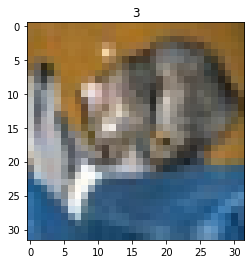

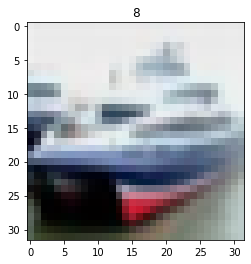

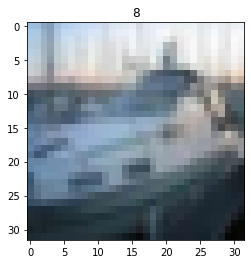

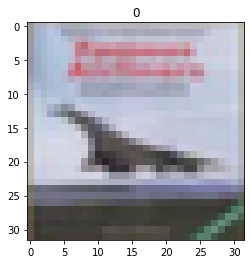

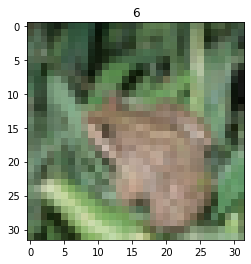

In [67]:
for i in range(5):
    img = X_test[i]
    img_class = np.where(y_test[i] == 1)[0][0]
    plt.imshow(img)
    plt.title(img_class)
    plt.show()

# Conclusion

| MODEL | FINAL TRAIN LOSS | FINAL TRAIN ACCURACY | FINAL TEST LOSS | FINAL TEST ACCURACY | TRAINING TIME | 
|-----|-----|----|---|----|---|
| VGG16 | 1.4 | 77% | 1.17 | 66% | ~1-2 hours (25 epochs)|
| ResNet101 | 0.9 | 66% | 3.4 | 29% | ~6 hours (25 epochs)|